In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/application_data_new.csv')

# Display the first few rows of the DataFrame
df.head()


SK_ID_CURR  TARGET  lokl NAME_CONTRACT_TYPE CODE_GENDER  AMT_INCOME_TOTAL  \
0      100002       1     1         Cash loans           M            202500   
1      100003       0     1         Cash loans           F            270000   
2      100004       0     1    Revolving loans           M             67500   
3      100006       0     1         Cash loans           F            135000   
4      100007       0     1         Cash loans           M            121500   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_INCOME_TYPE  \
0      406598      24701.0         351000.0          Working   
1     1293503      35699.0        1129500.0    State servant   
2      135000       6750.0         135000.0          Working   
3      312683      29687.0         297000.0          Working   
4      513000      21866.0         513000.0          Working   

              NAME_EDUCATION_TYPE NAME_FAMILY_STATUS   NAME_HOUSING_TYPE  \
0  Secondary or secondary special             Single  House or apartment   
1                Higher education            Married  House or apartment   
2  Secondary or secondary special             Single  House or apartment   
3  Secondary or secondary special     Civil marriage  House or apartment   
4  Secondary or secondary special             Single  House or apartment   

  OCCUPATION_TYPE  
0        Laborers  
1      Core staff  
2        Laborers  
3        Laborers  
4      Core staff

In [ ]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'lokl', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'],
      dtype='object')

In [ ]:
print(df.shape)
print(df.size)

(276480, 14)
3870720


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

SK_ID_CURR               0
TARGET                   0
lokl                     0
NAME_CONTRACT_TYPE       0
CODE_GENDER              0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY             12
AMT_GOODS_PRICE        249
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS       0
NAME_HOUSING_TYPE        0
OCCUPATION_TYPE          0
dtype: int64

In [ ]:
# Replace null values in 'AMT_ANNUITY' with the median of the column
median_amt_annuity = df['AMT_ANNUITY'].median()
df['AMT_ANNUITY'].fillna(median_amt_annuity, inplace=True)

# Replace null values in 'AMT_GOODS_PRICE' with the median of the column
median_amt_goods_price = df['AMT_GOODS_PRICE'].median()
df['AMT_GOODS_PRICE'].fillna(median_amt_goods_price, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276480 entries, 0 to 276479
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           276480 non-null  int64  
 1   TARGET               276480 non-null  int64  
 2   lokl                 276480 non-null  int64  
 3   NAME_CONTRACT_TYPE   276480 non-null  object 
 4   CODE_GENDER          276480 non-null  object 
 5   AMT_INCOME_TOTAL     276480 non-null  int64  
 6   AMT_CREDIT           276480 non-null  int64  
 7   AMT_ANNUITY          276480 non-null  float64
 8   AMT_GOODS_PRICE      276480 non-null  float64
 9   NAME_INCOME_TYPE     276480 non-null  object 
 10  NAME_EDUCATION_TYPE  276480 non-null  object 
 11  NAME_FAMILY_STATUS   276480 non-null  object 
 12  NAME_HOUSING_TYPE    276480 non-null  object 
 13  OCCUPATION_TYPE      276480 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 29.5+ MB


In [ ]:
df.nunique()

SK_ID_CURR             276480
TARGET                      2
lokl                        1
NAME_CONTRACT_TYPE          2
CODE_GENDER                 3
AMT_INCOME_TOTAL         1885
AMT_CREDIT               5453
AMT_ANNUITY             13322
AMT_GOODS_PRICE           961
NAME_INCOME_TYPE            8
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
OCCUPATION_TYPE            19
dtype: int64

In [ ]:
# List the columns with object (string) data types
object_columns = df.select_dtypes(include='object').columns

# Create a dictionary to store the unique items for each object-type column
unique_items = {col: df[col].unique().tolist() for col in object_columns}

# Display the unique items
unique_items


{'NAME_CONTRACT_TYPE': ['Cash loans', 'Revolving loans'],
 'CODE_GENDER': ['M', 'F', 'XNA'],
 'NAME_INCOME_TYPE': ['Working',
  'State servant',
  'Commercial associate',
  'Student',
  'Pensioner',
  'Maternity leave',
  'Unemployed',
  'Businessman'],
 'NAME_EDUCATION_TYPE': ['Secondary or secondary special',
  'Higher education',
  'Incomplete higher',
  'Lower secondary',
  'Academic degree'],
 'NAME_FAMILY_STATUS': ['Single',
  'Married',
  'Civil marriage',
  'Widow',
  'Separated'],
 'NAME_HOUSING_TYPE': ['House or apartment',
  'Rented apartment',
  'With parents',
  'Municipal apartment',
  'Office apartment',
  'Co-op apartment'],
 'OCCUPATION_TYPE': ['Laborers',
  'Core staff',
  'Accountants',
  'Drivers',
  'Sales staff',
  'Cleaning staff',
  'Private service staff',
  'Managers',
  'Medicine staff',
  'Cooking staff',
  'High skill tech staff',
  'Low-skill Laborers',
  'Security staff',
  'Realty agents',
  'Secretaries',
  'Waiters/barmen staff',
  'IT staff',
  'HR st

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')

Numerical type columns:
Index(['SK_ID_CURR', 'TARGET', 'lokl', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE'],
      dtype='object')


In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 30:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 30:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
Non-Categorical Features: []
Discrete Features: ['TARGET', 'lokl']
Continuous Features: ['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']


# Data Visualization

In [ ]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

TARGET
[1 0]

lokl
[1]



In [ ]:
for i in discrete:
    print(df[i].value_counts())
    print()

TARGET
0    254167
1     22313
Name: count, dtype: int64

lokl
1    276480
Name: count, dtype: int64



## 1 as representing a loan that defaulted and 0 as a loan that was successfully approved and repaid.


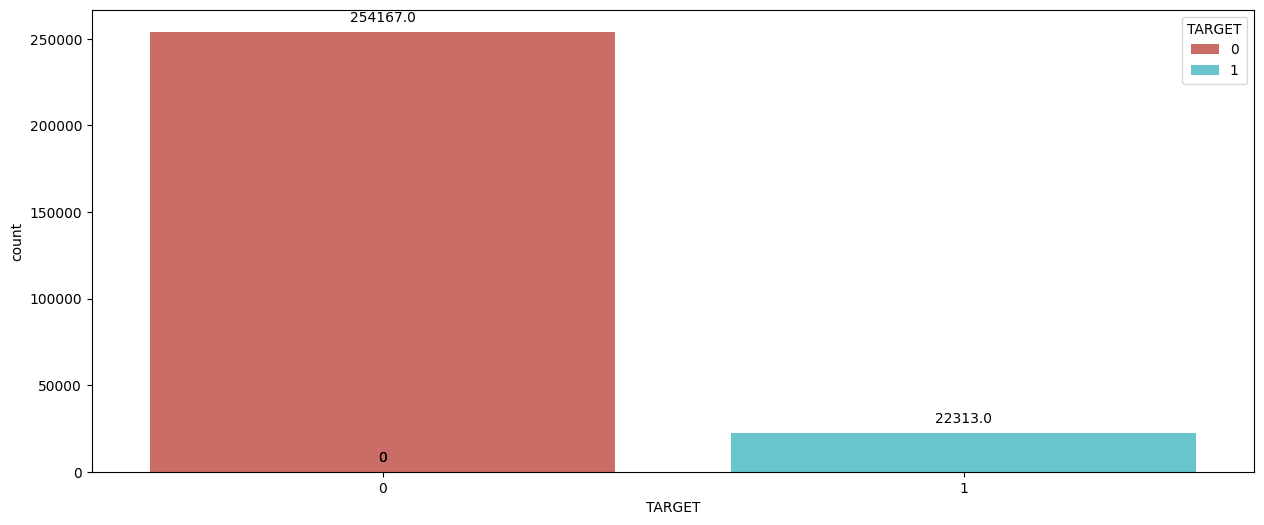

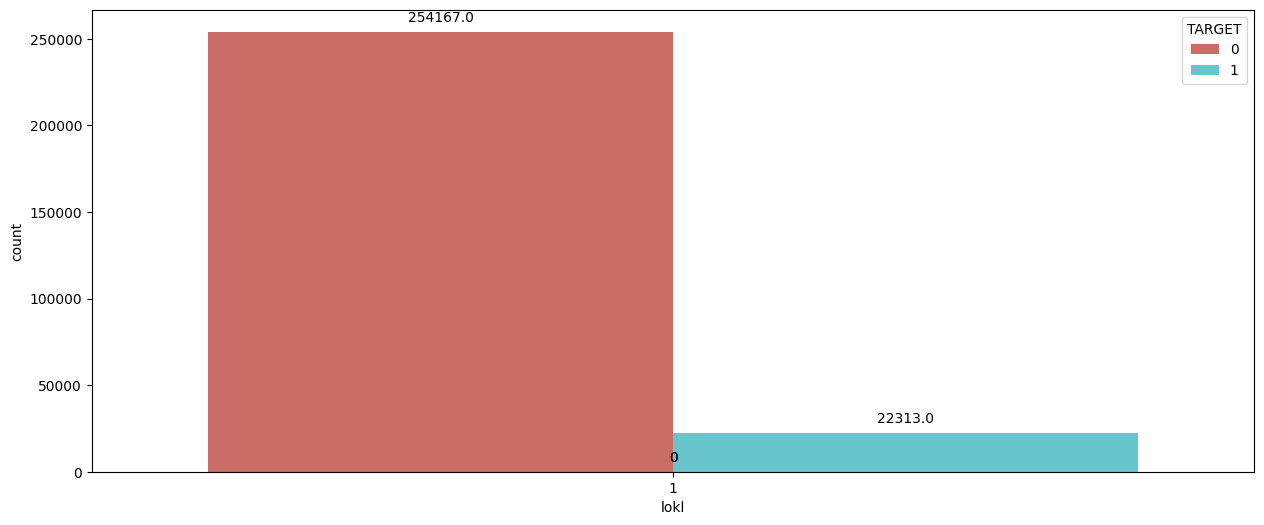

In [ ]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls',hue='TARGET')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [ ]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [ ]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']

CODE_GENDER
['M' 'F' 'XNA']

NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Student' 'Pensioner'
 'Maternity leave' 'Unemployed' 'Businessman']

NAME_EDUCATION_TYPE
['Secondary or secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS
['Single' 'Married' 'Civil marriage' 'Widow' 'Separated']

NAME_HOUSING_TYPE
['House or apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

OCCUPATION_TYPE
['Laborers' 'Core staff' 'Accountants' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Private service staff' 'Managers' 'Medicine staff'
 'Cooking staff' 'High skill tech staff' 'Low-skill Laborers'
 'Security staff' 'Realty agents' 'Secretaries' 'Waiters/barmen staff'
 'IT staff' 'HR staff' 'No Occupation']



In [ ]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
Cash loans         251870
Revolving loans     24610
Name: count, dtype: int64

CODE_GENDER
CODE_GENDER
F      184190
M       92286
XNA         4
Name: count, dtype: int64

NAME_INCOME_TYPE
NAME_INCOME_TYPE
Working                 140679
Commercial associate     61350
Pensioner                55362
State servant            19050
Unemployed                  22
Student                     12
Maternity leave              3
Businessman                  2
Name: count, dtype: int64

NAME_EDUCATION_TYPE
NAME_EDUCATION_TYPE
Secondary or secondary special    199133
Higher education                   64641
Incomplete higher                   9012
Lower secondary                     3540
Academic degree                      154
Name: count, dtype: int64

NAME_FAMILY_STATUS
NAME_FAMILY_STATUS
Married           176742
Single             39727
Civil marriage     26664
Separated          17931
Widow              15416
Name: count, dtype: int64

NAME_HOUSING_TYPE
N

<ipython-input-21-f4ba8c7138ea>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




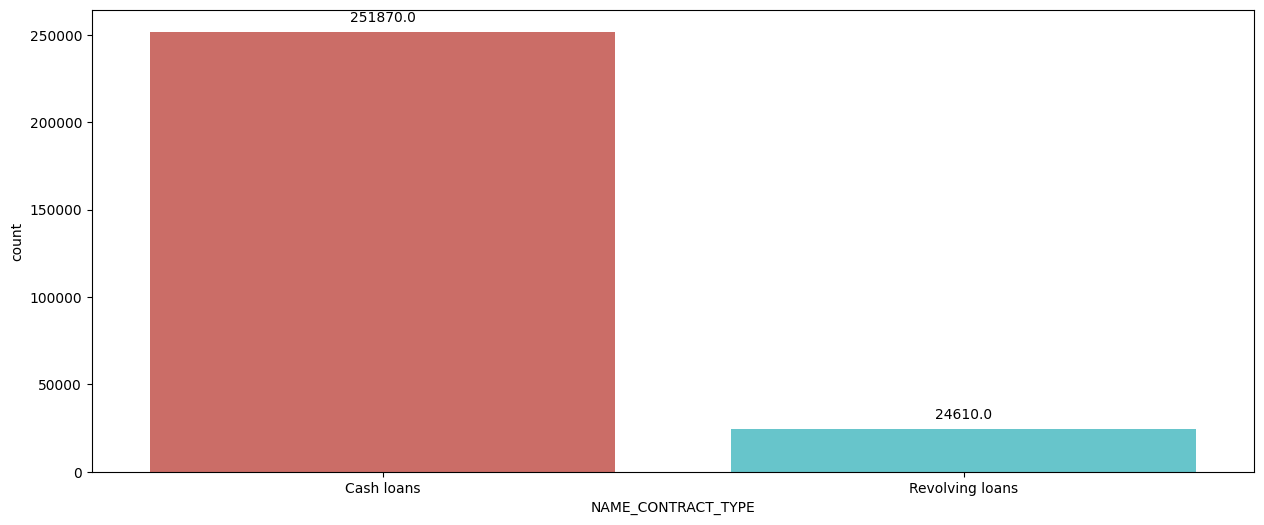

<ipython-input-21-f4ba8c7138ea>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




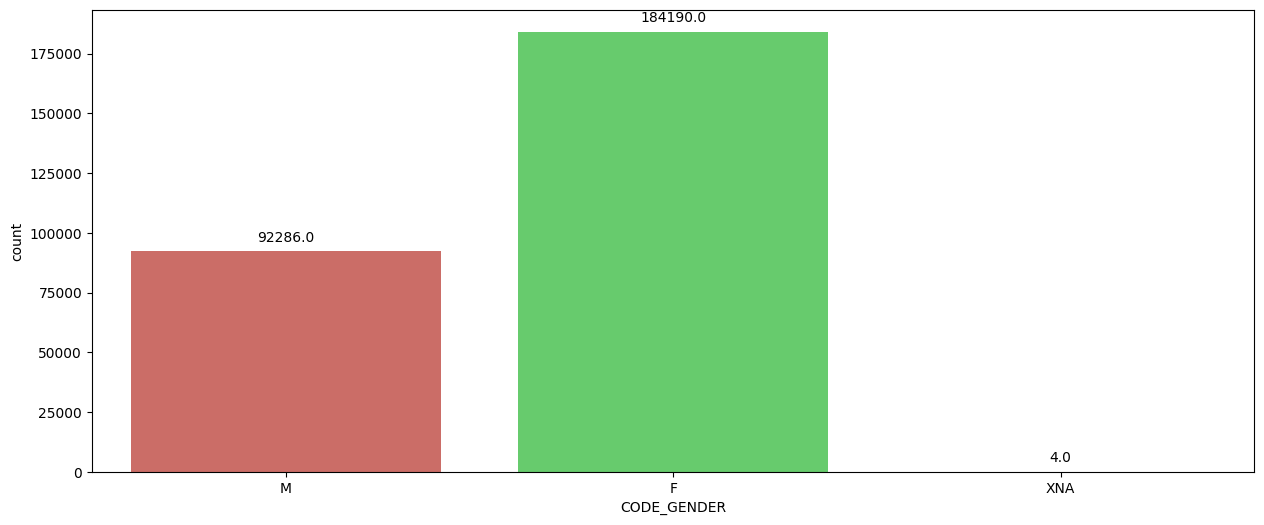

<ipython-input-21-f4ba8c7138ea>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




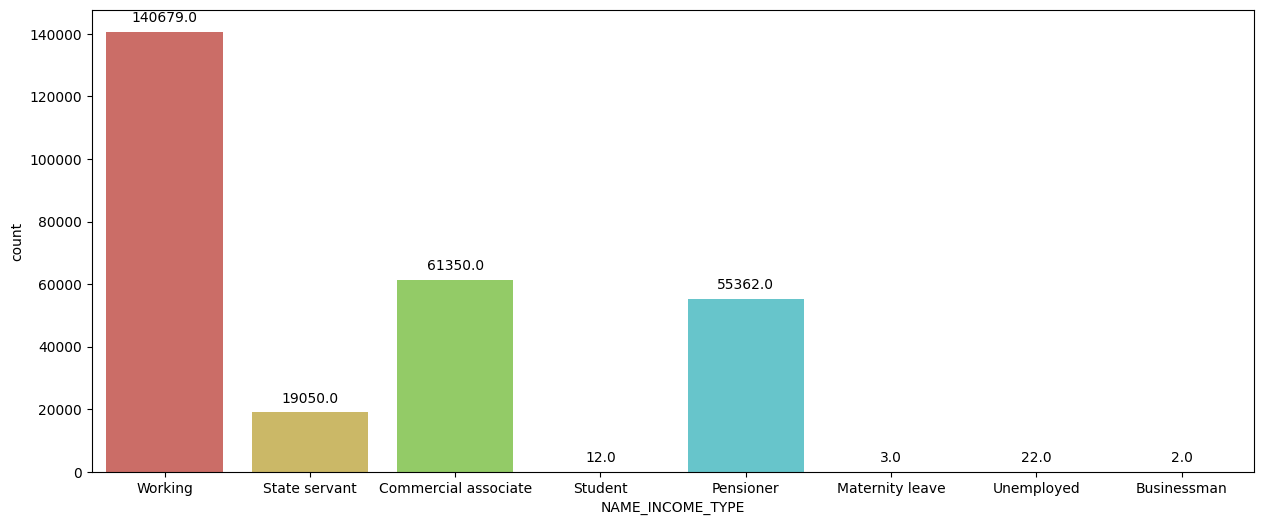

<ipython-input-21-f4ba8c7138ea>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




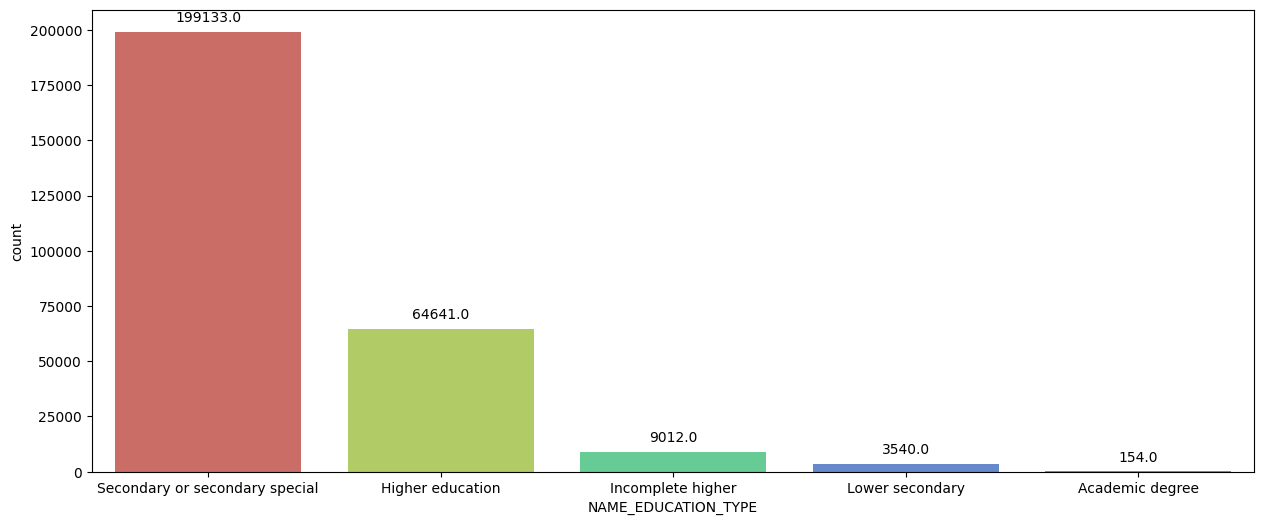

<ipython-input-21-f4ba8c7138ea>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




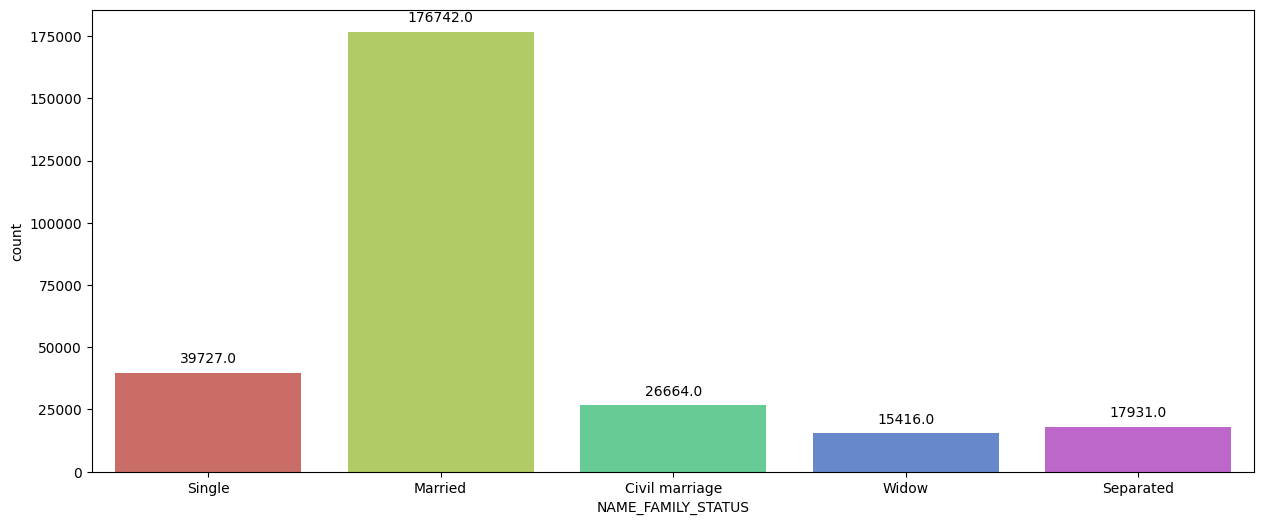

<ipython-input-21-f4ba8c7138ea>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




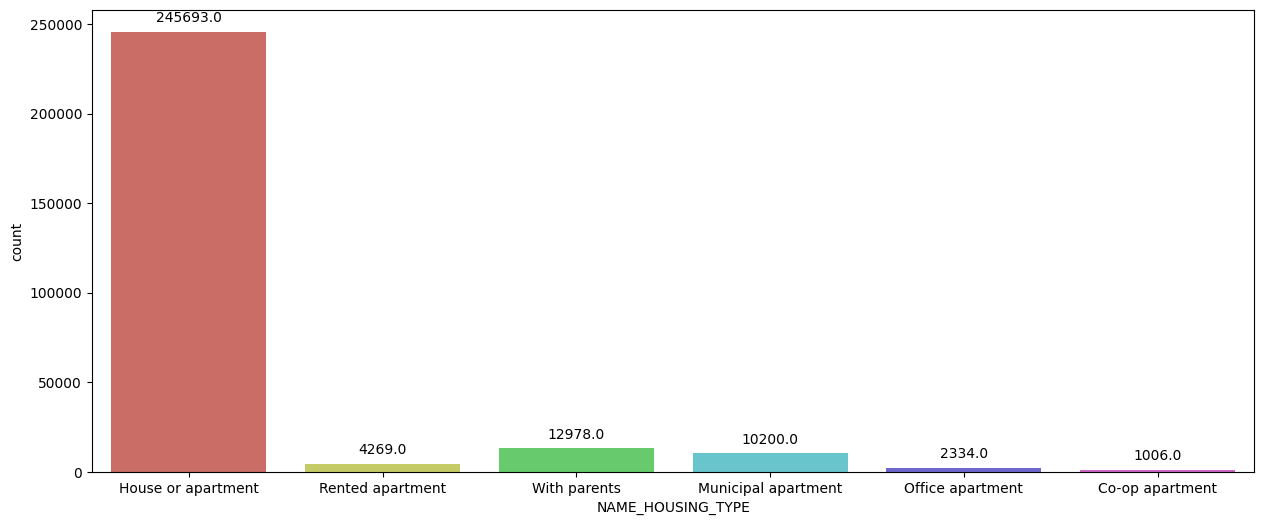

<ipython-input-21-f4ba8c7138ea>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




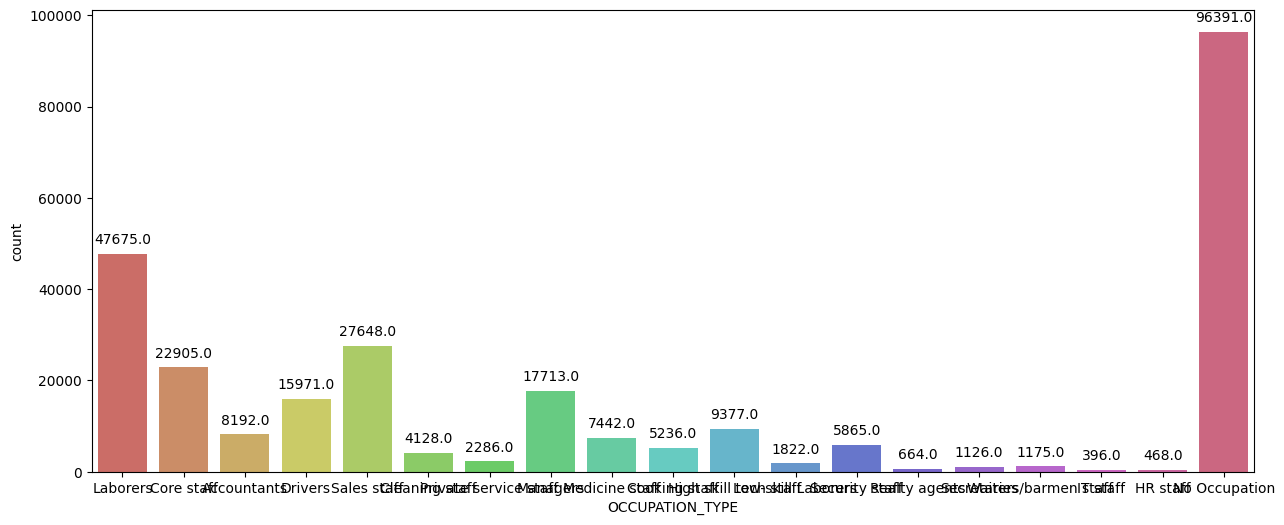

In [ ]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [ ]:
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

<ipython-input-23-db4d9ded1eec>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



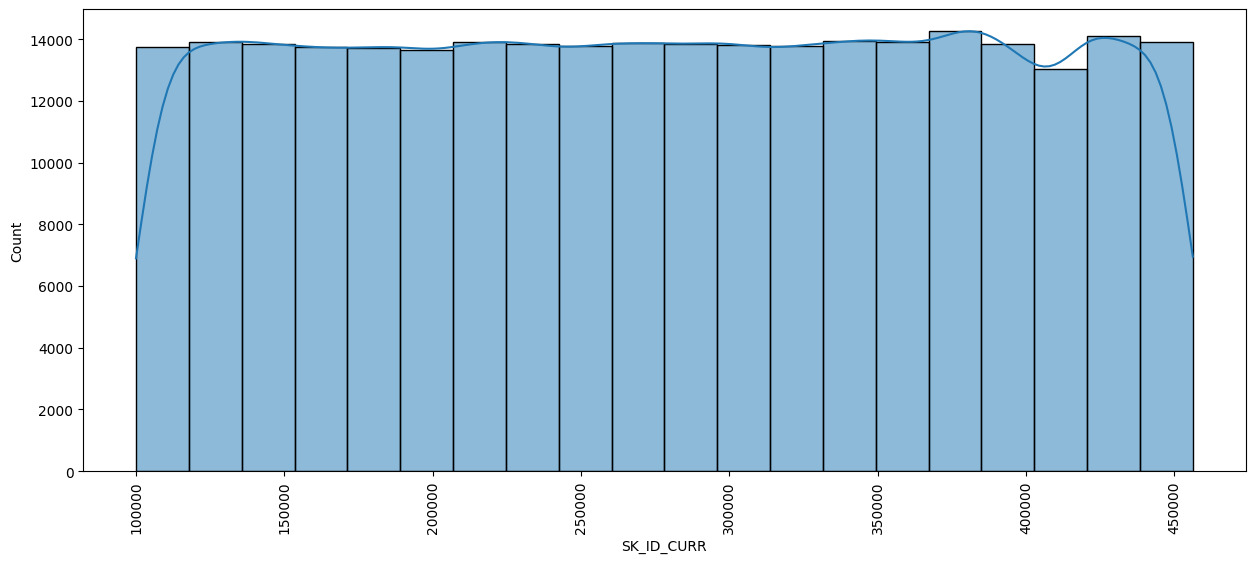

<ipython-input-23-db4d9ded1eec>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



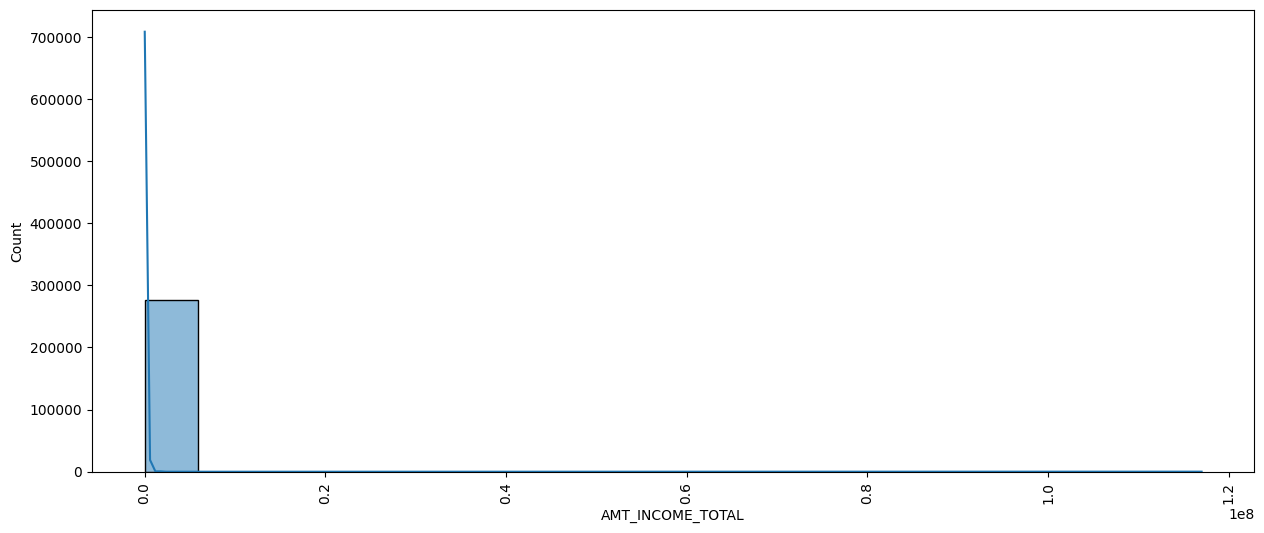

<ipython-input-23-db4d9ded1eec>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



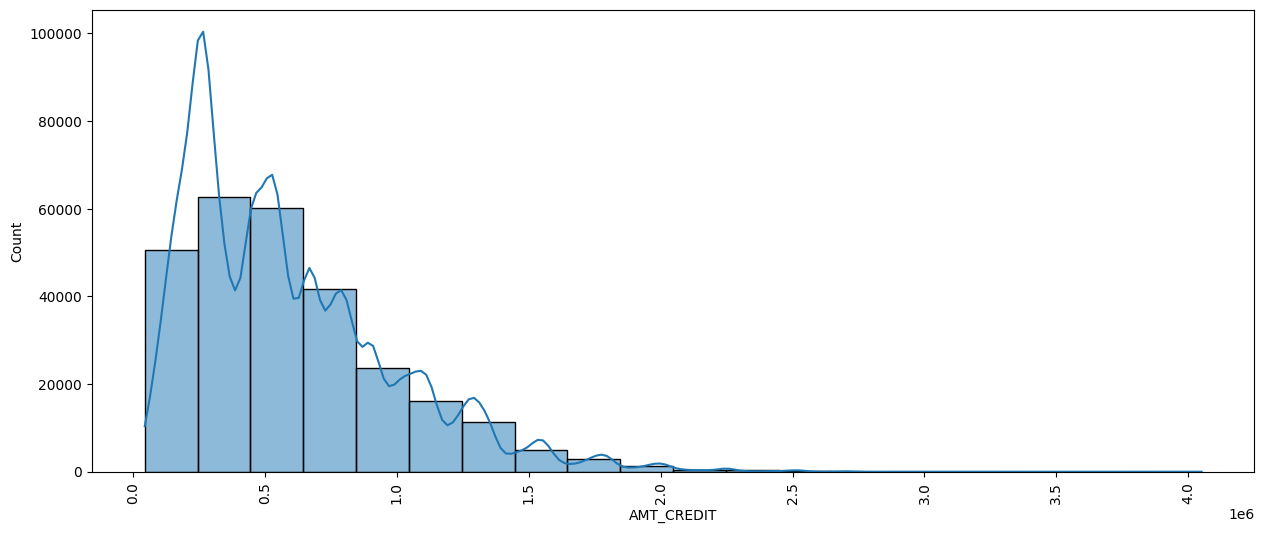

<ipython-input-23-db4d9ded1eec>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



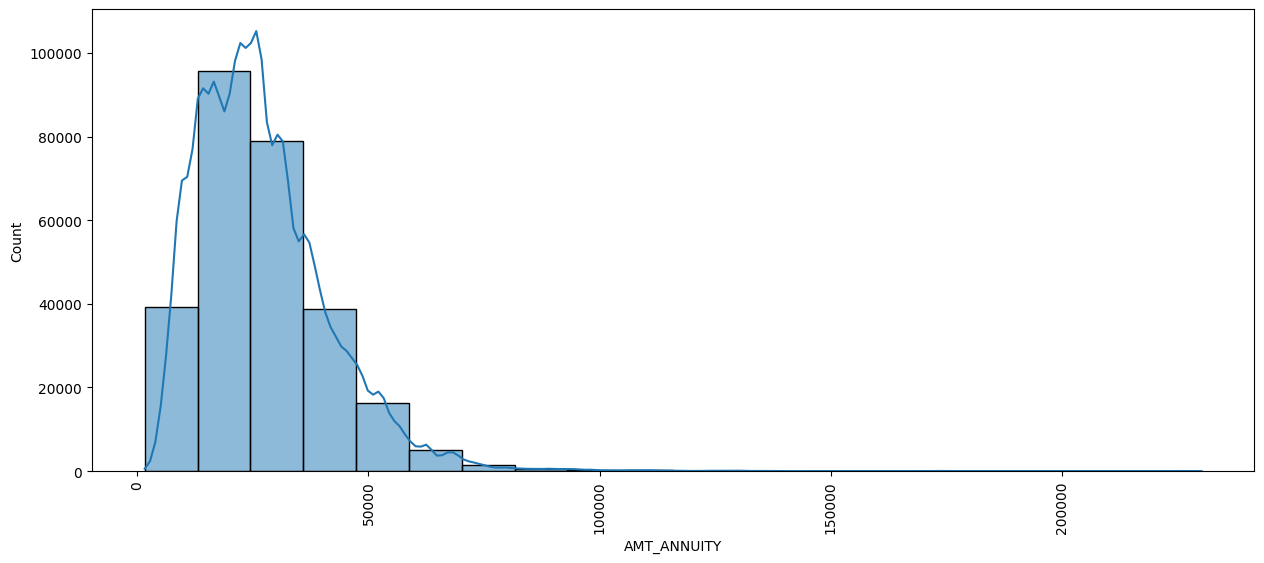

<ipython-input-23-db4d9ded1eec>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



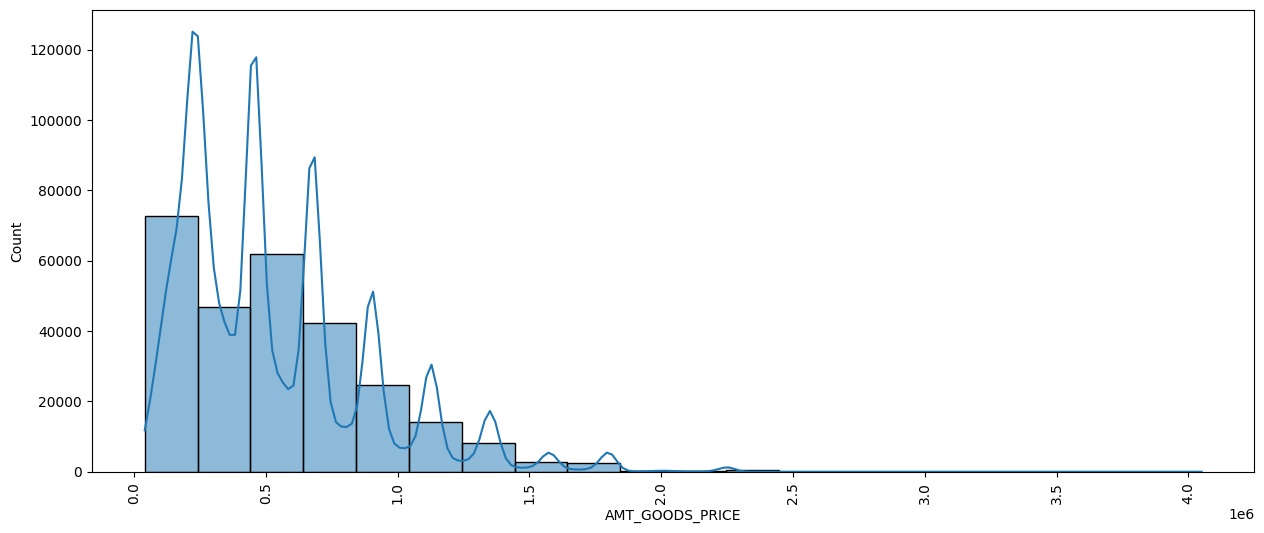

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

<ipython-input-24-4cb97cdfe262>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




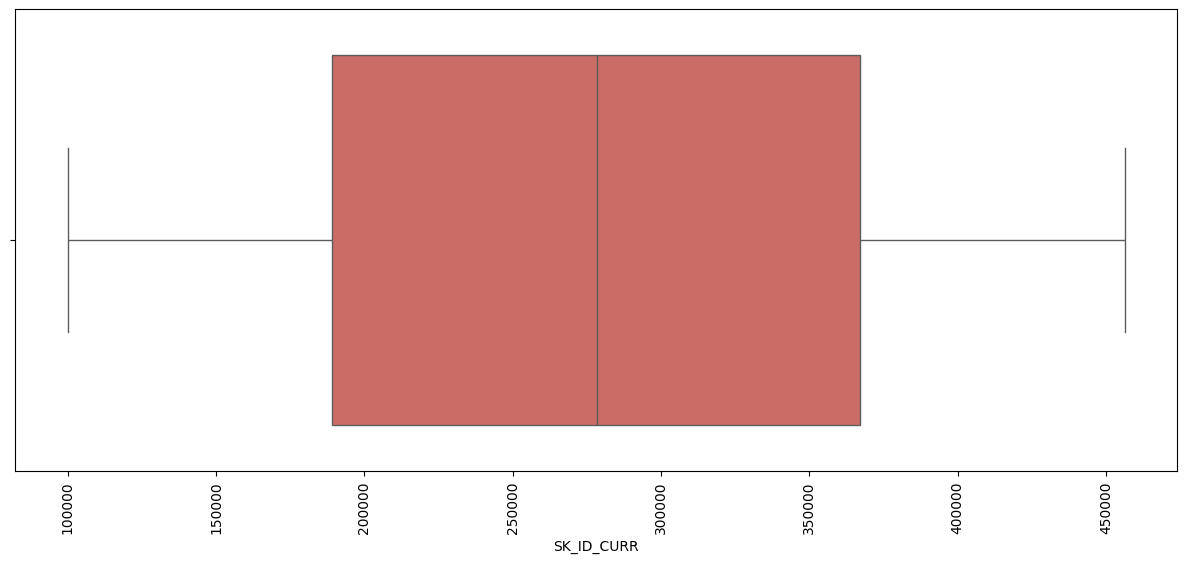

<ipython-input-24-4cb97cdfe262>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




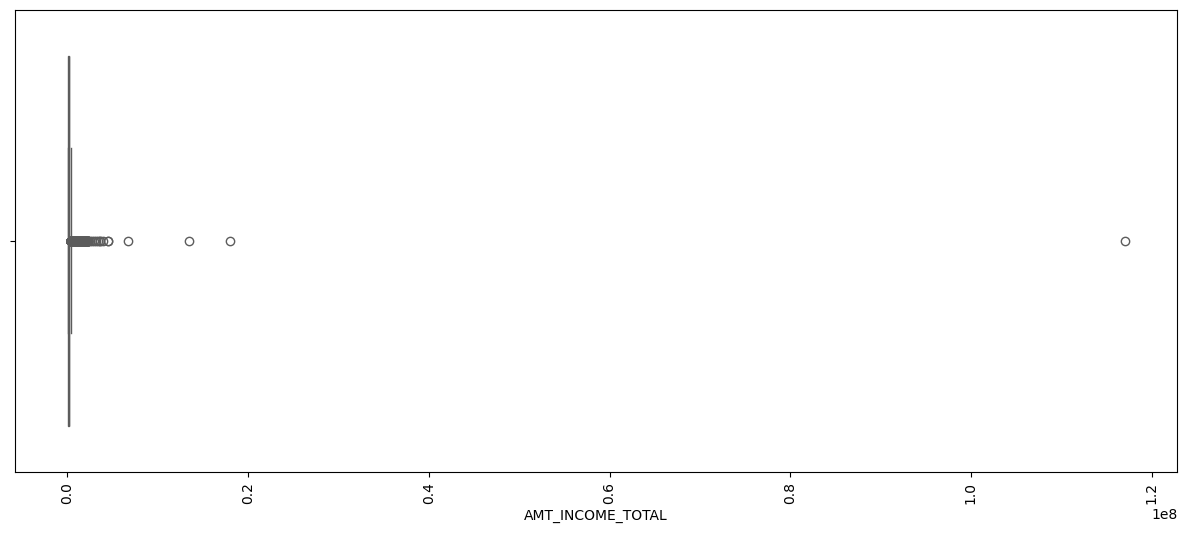

<ipython-input-24-4cb97cdfe262>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




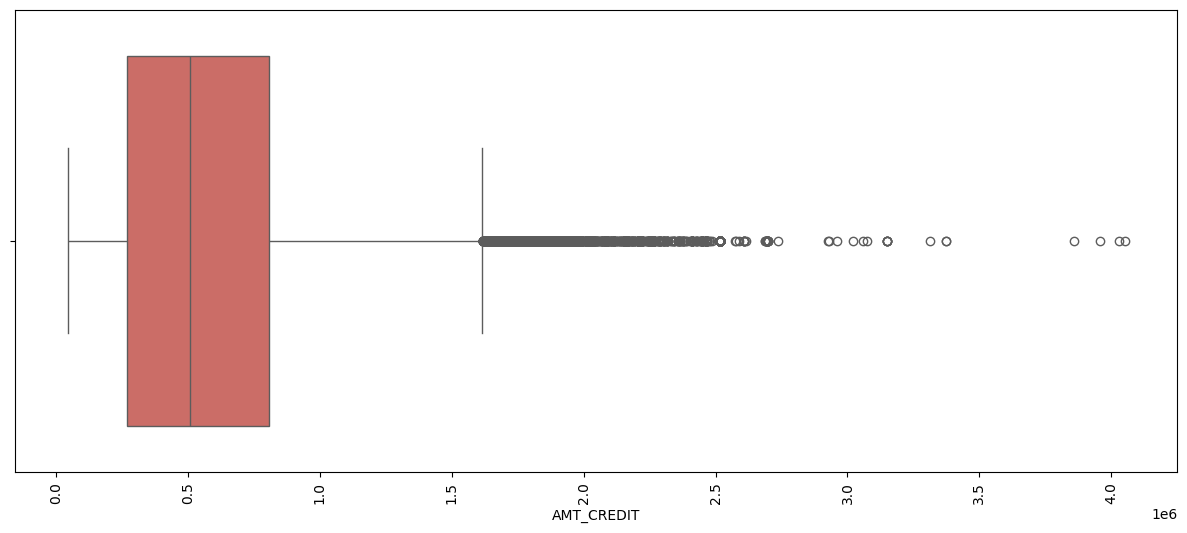

<ipython-input-24-4cb97cdfe262>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




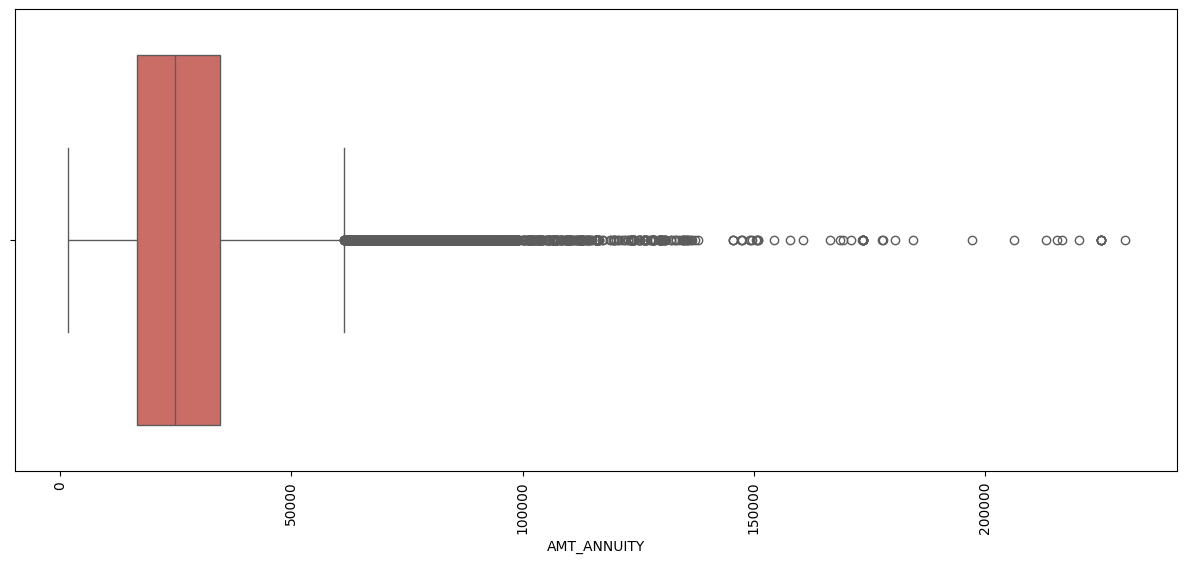

<ipython-input-24-4cb97cdfe262>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




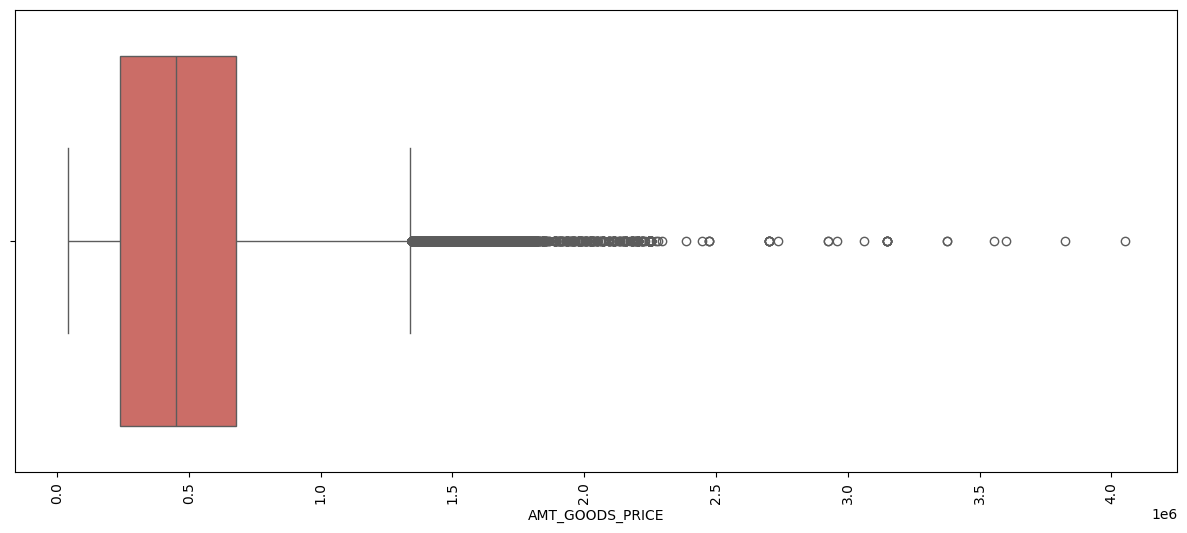

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

<ipython-input-25-172ad13ddc11>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



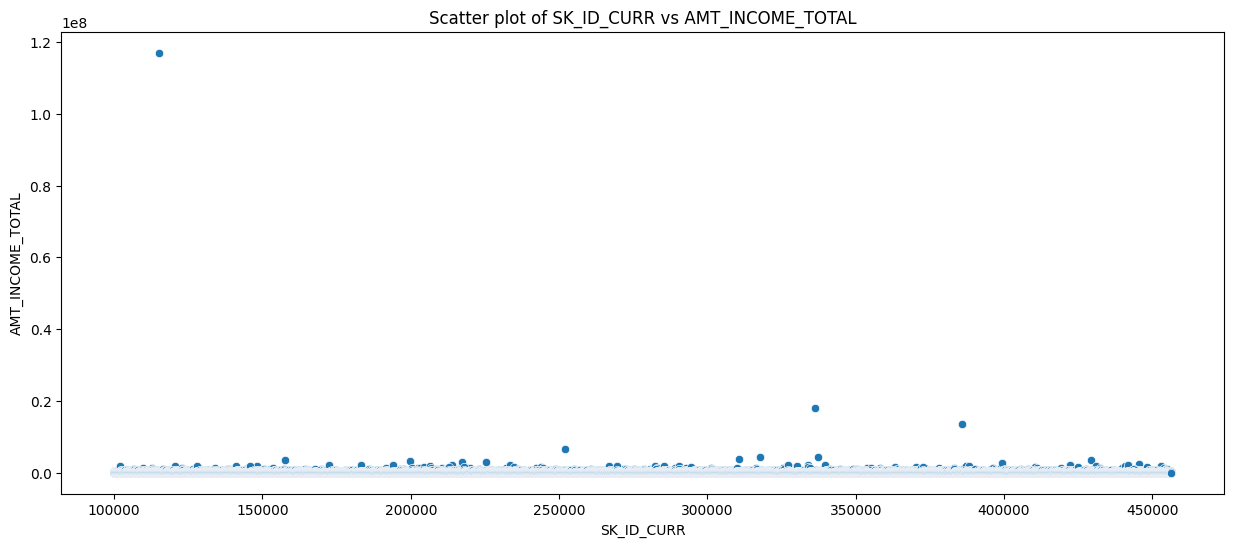

<ipython-input-25-172ad13ddc11>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



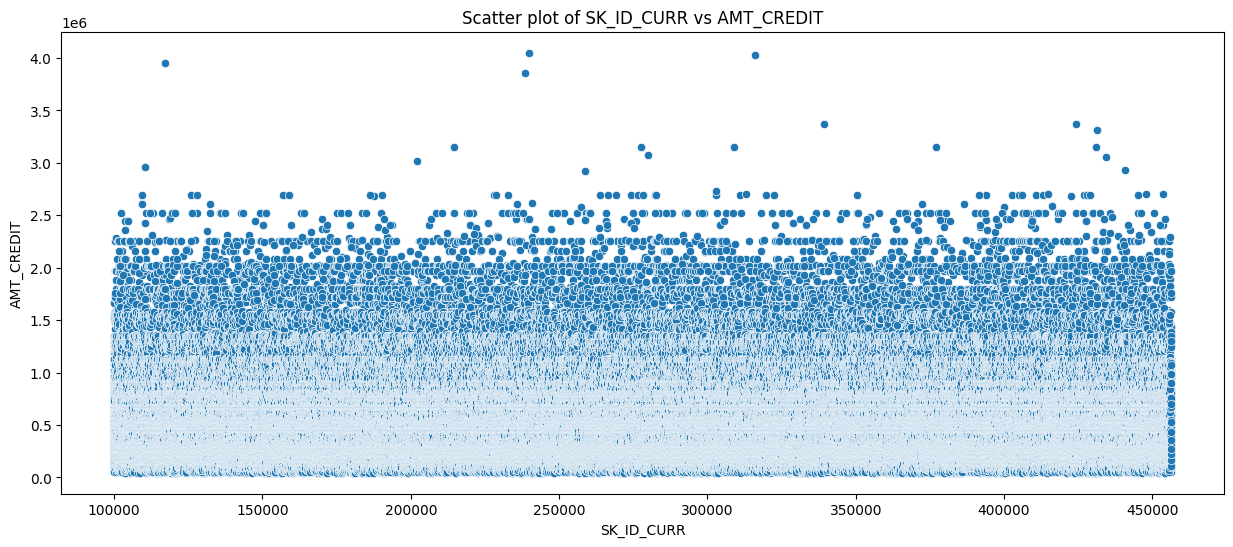

<ipython-input-25-172ad13ddc11>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



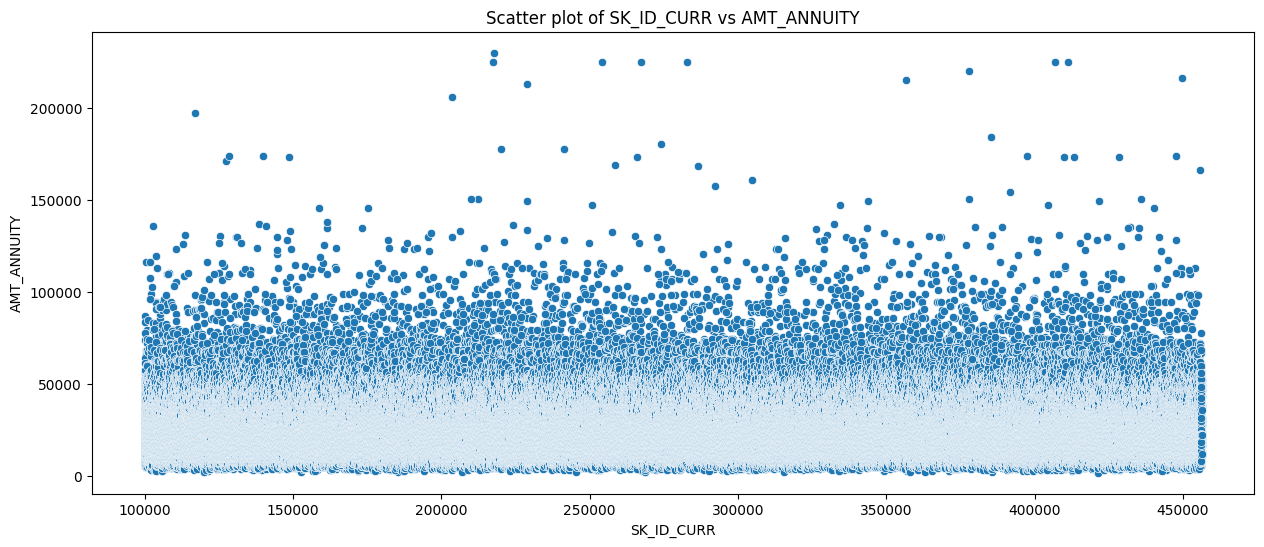

<ipython-input-25-172ad13ddc11>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



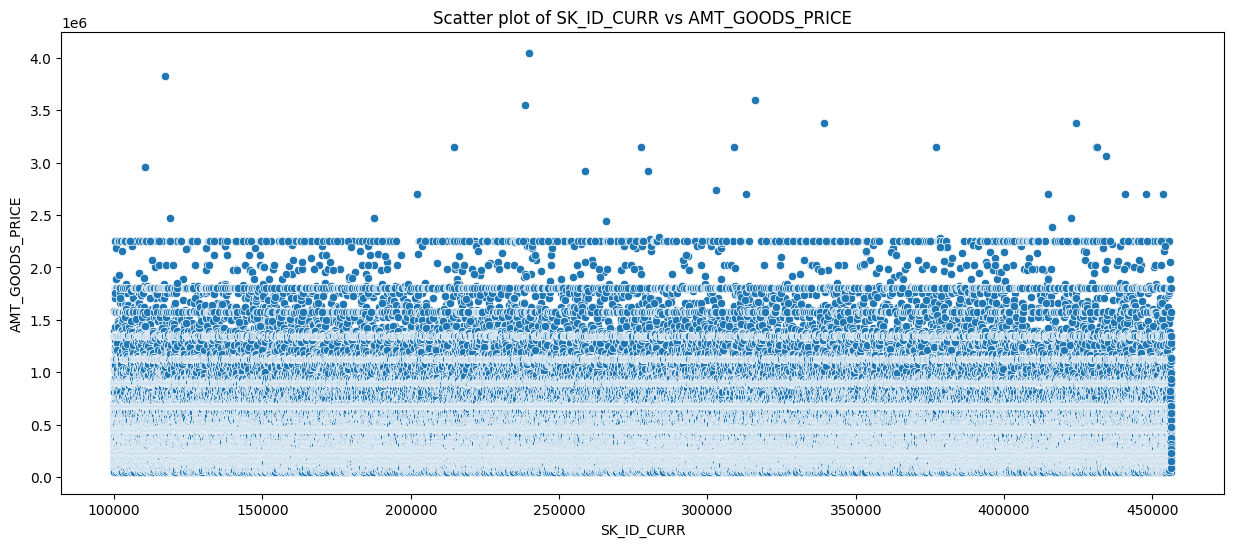

<ipython-input-25-172ad13ddc11>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



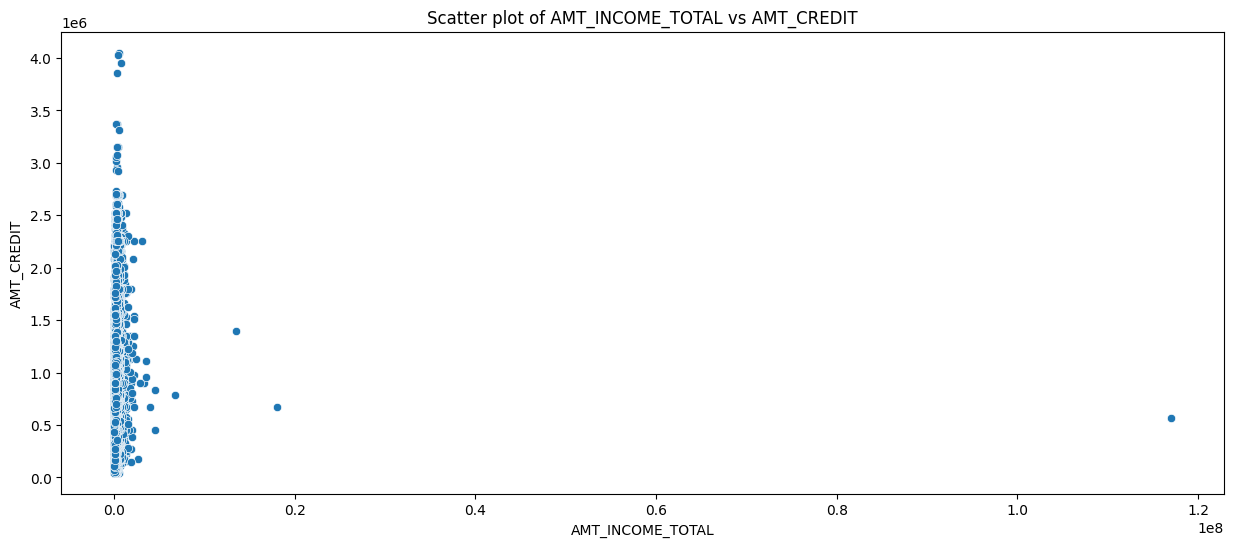

<ipython-input-25-172ad13ddc11>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



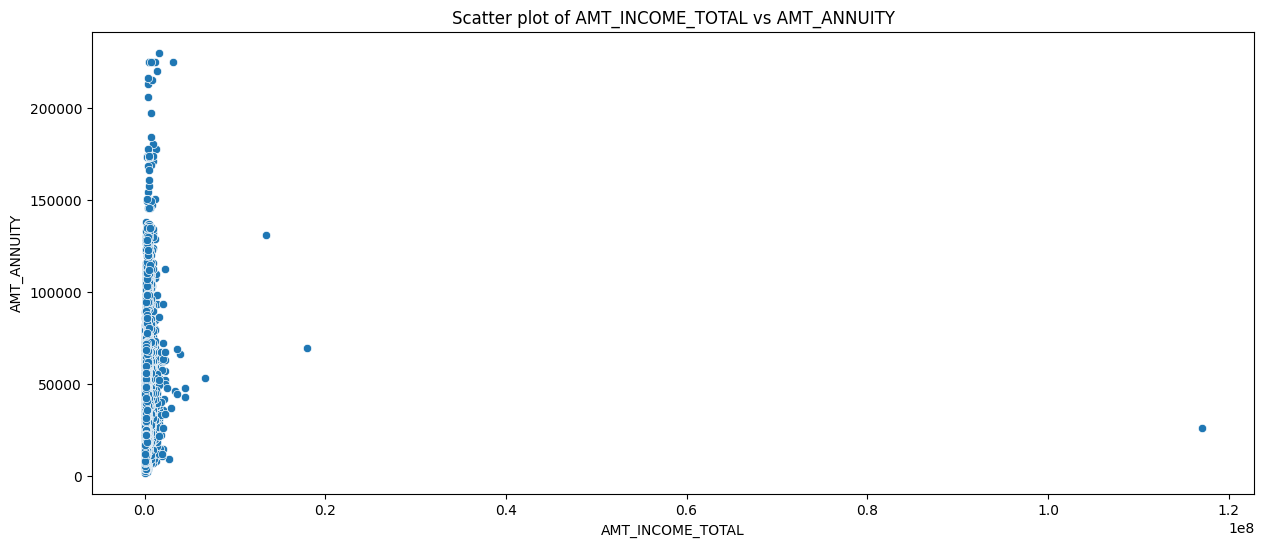

<ipython-input-25-172ad13ddc11>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



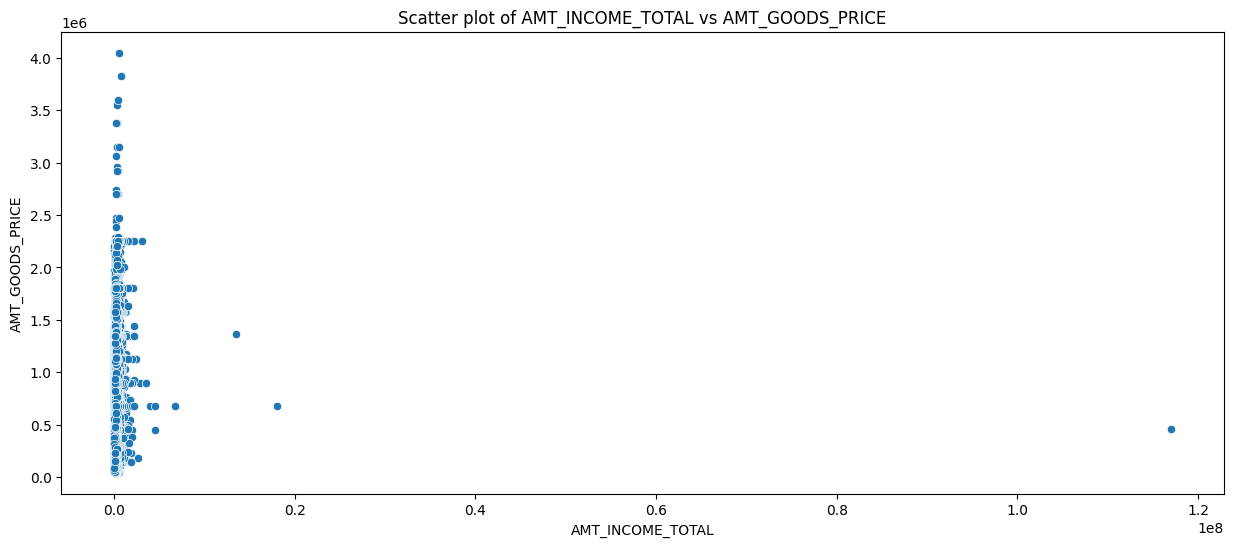

<ipython-input-25-172ad13ddc11>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



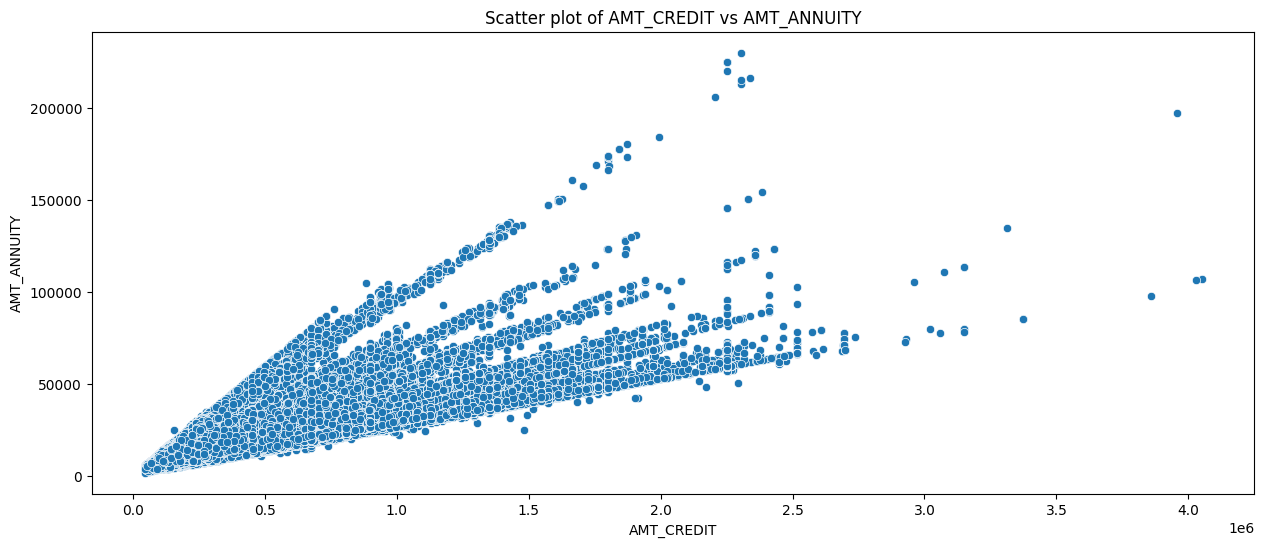

<ipython-input-25-172ad13ddc11>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



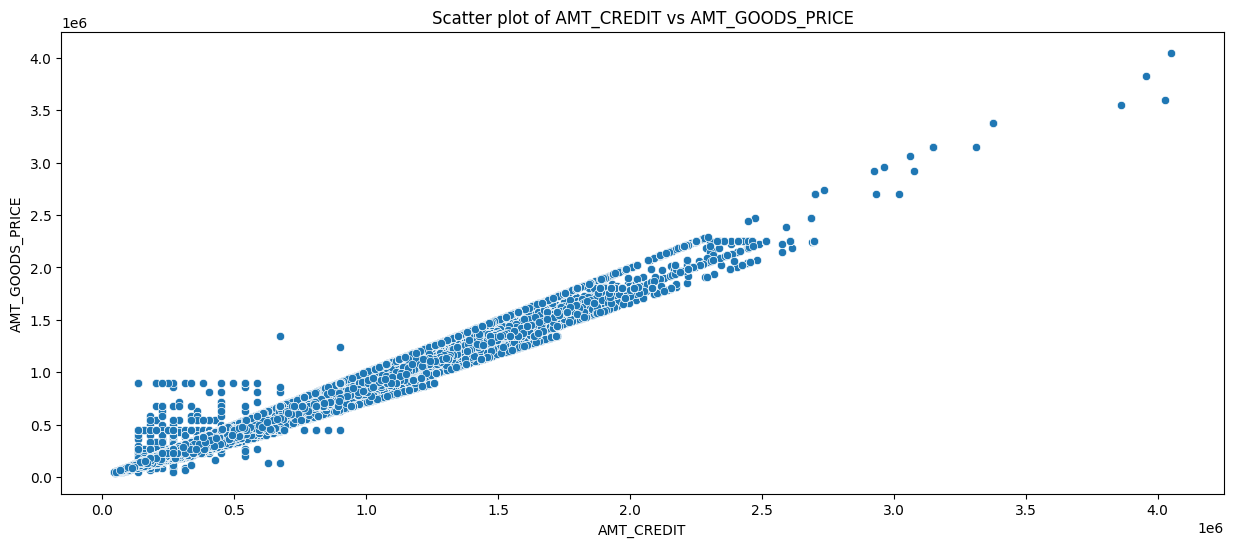

<ipython-input-25-172ad13ddc11>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



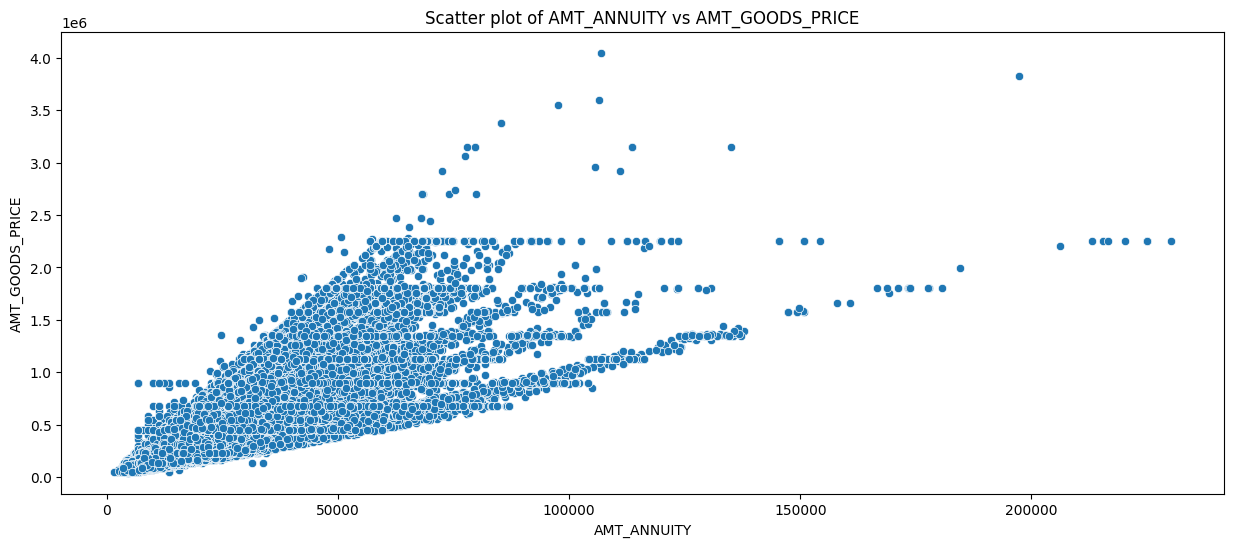

In [ ]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=continuous[i], y=continuous[j], data=df, palette='hls')
        plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

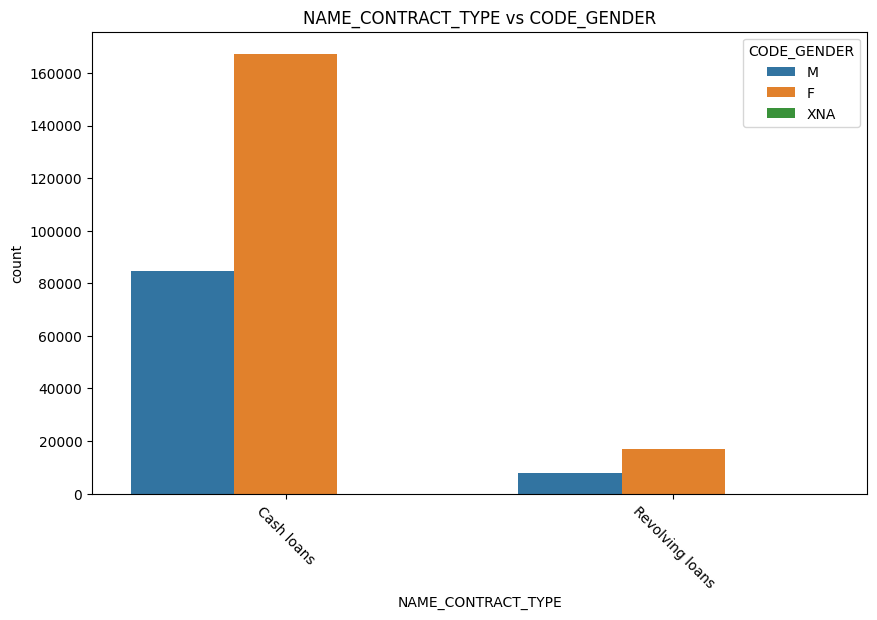

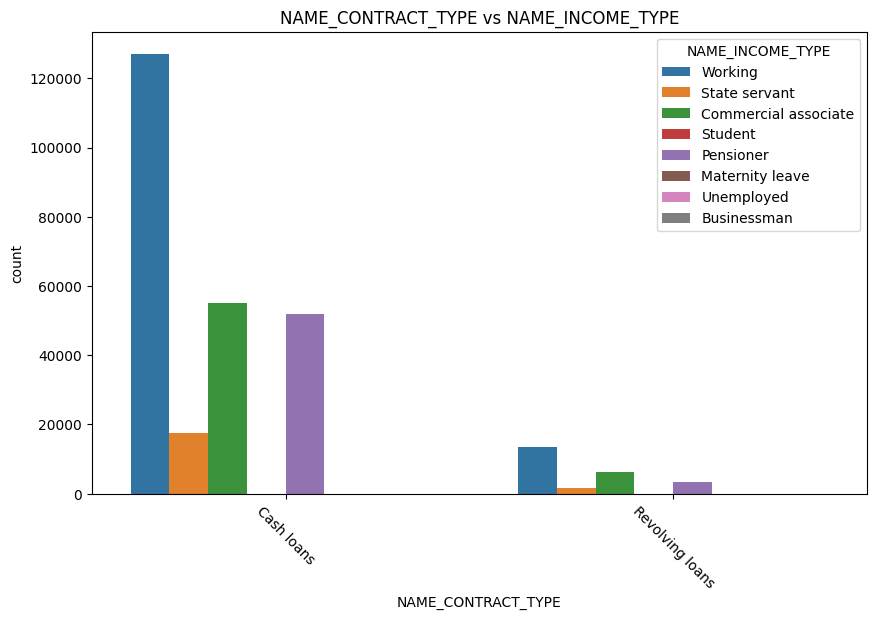

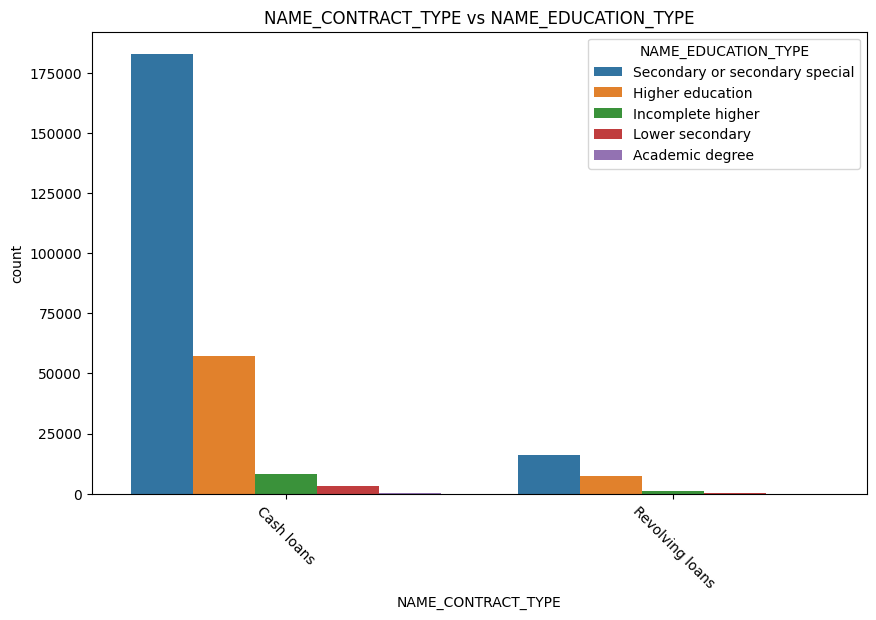

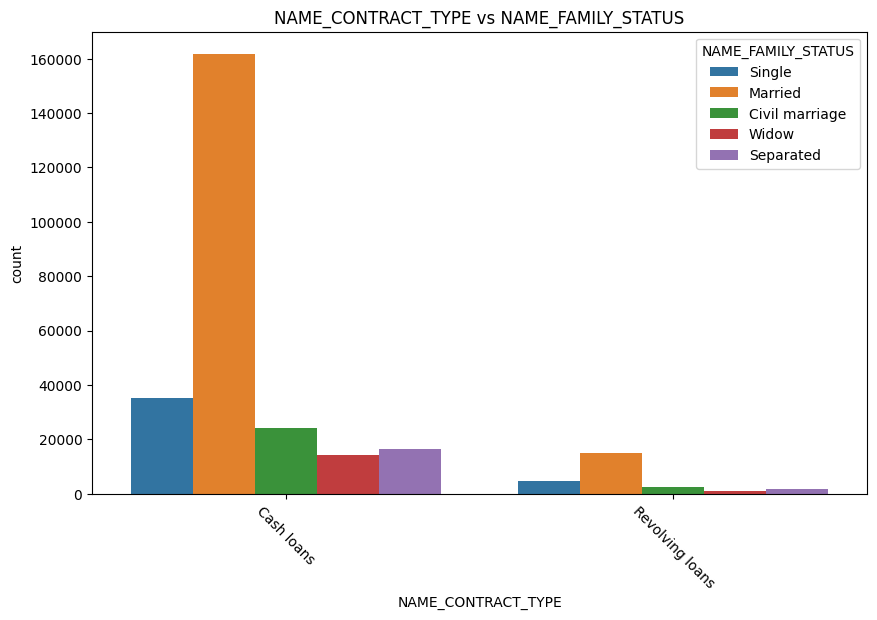

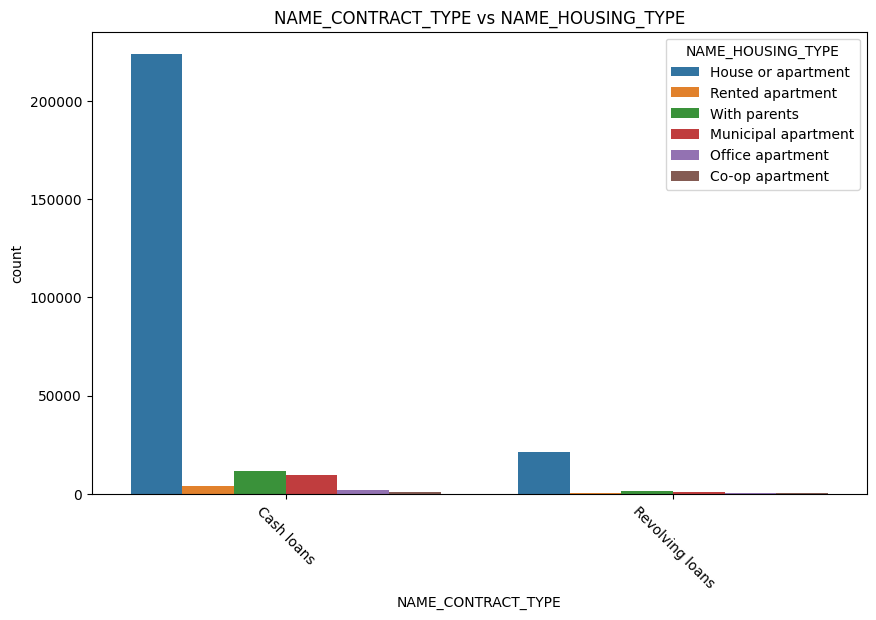

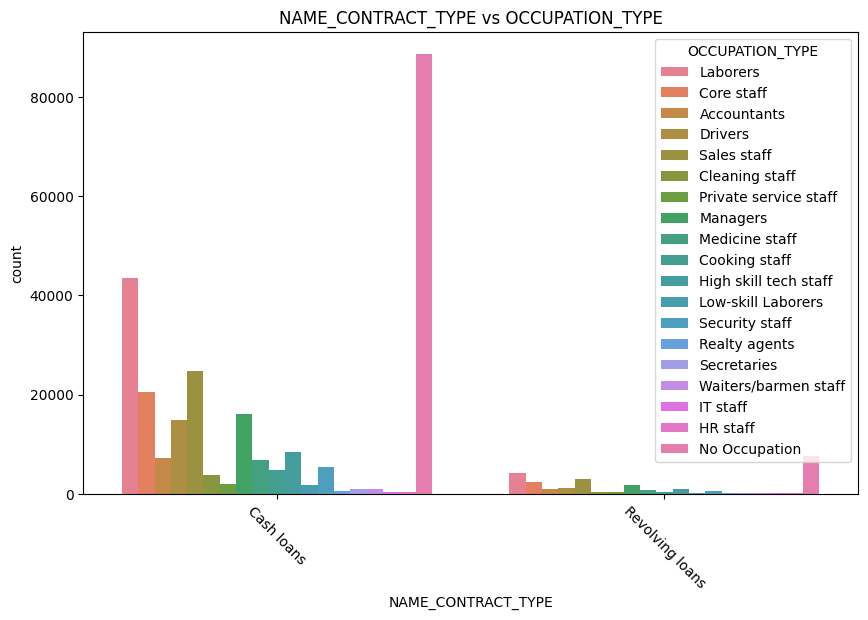

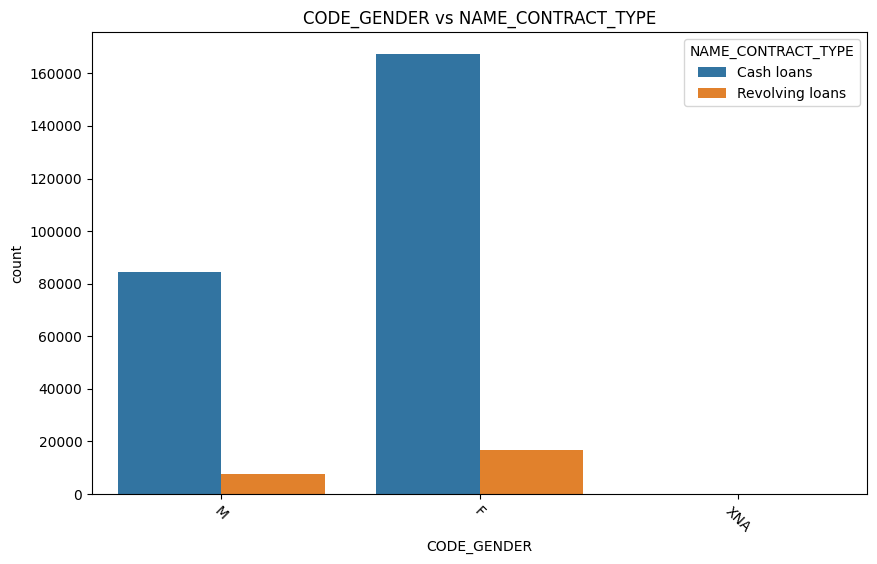

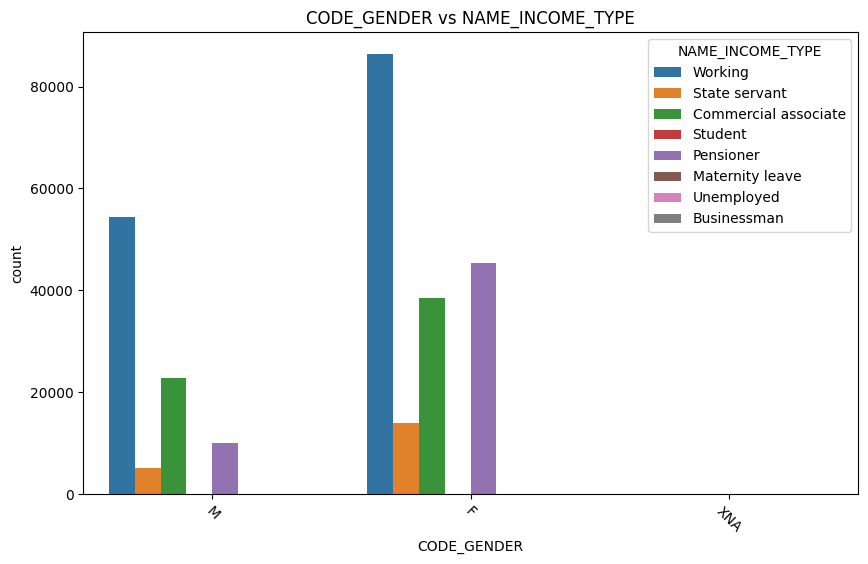

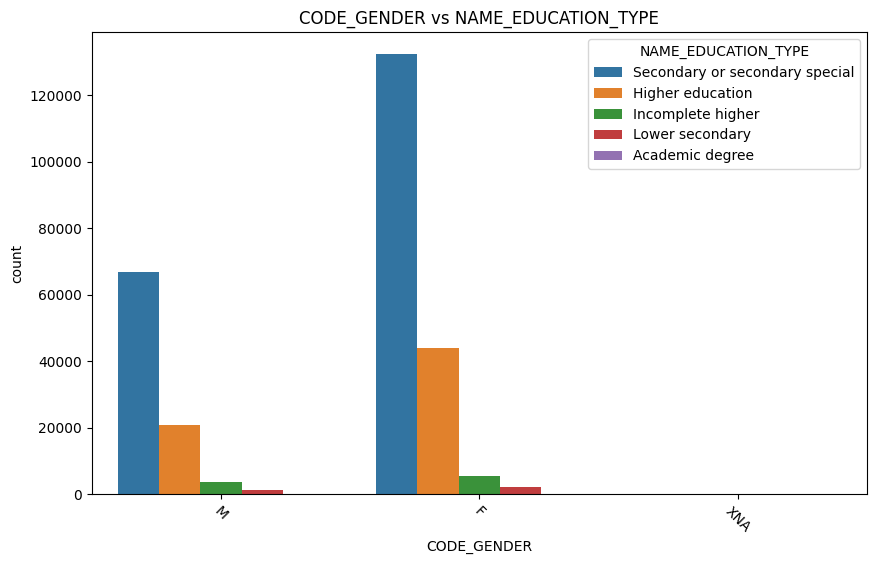

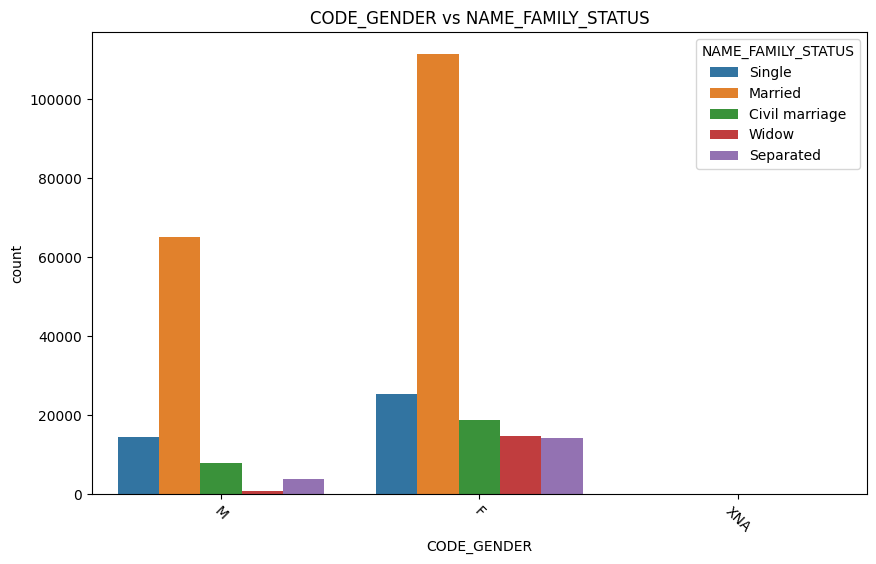

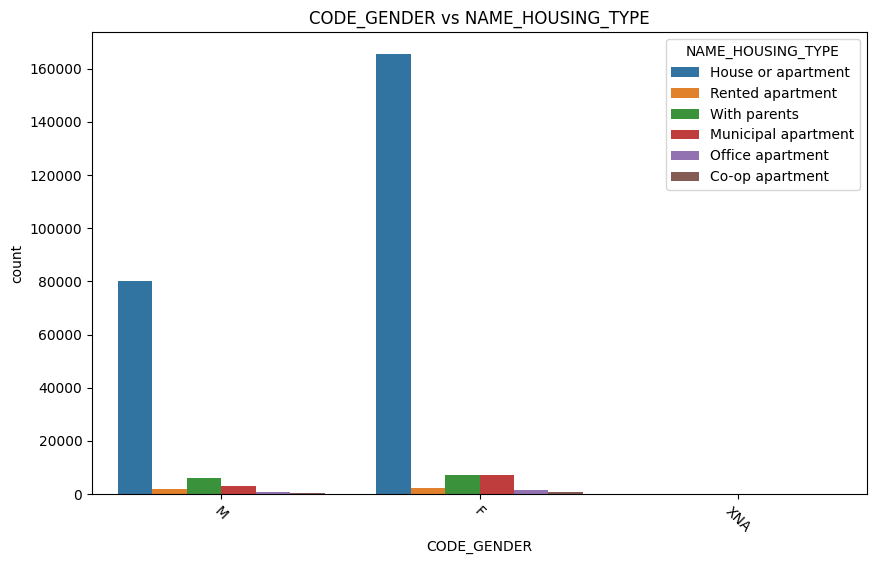

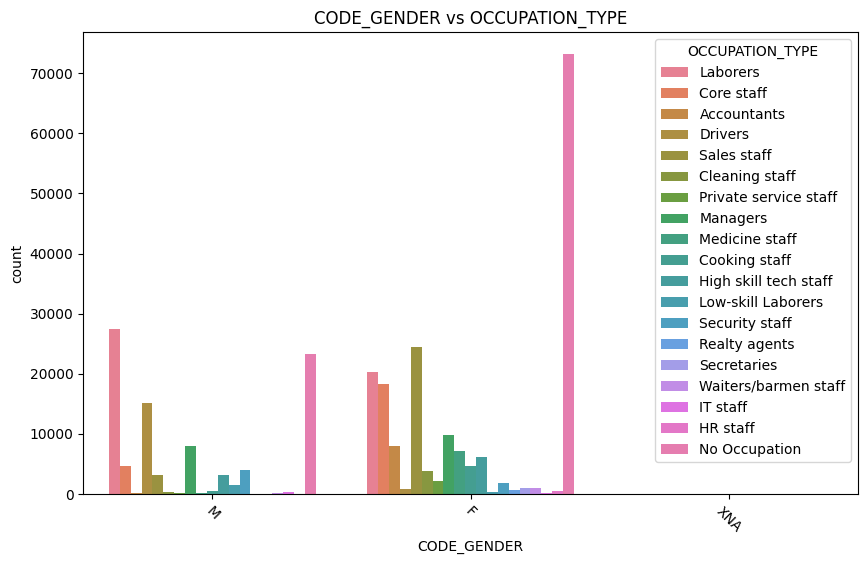

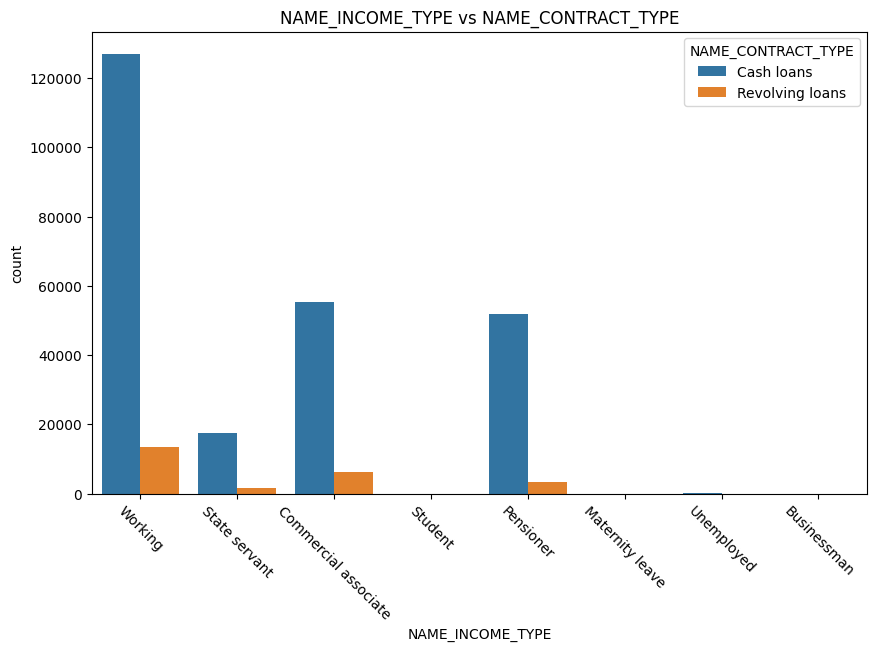

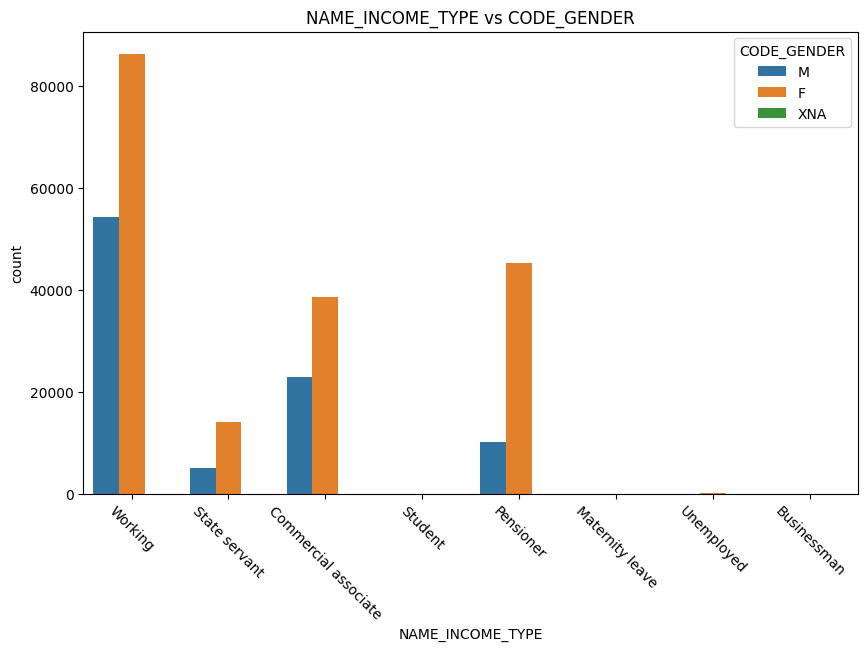

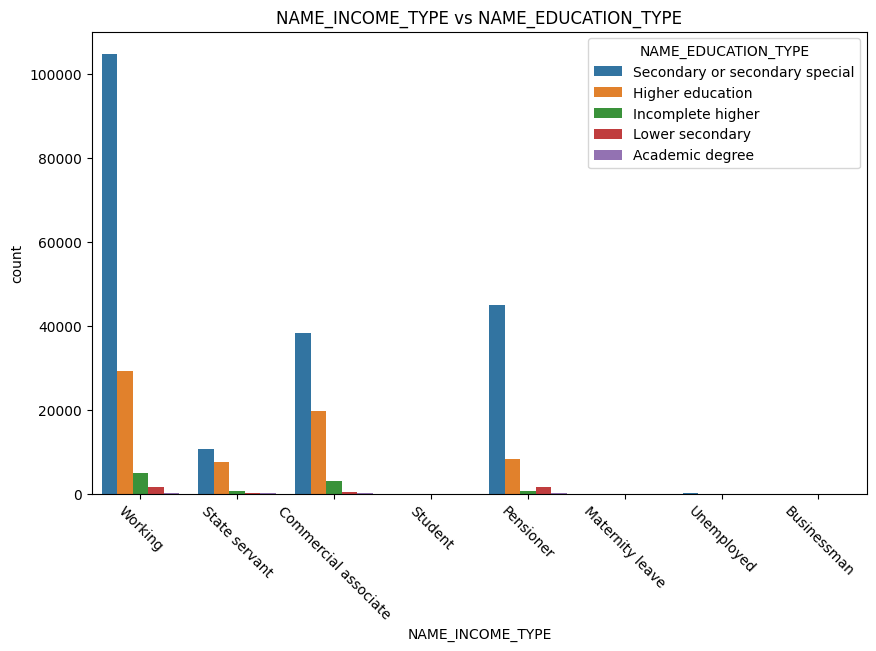

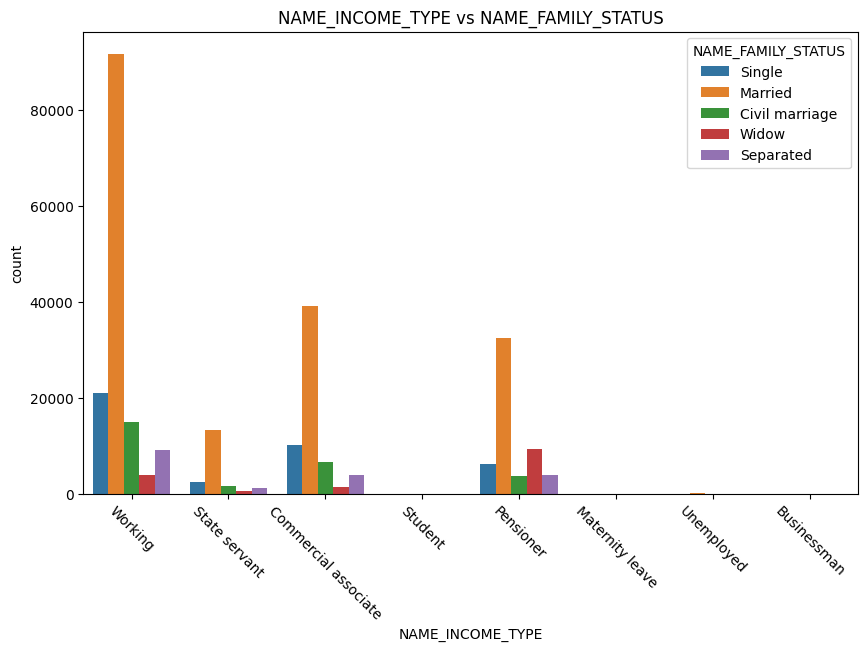

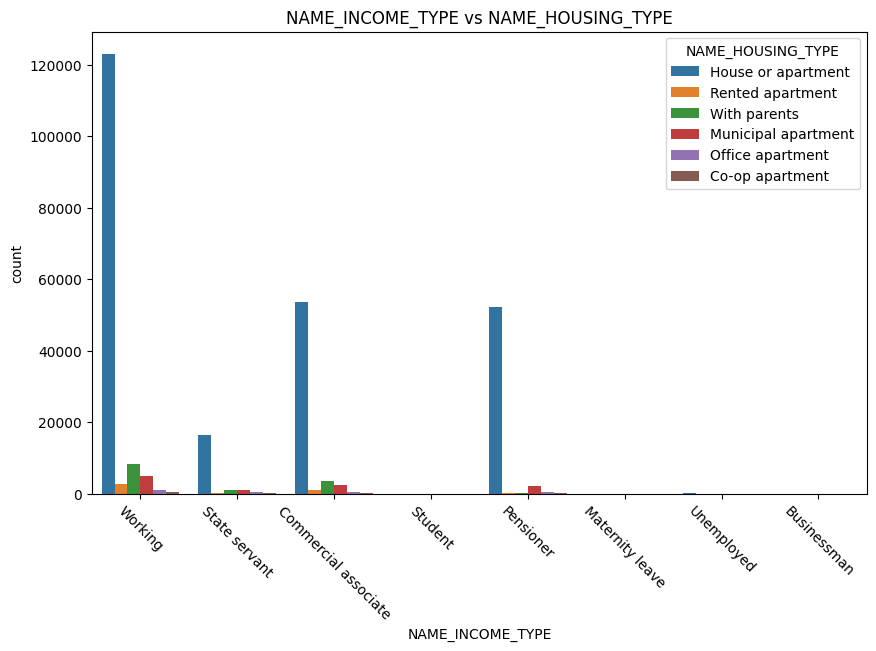

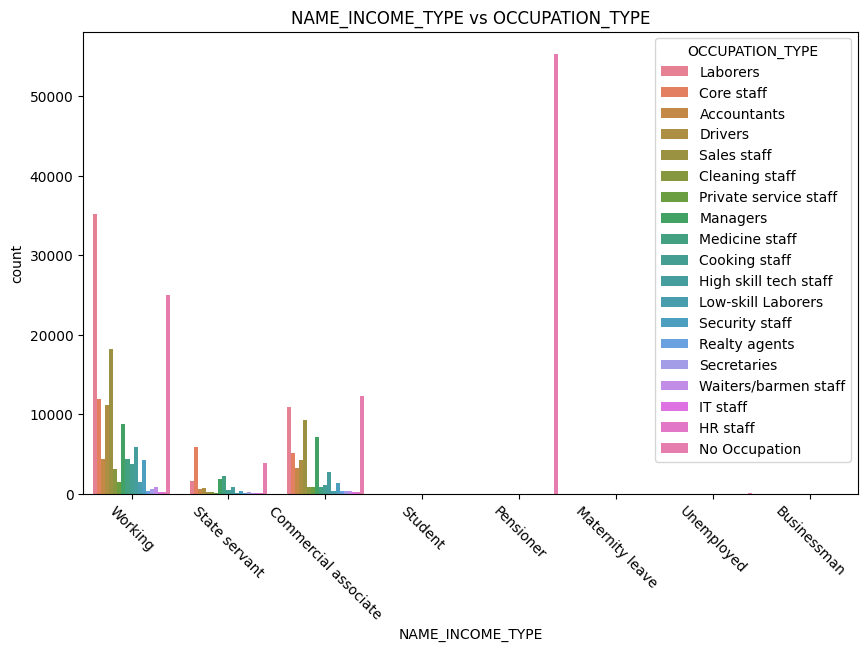

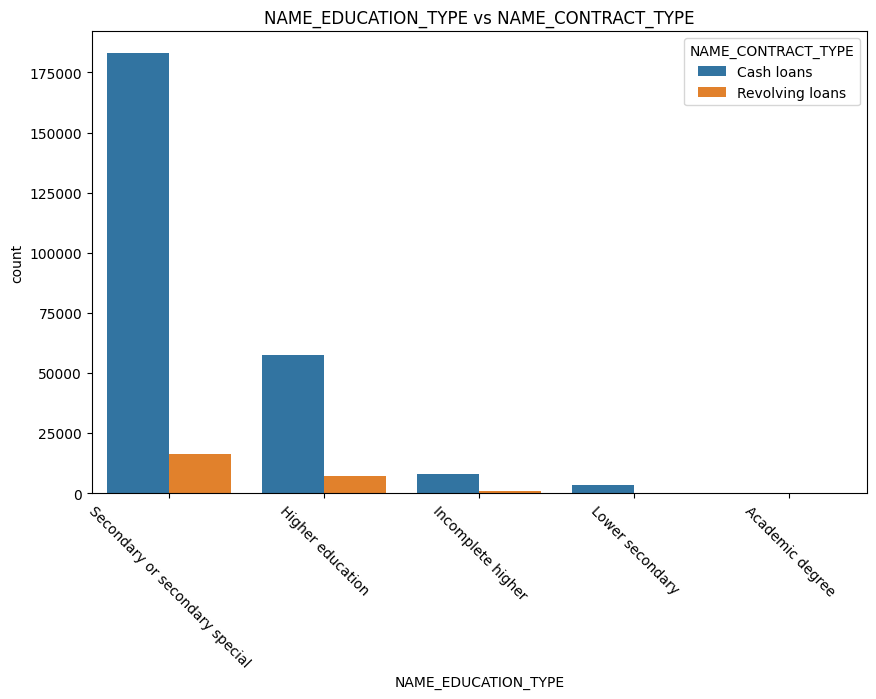

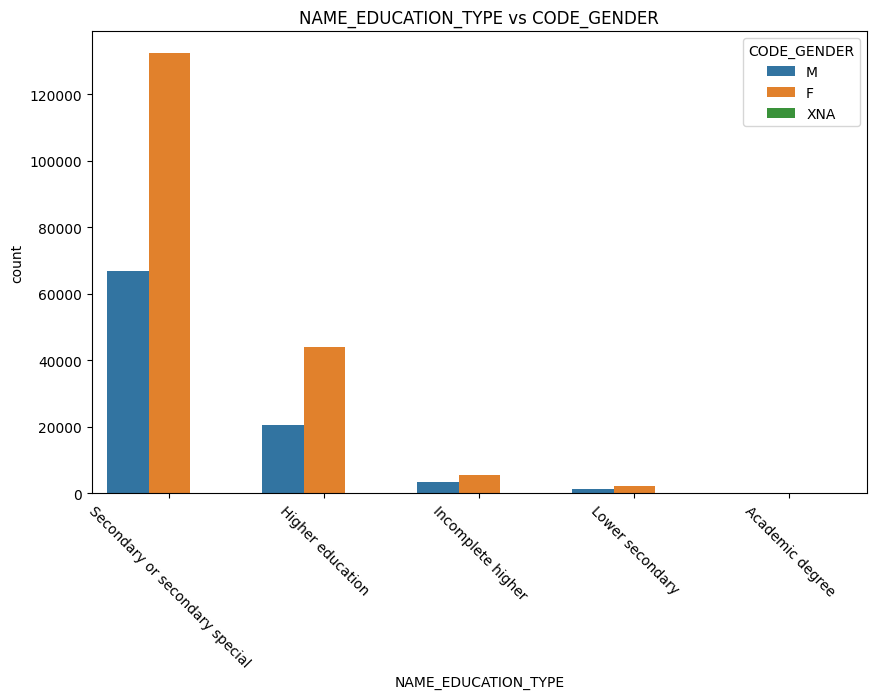

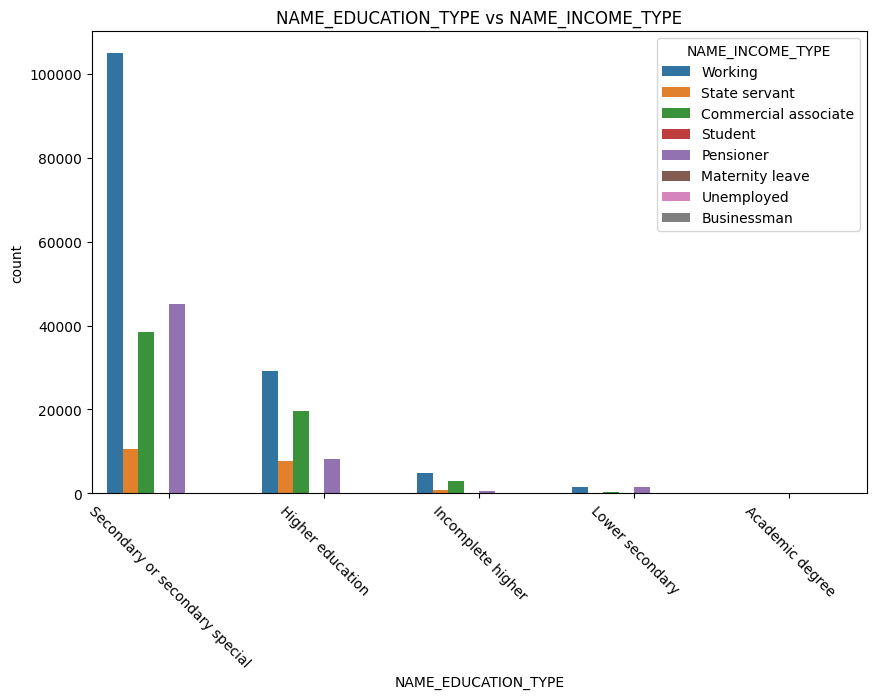

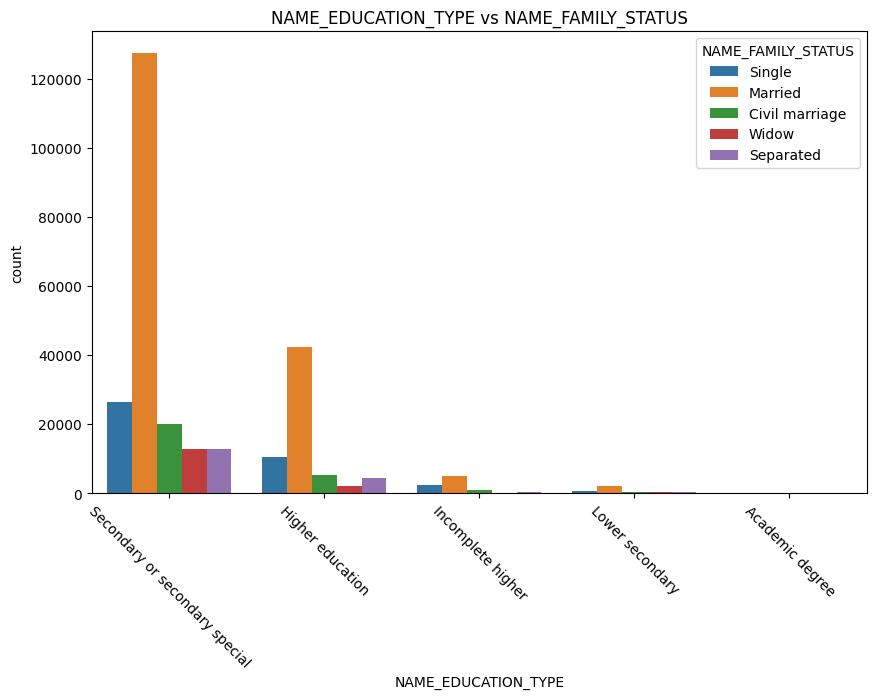

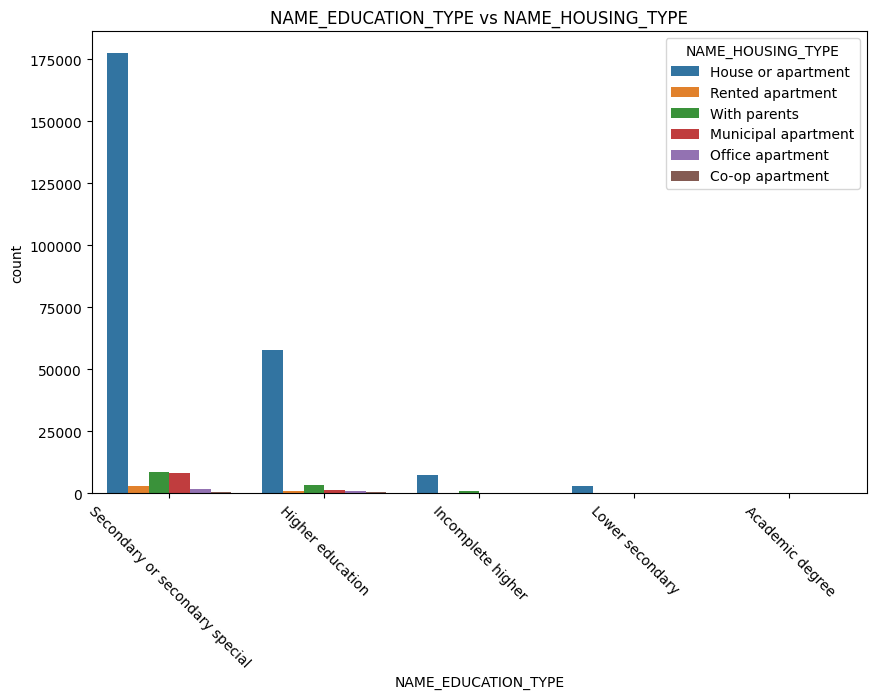

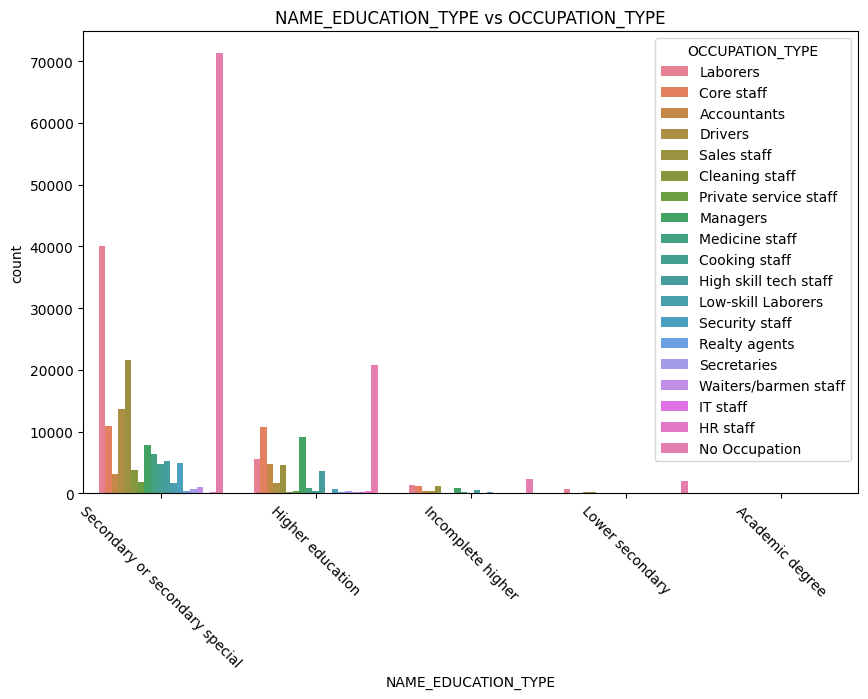

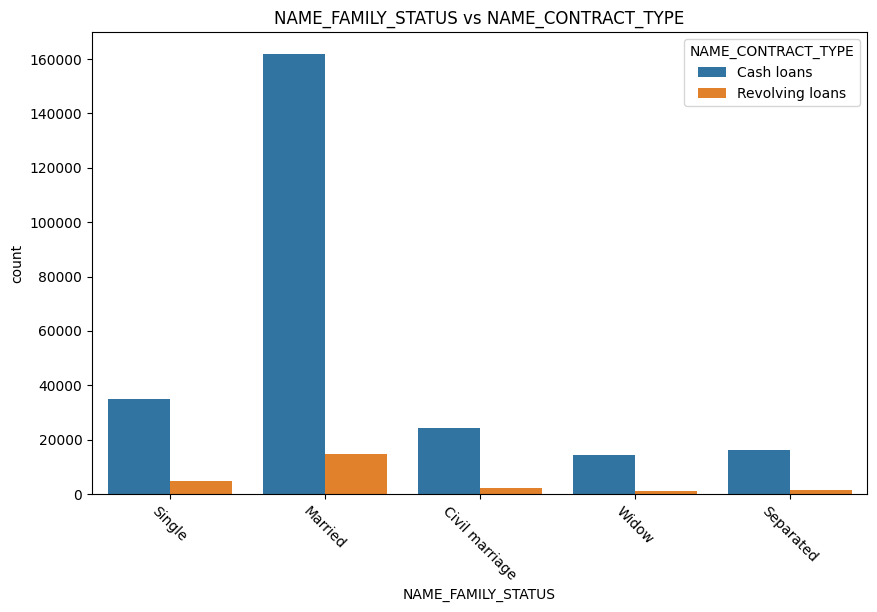

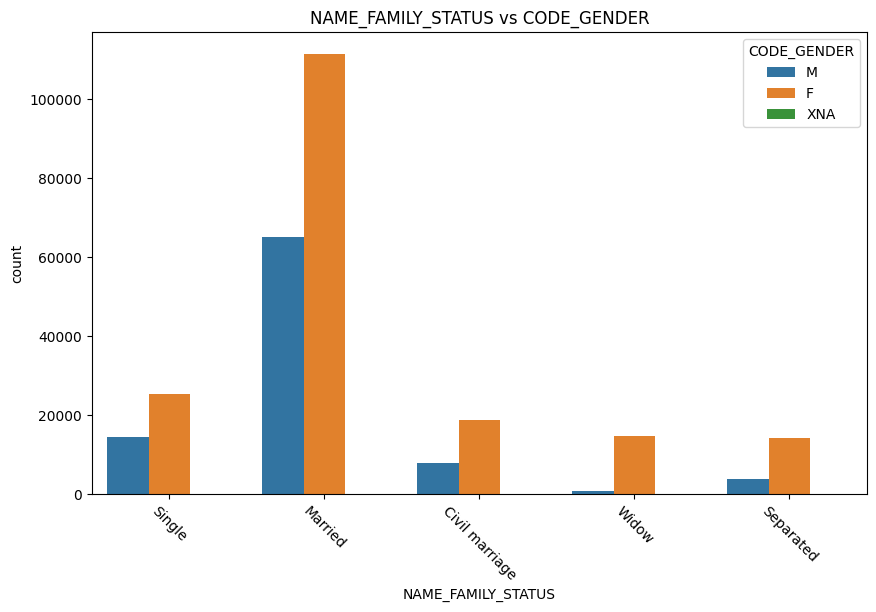

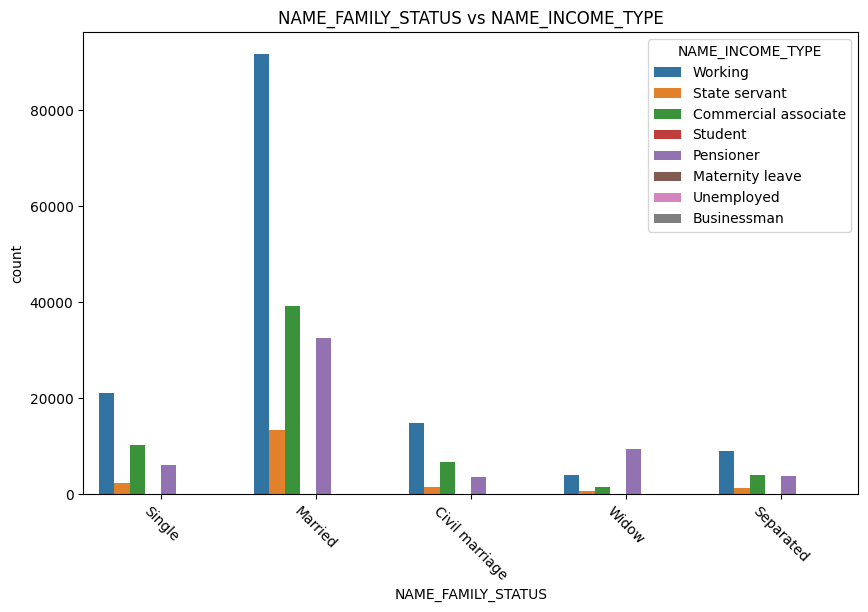

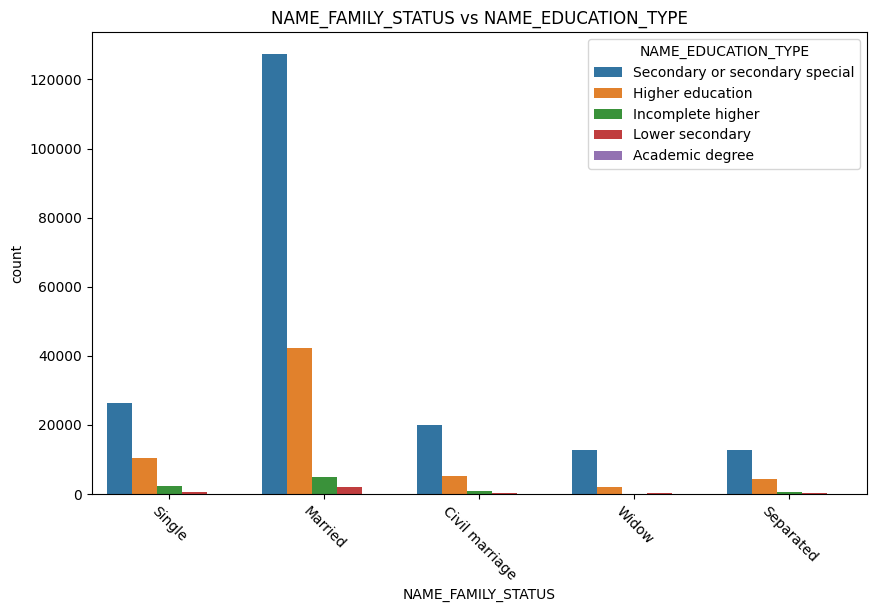

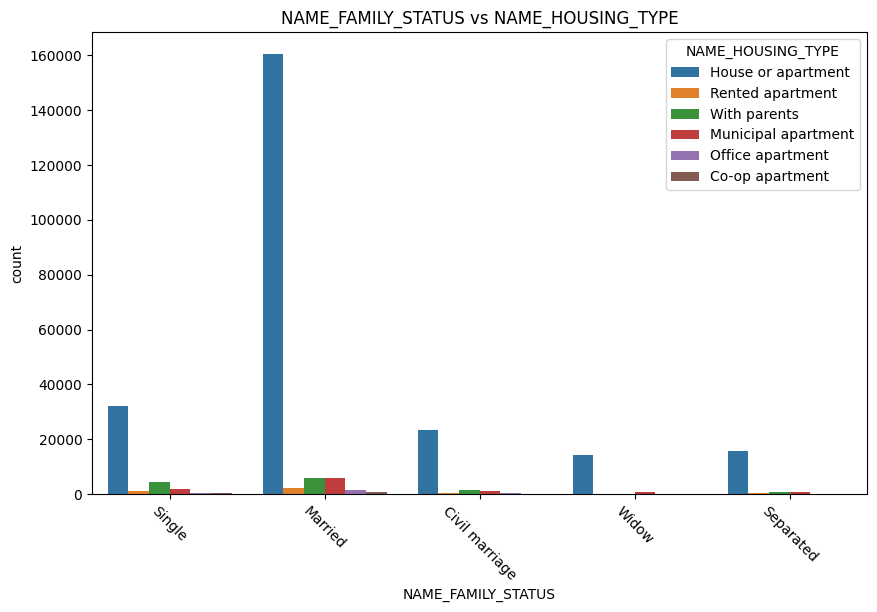

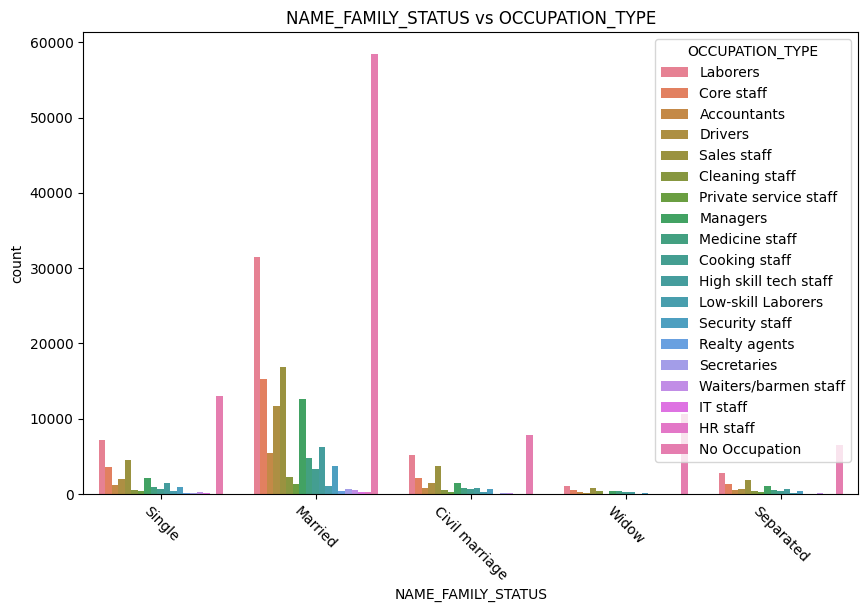

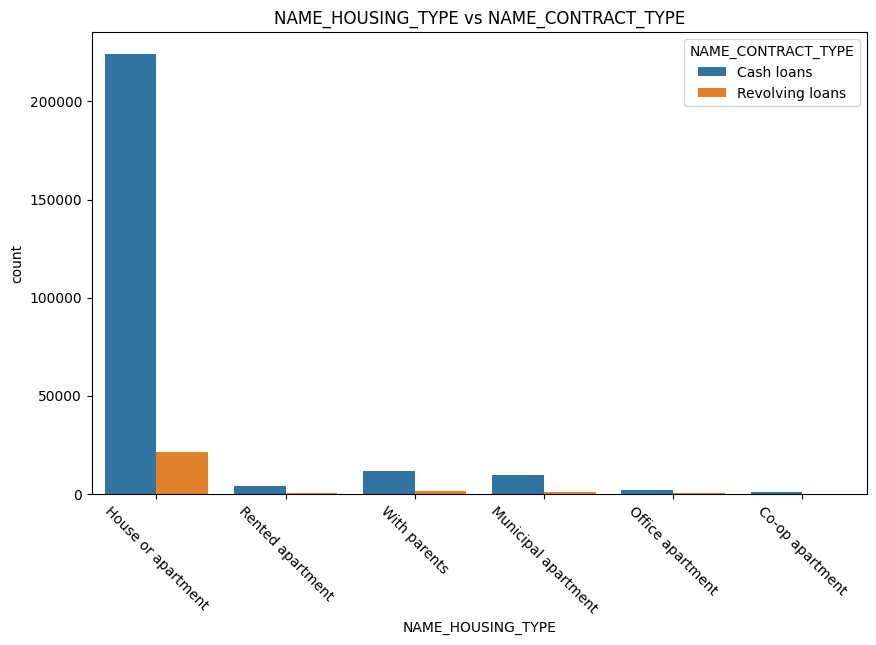

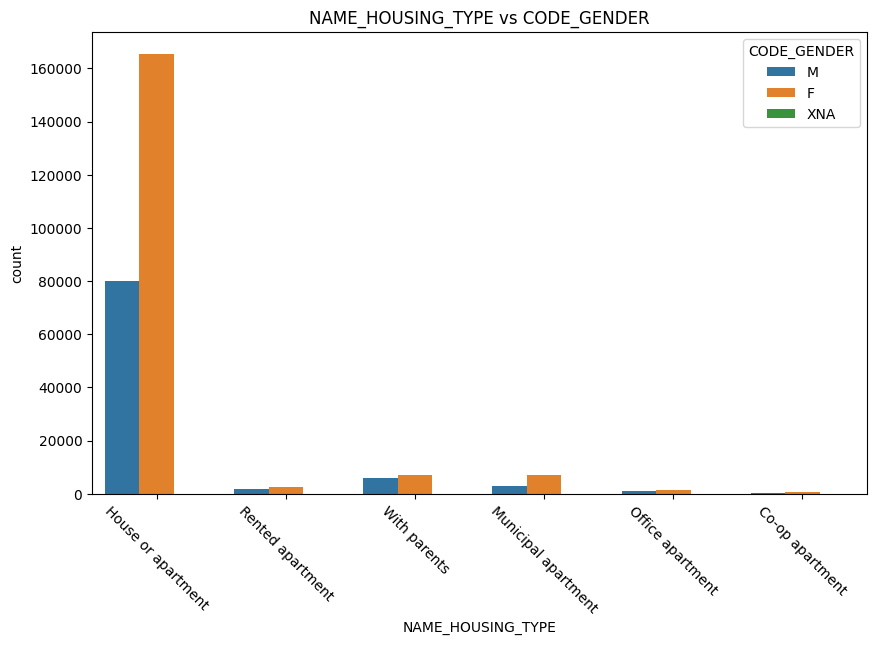

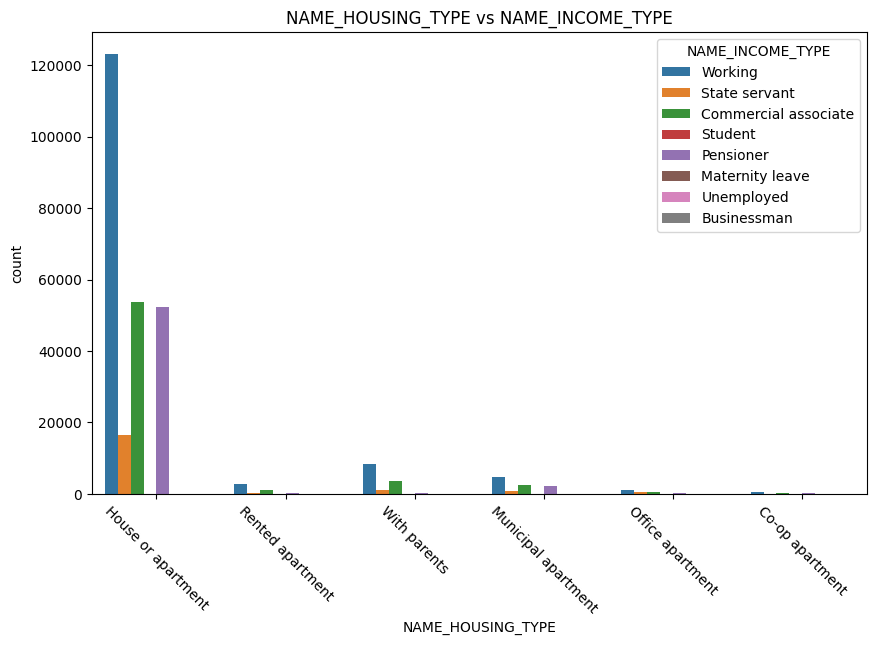

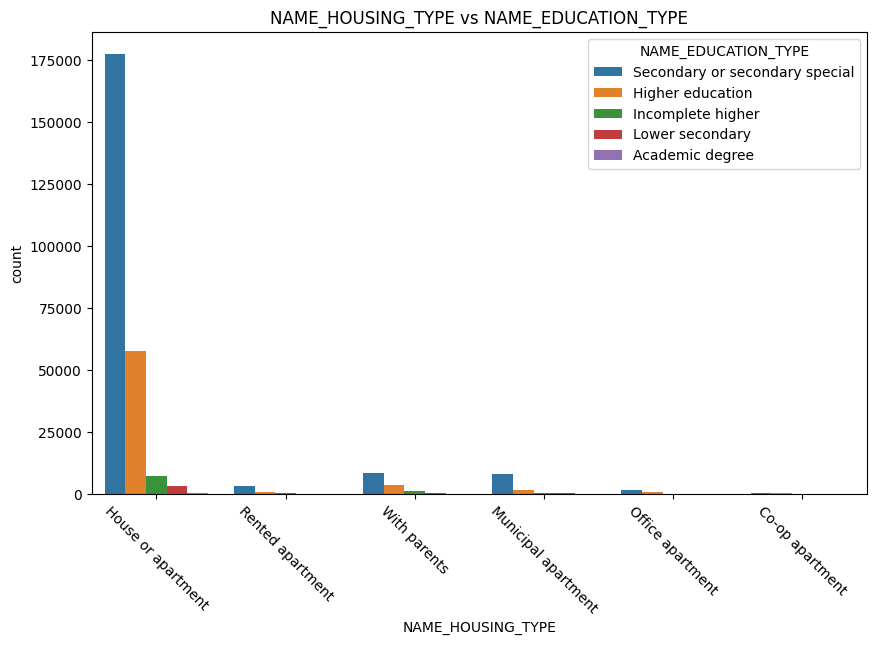

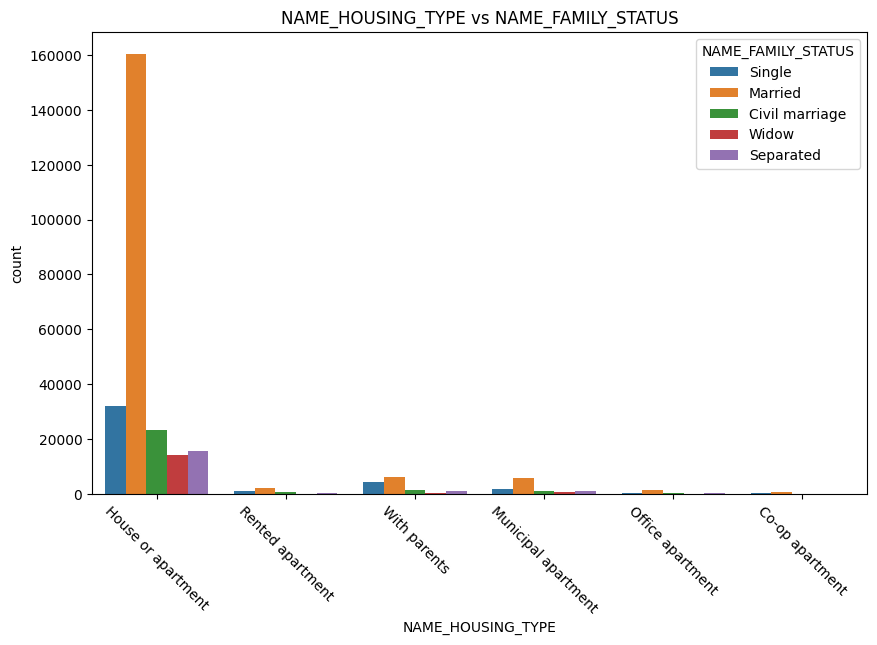

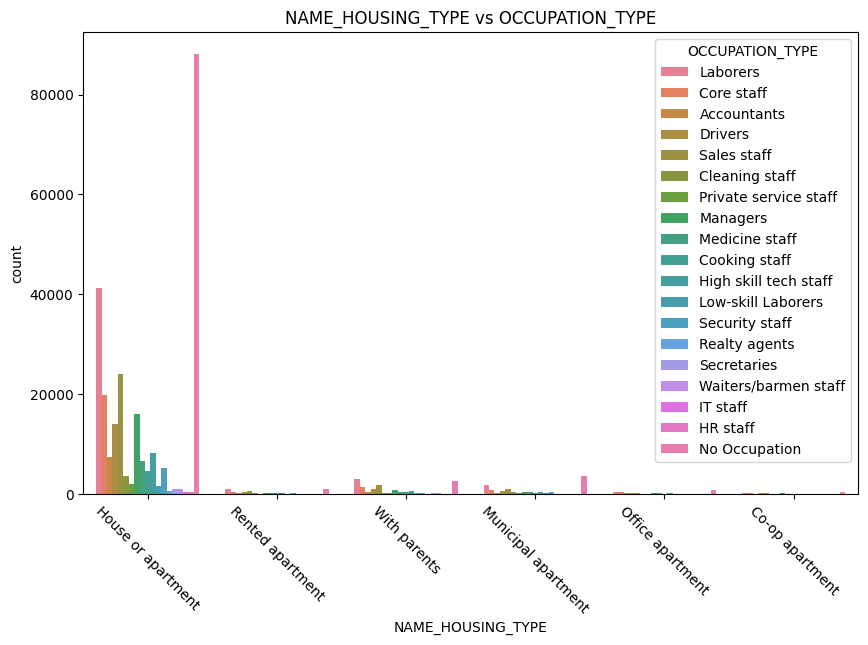

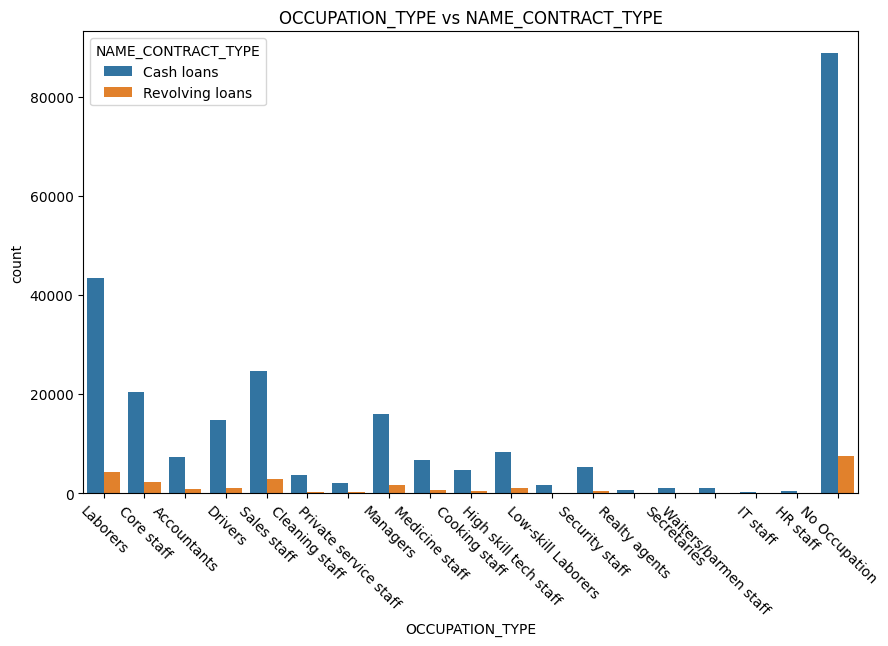

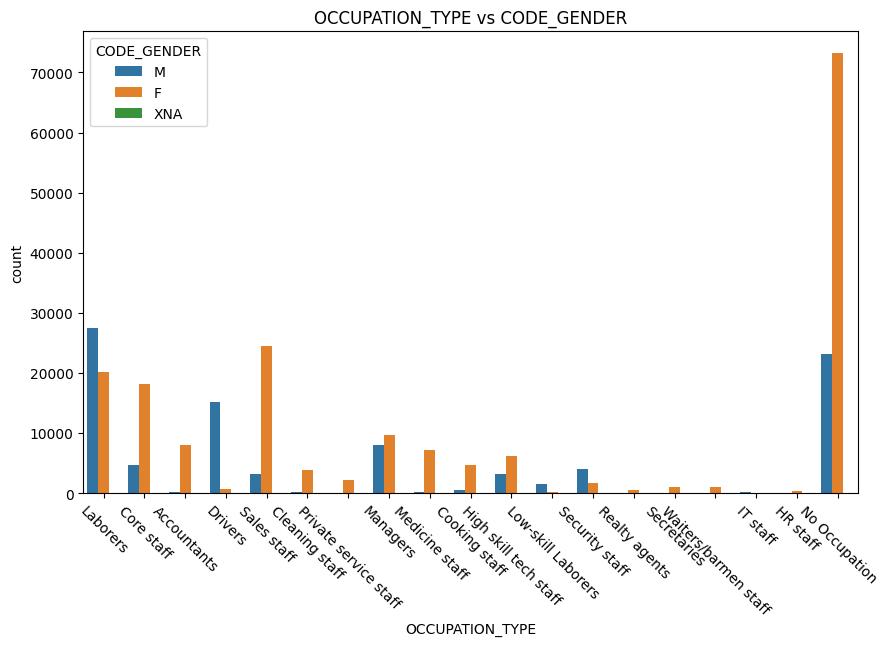

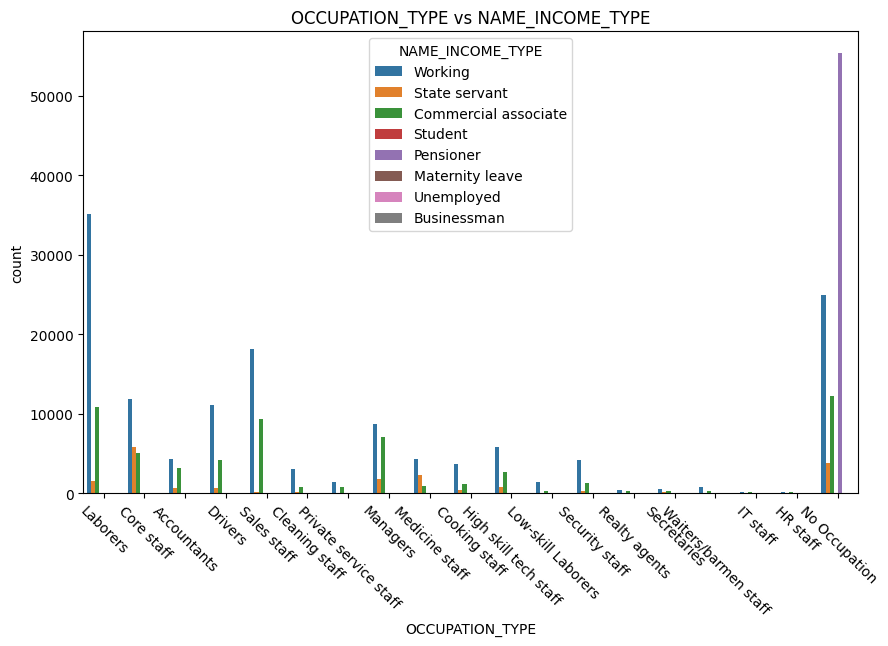

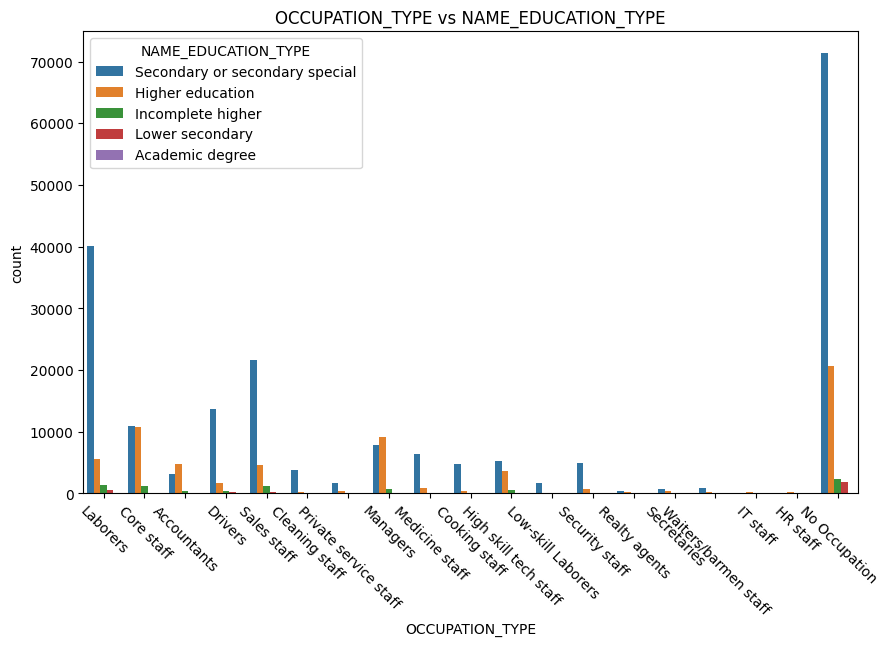

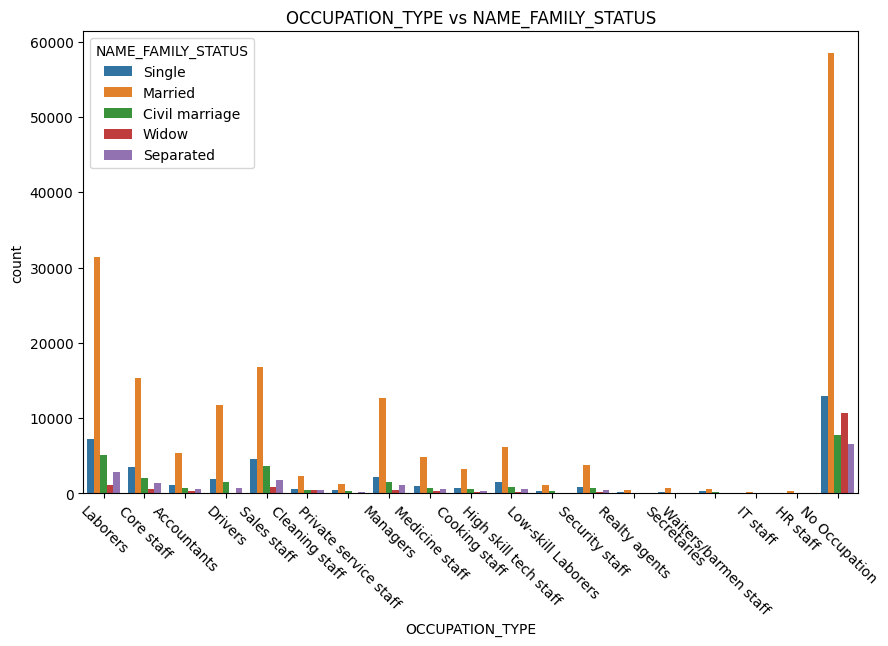

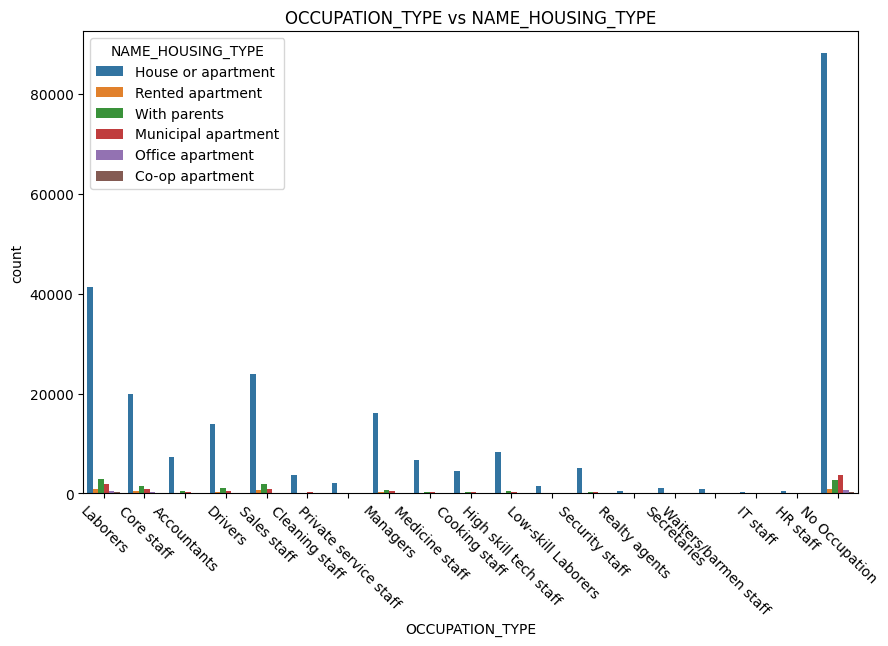

In [ ]:
for cat1 in categorical:
    for cat2 in categorical:
        if cat1 != cat2:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=cat1, hue=cat2)
            plt.title(f'{cat1} vs {cat2}')
            plt.xticks(rotation = -45)
            plt.show()

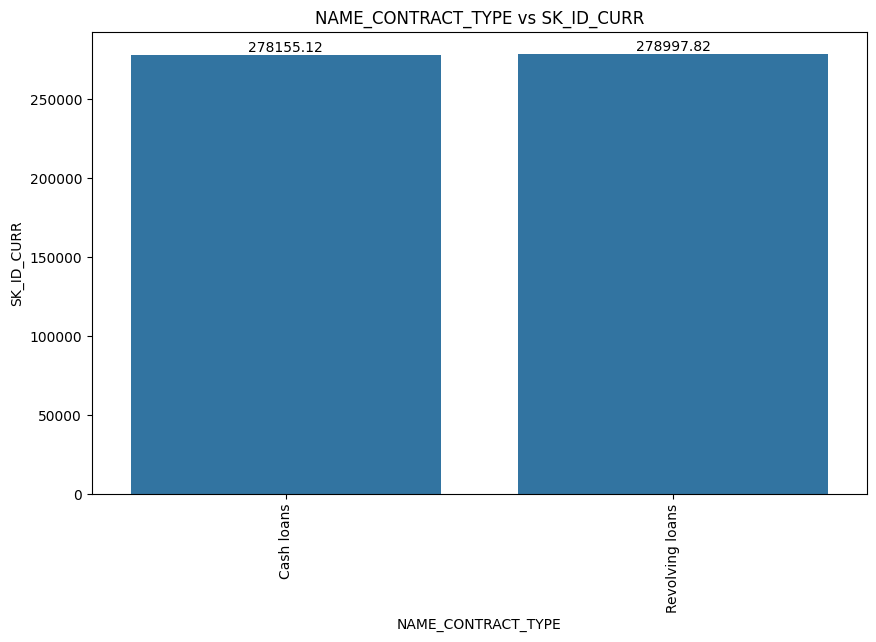

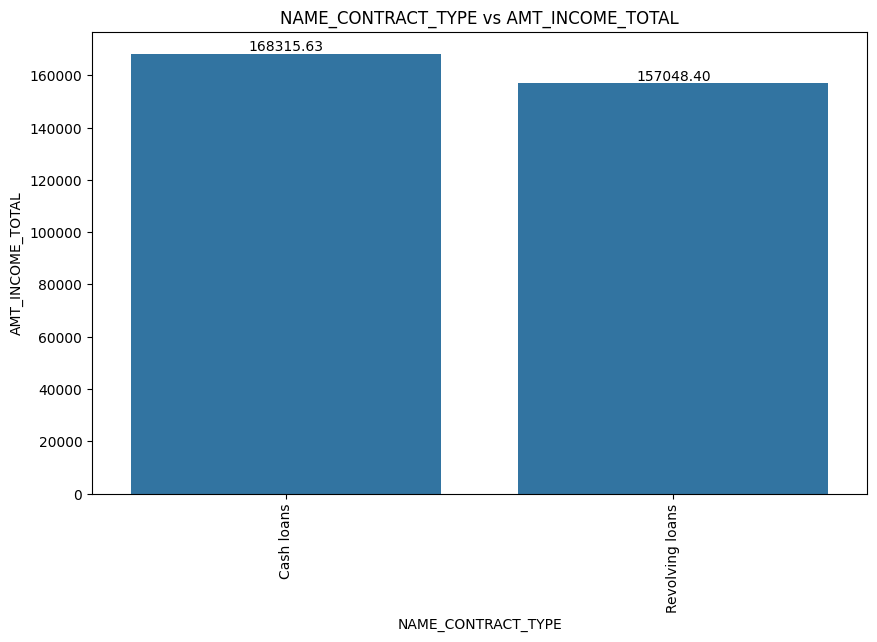

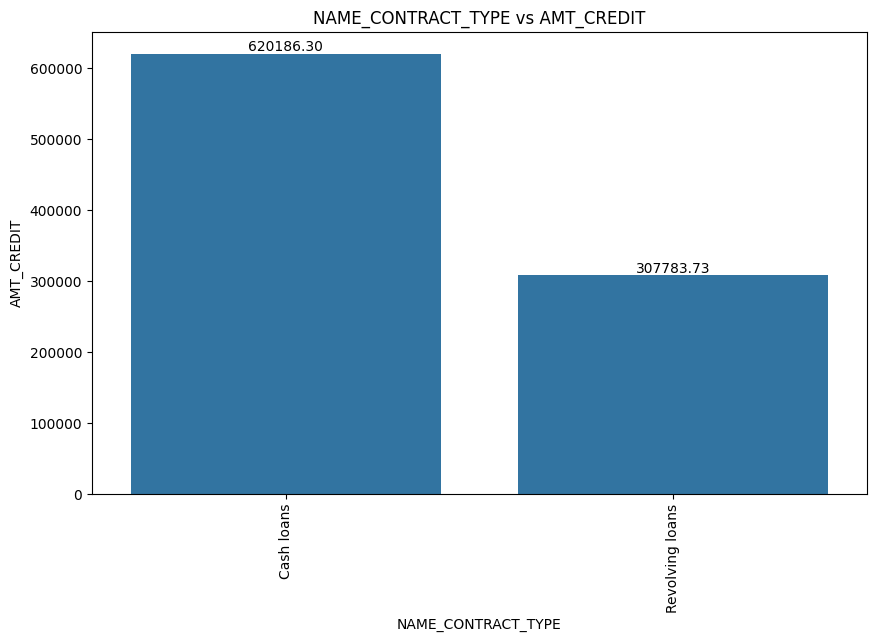

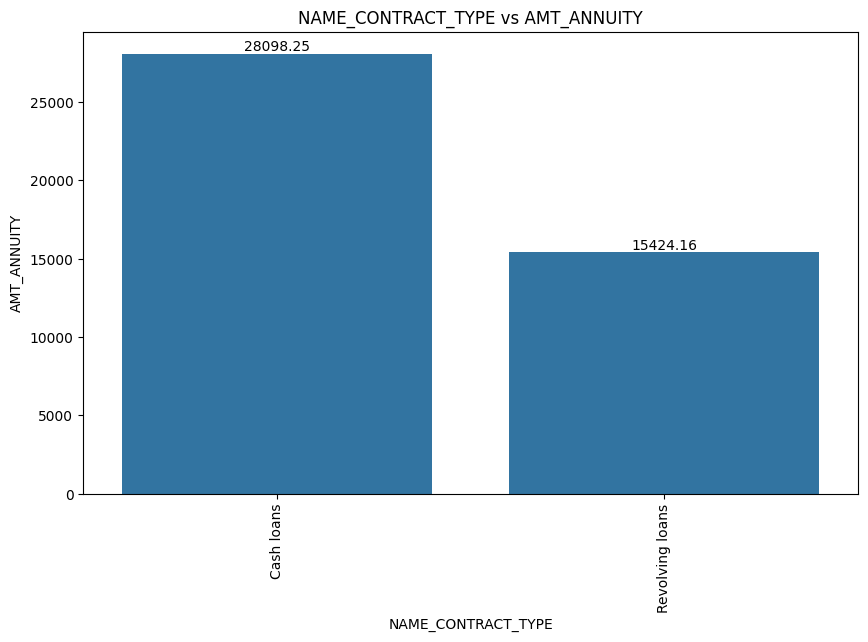

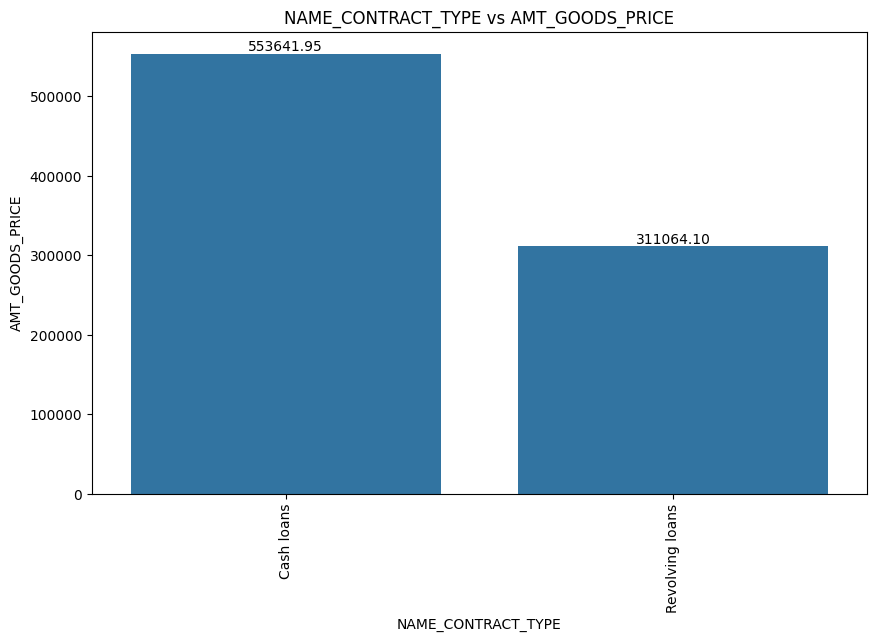

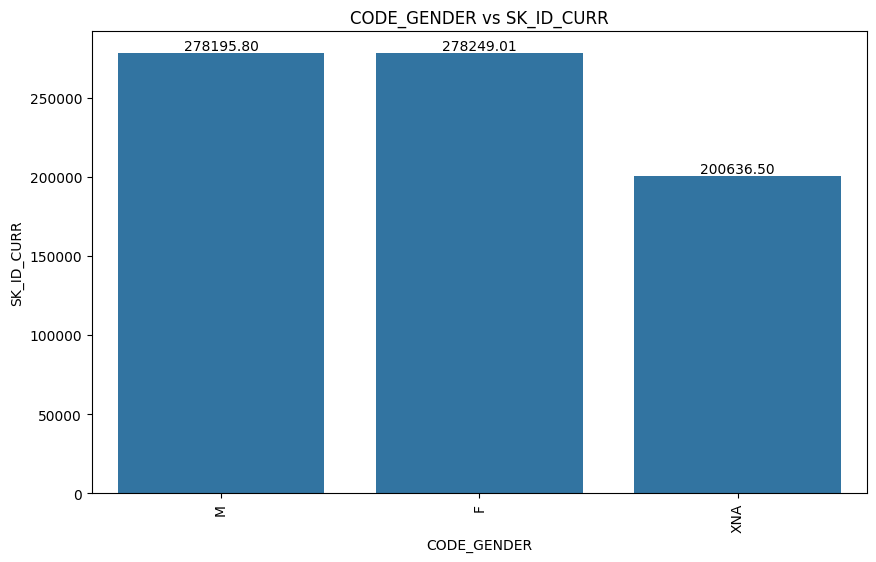

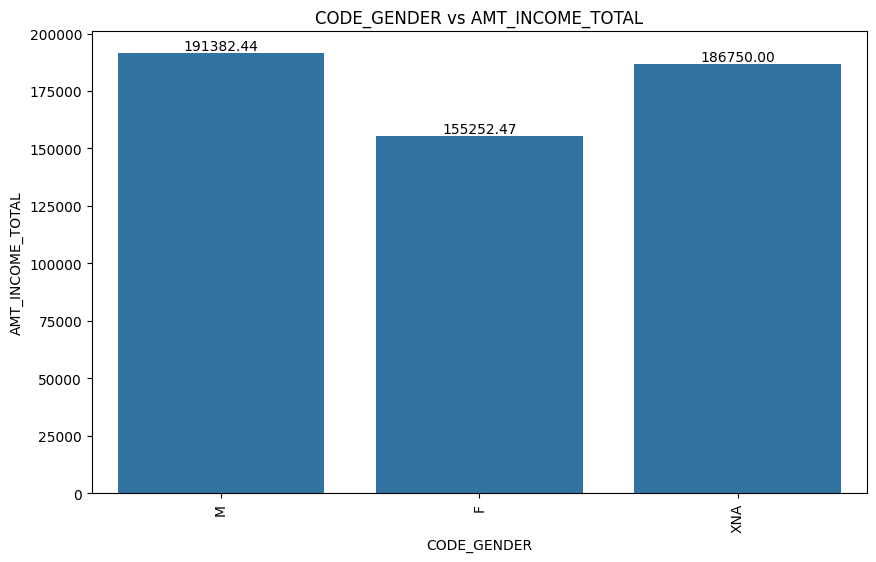

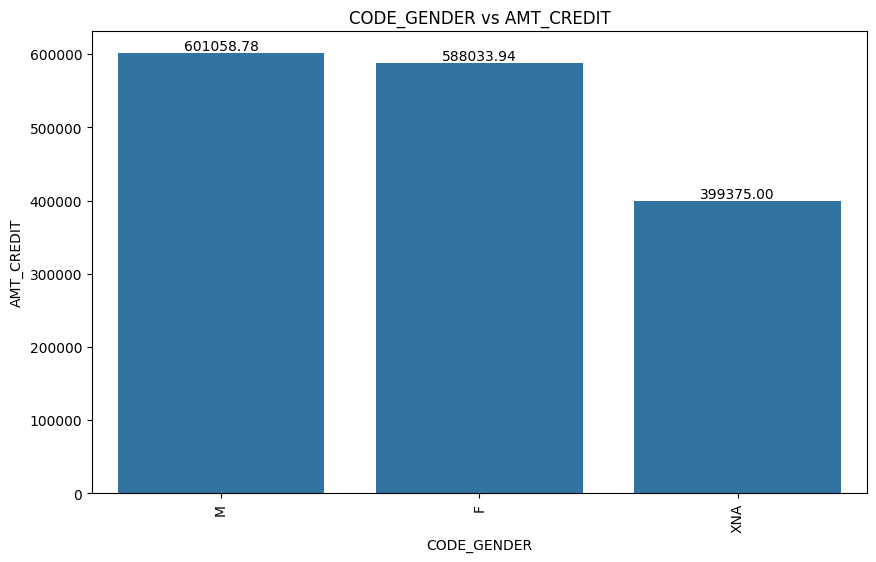

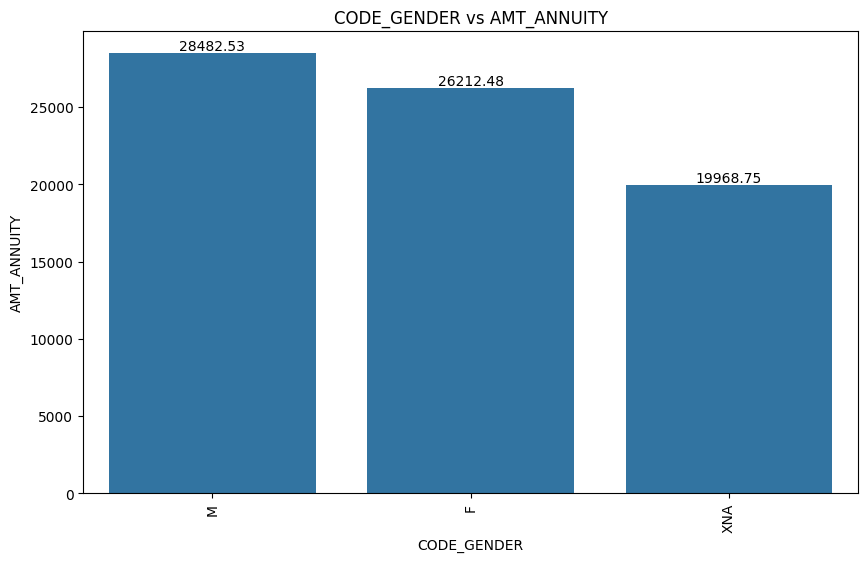

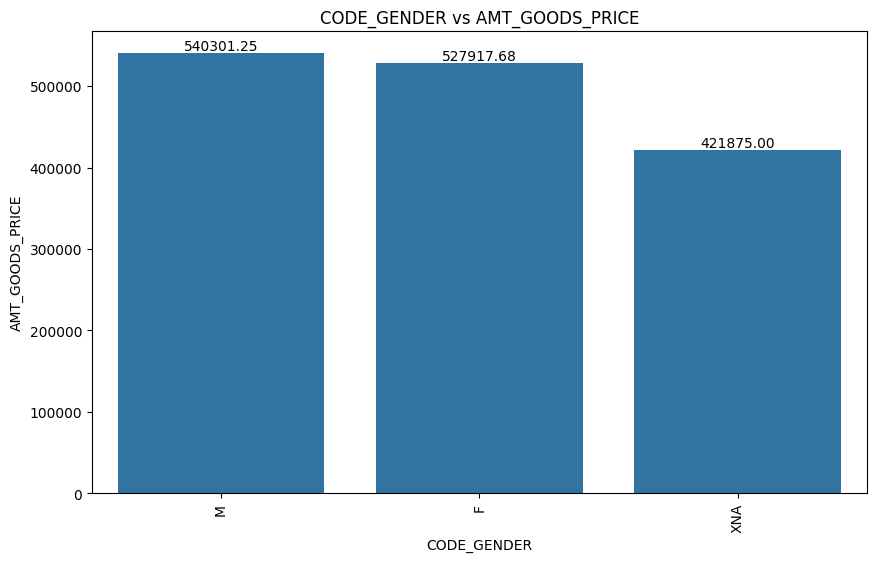

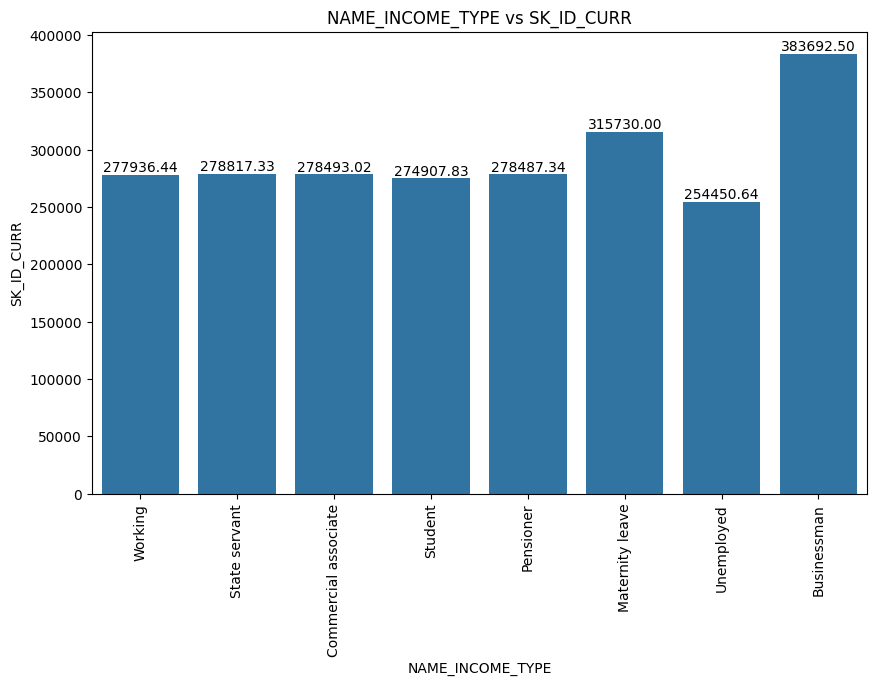

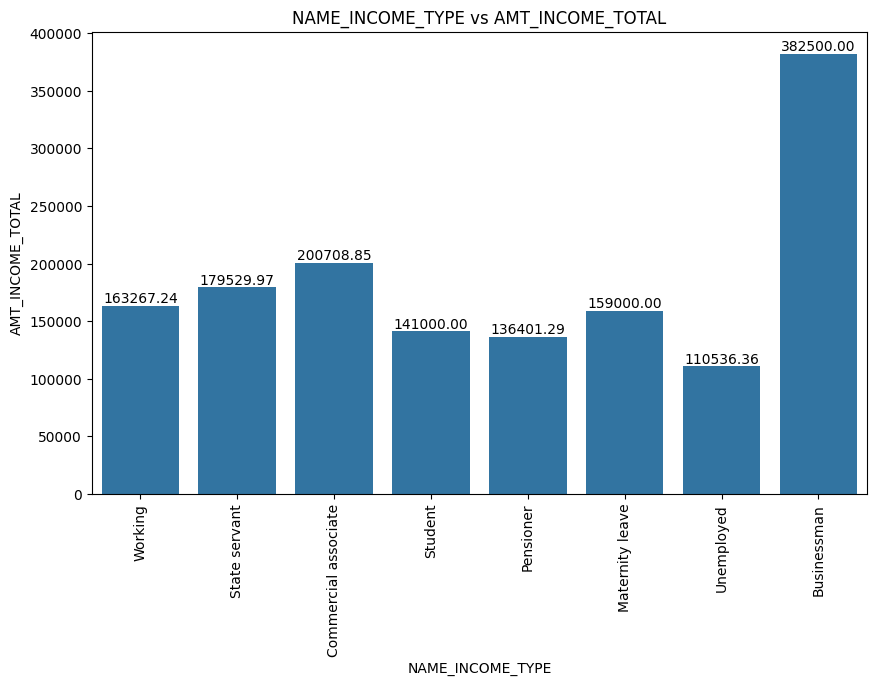

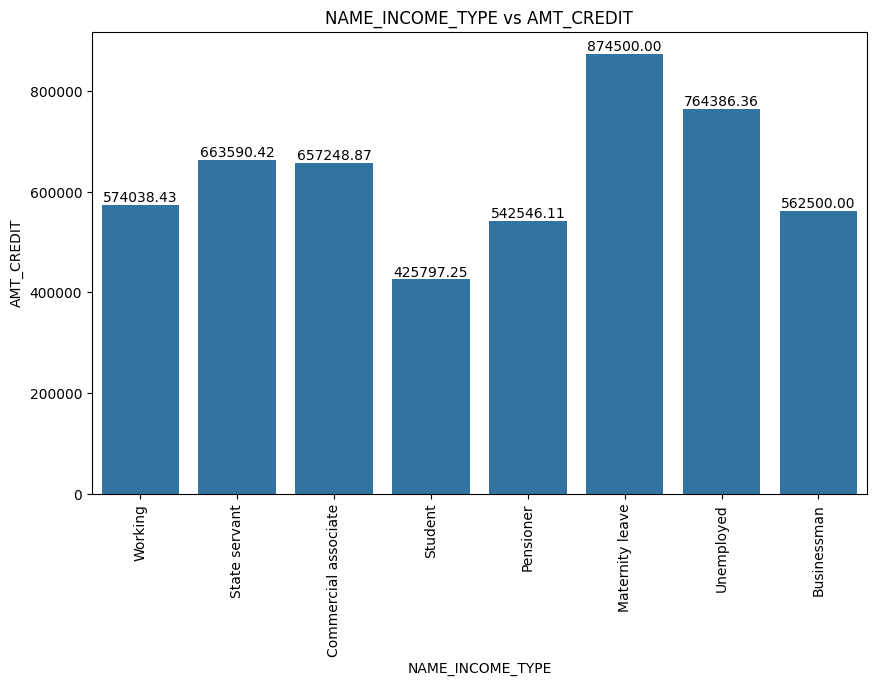

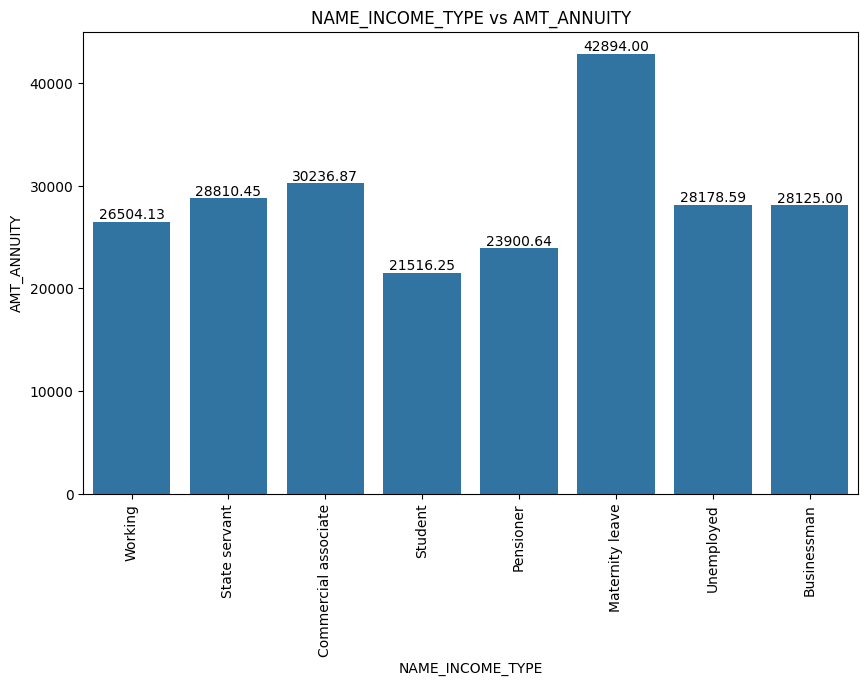

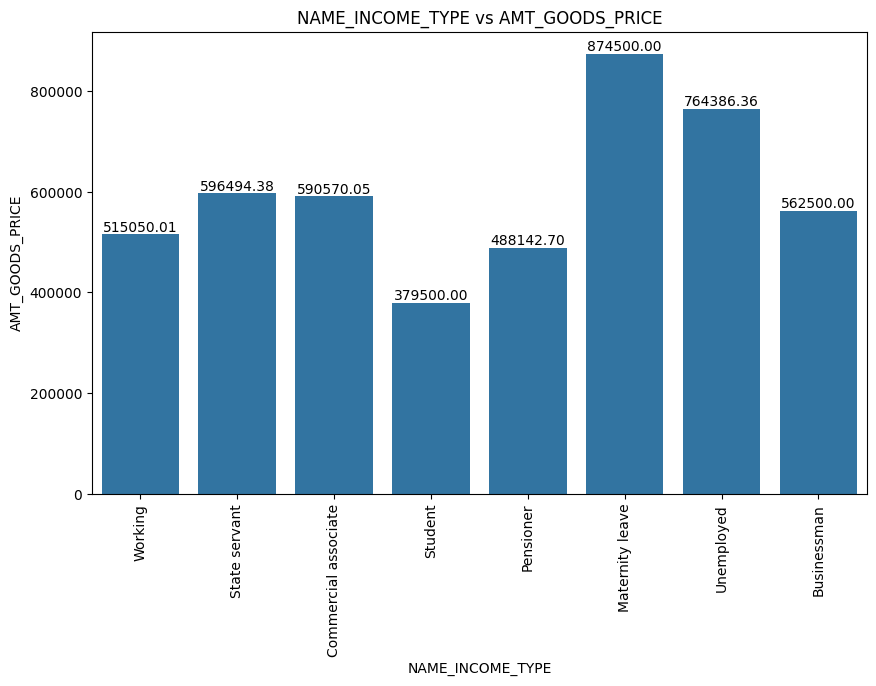

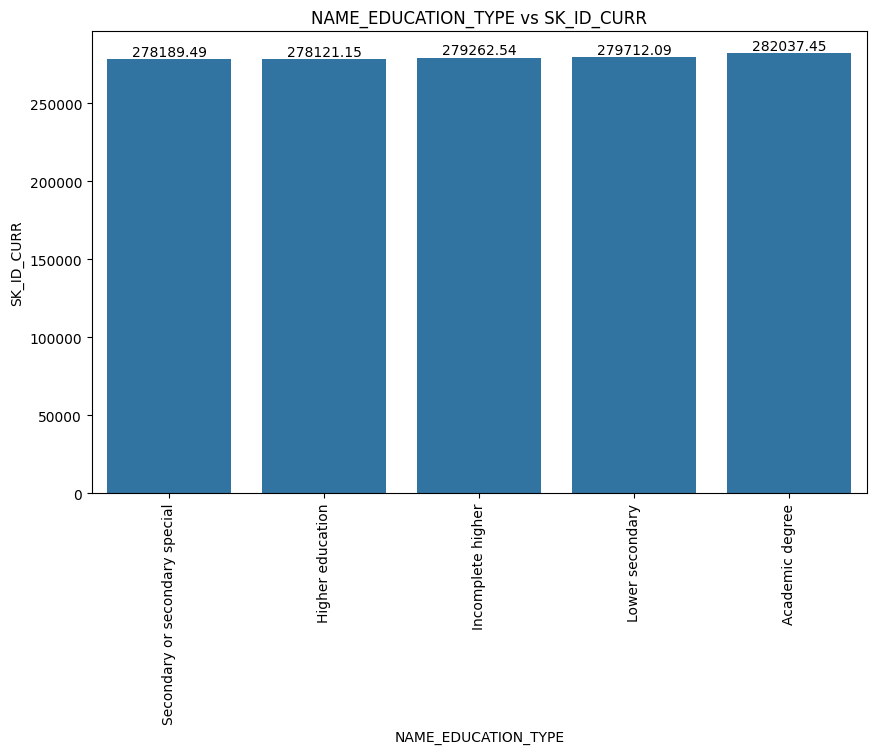

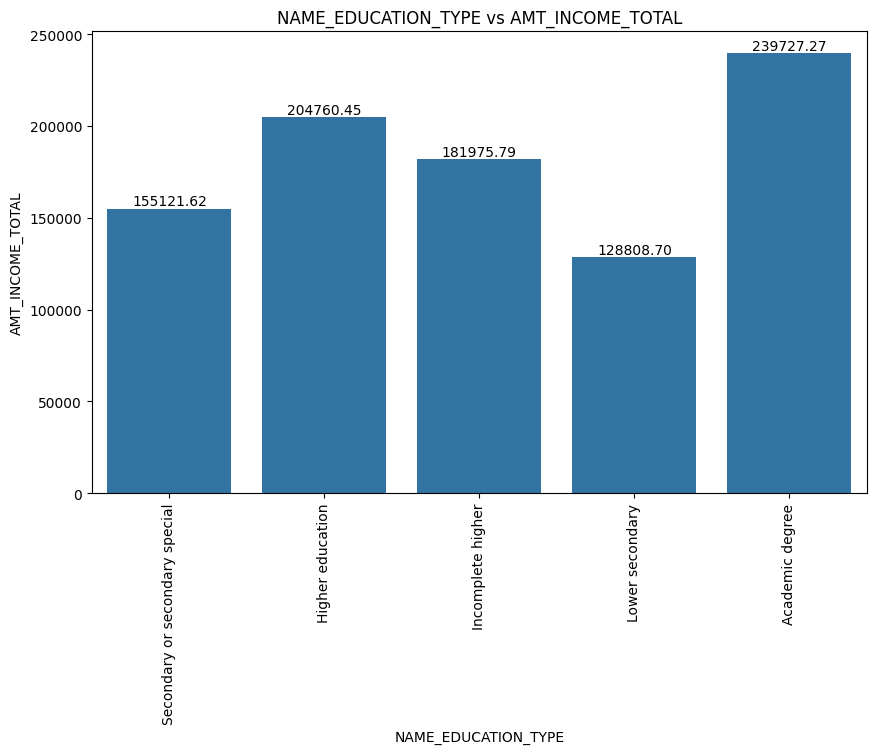

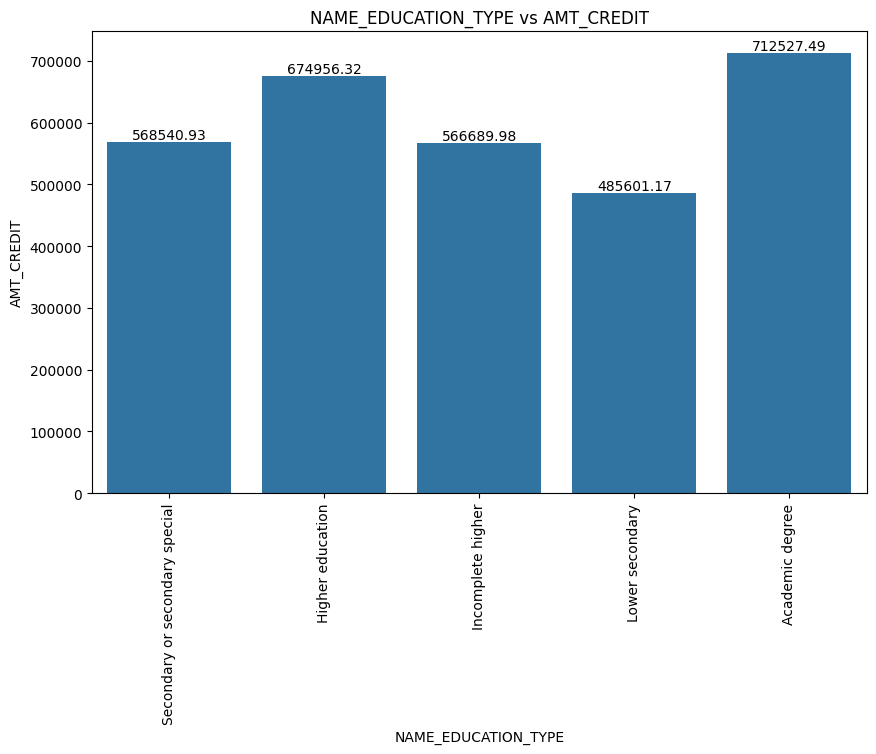

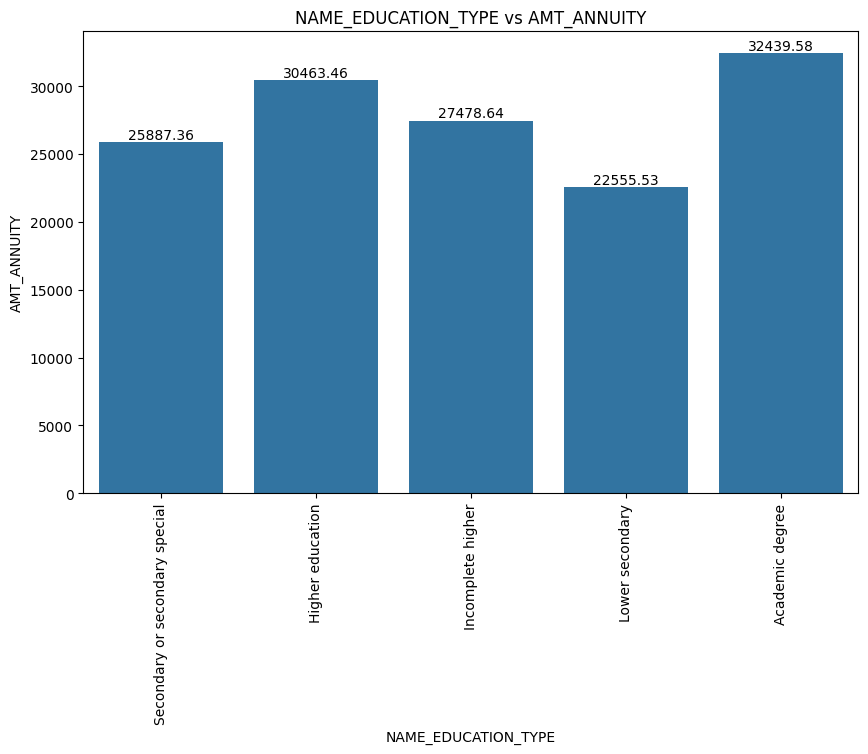

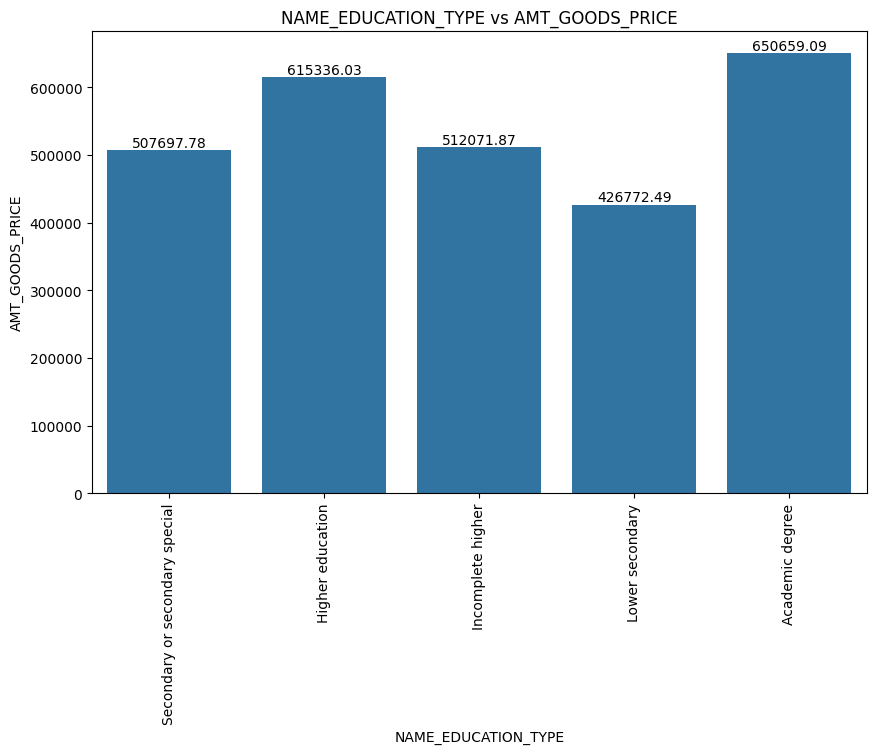

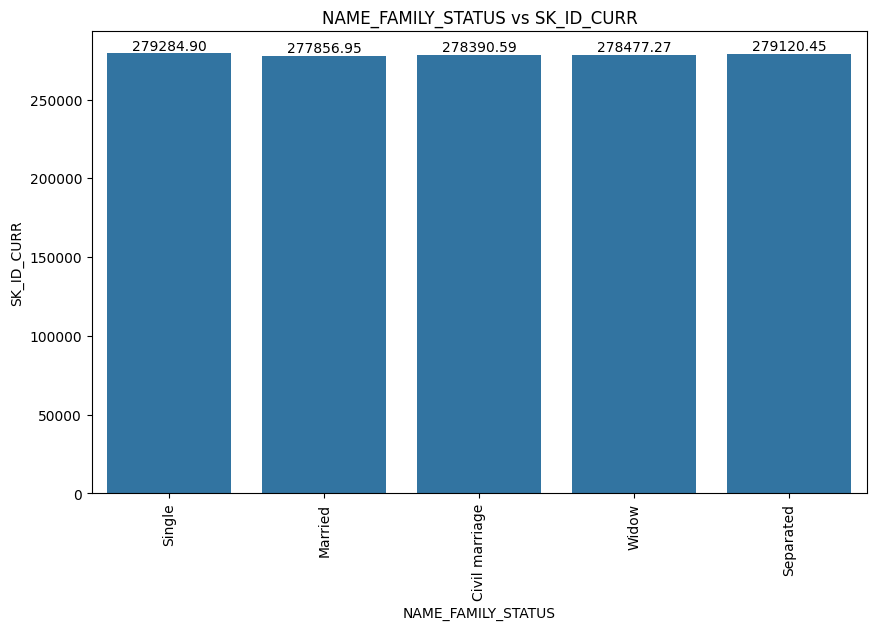

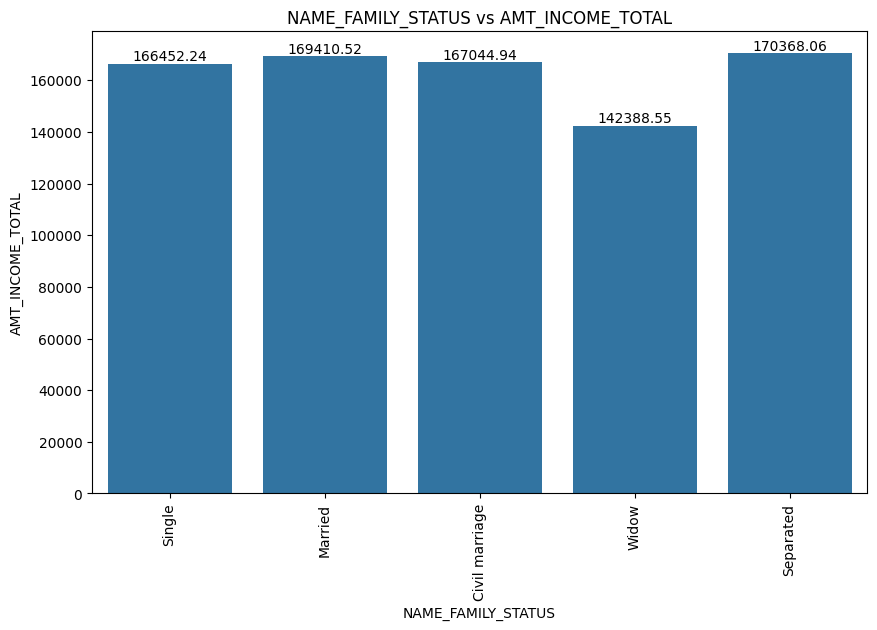

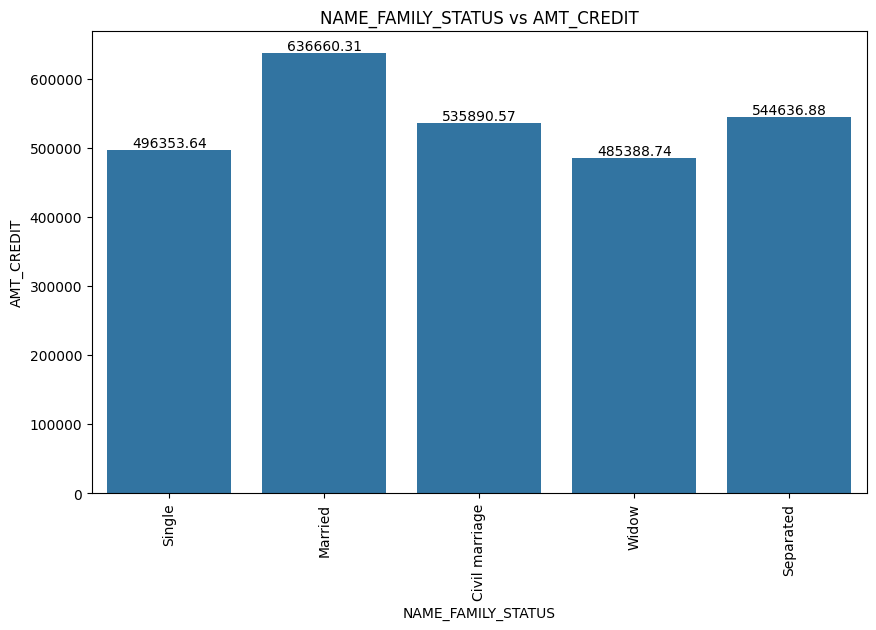

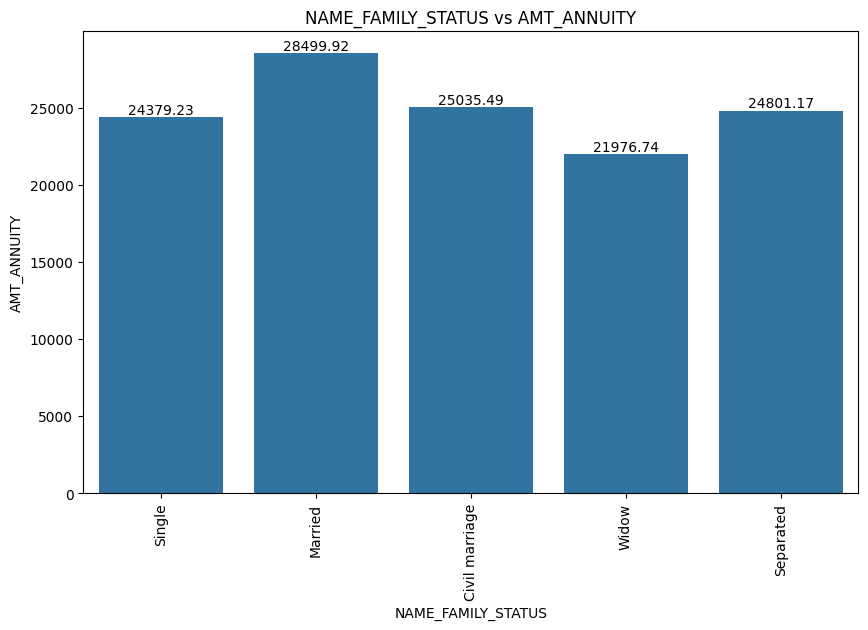

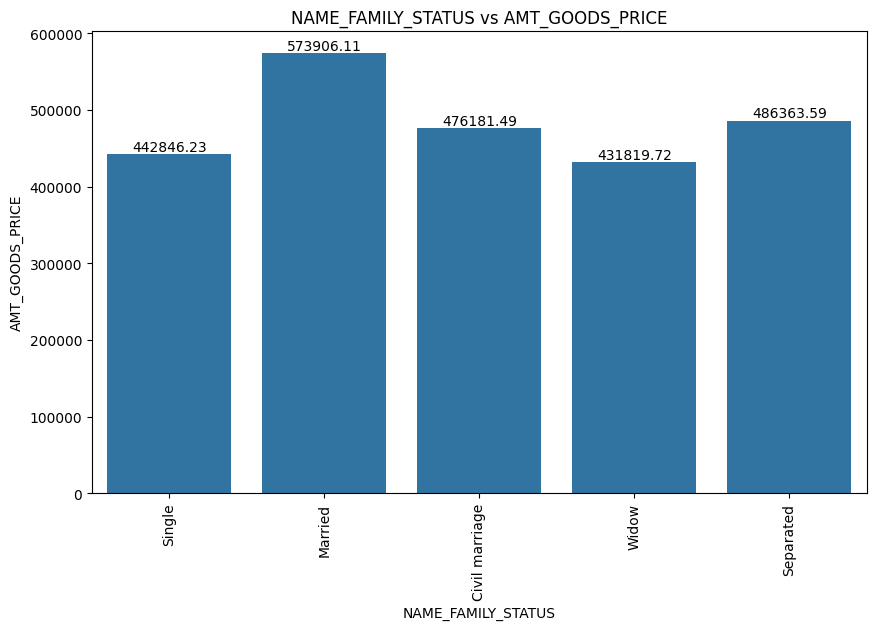

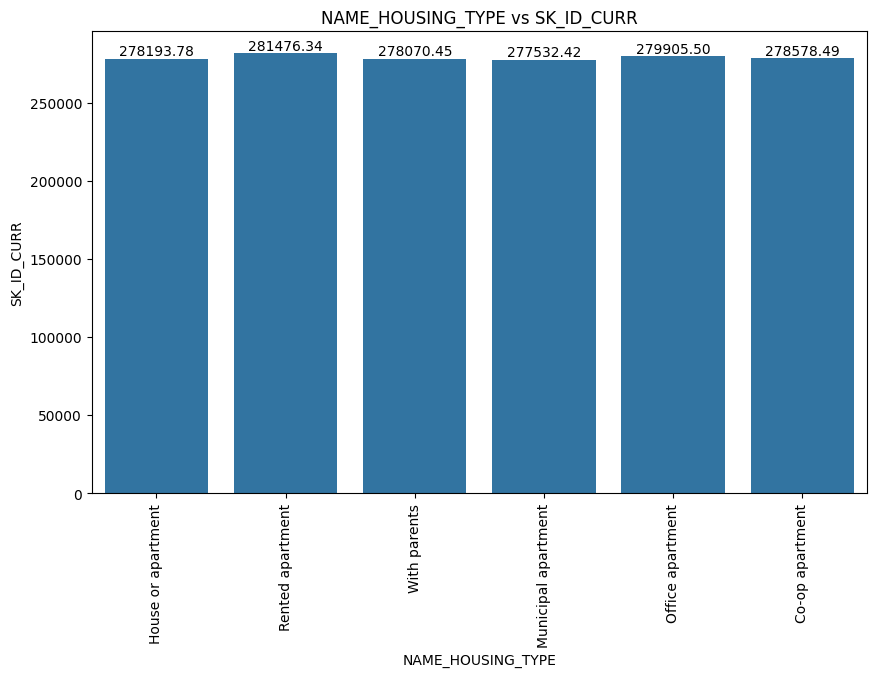

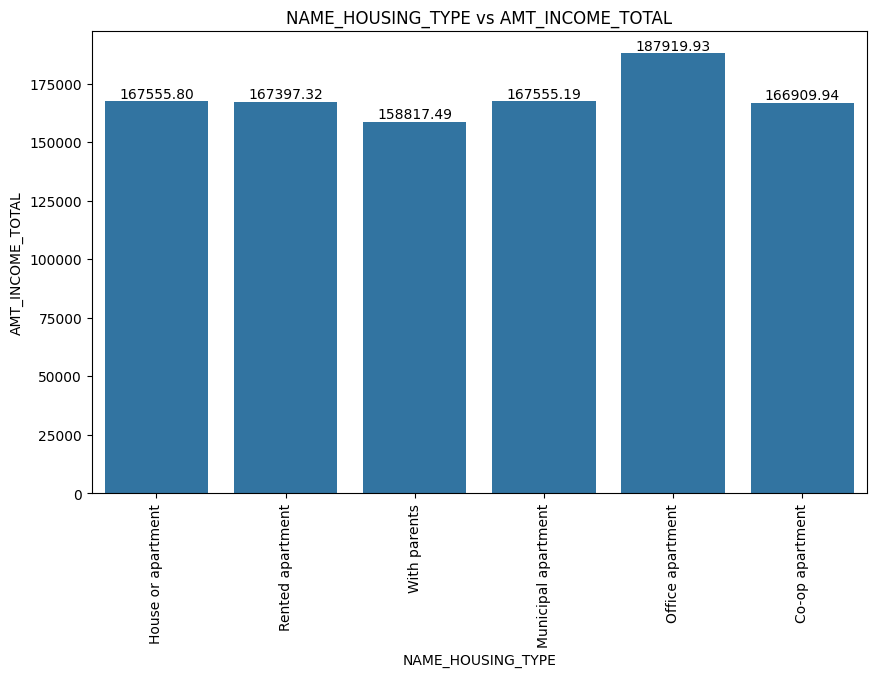

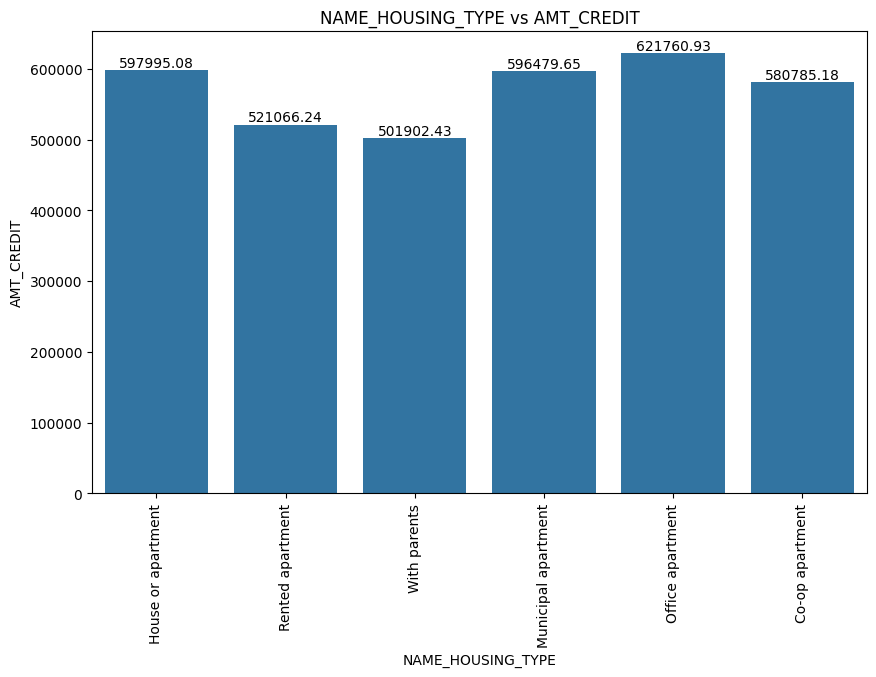

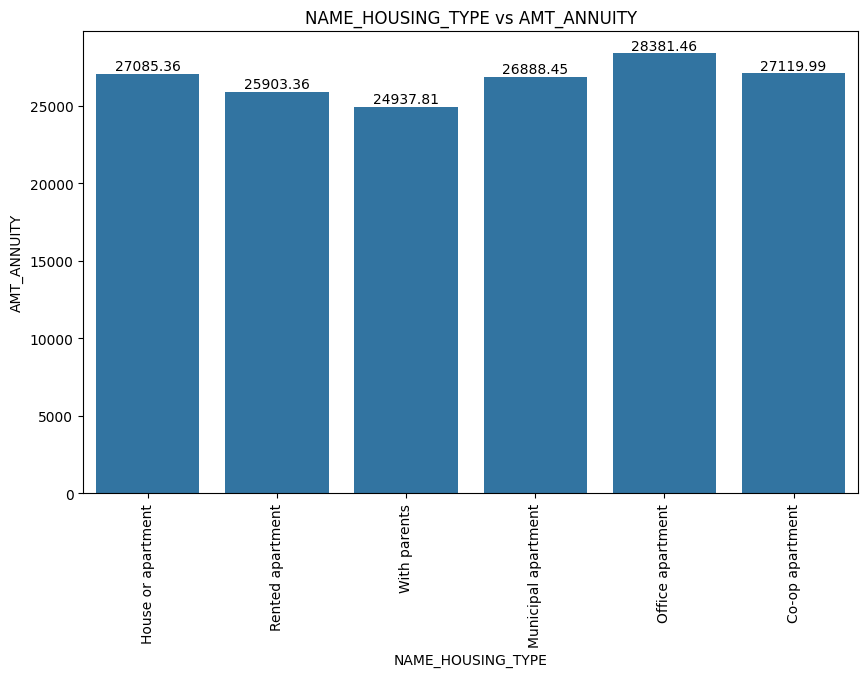

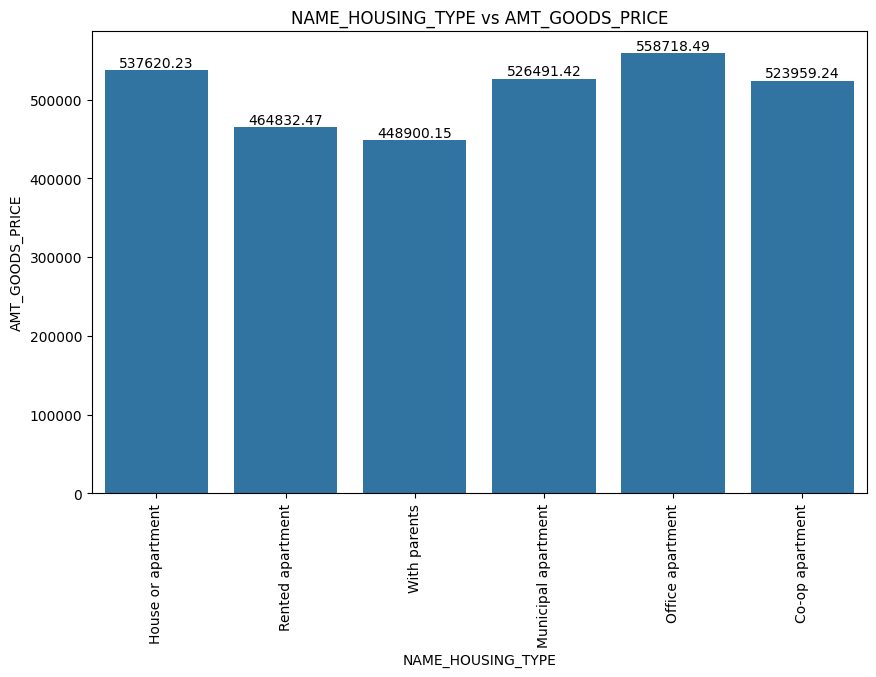

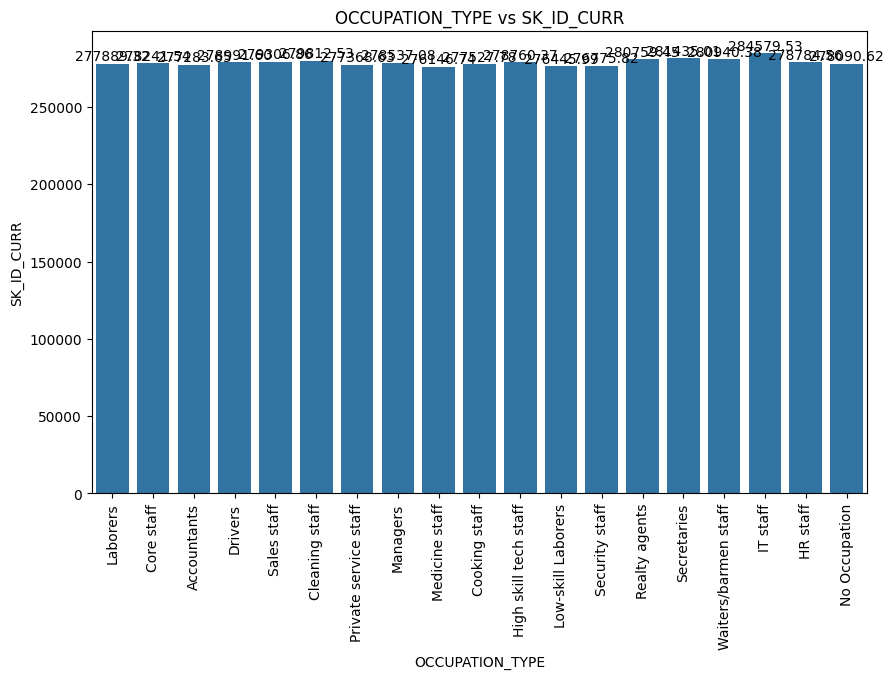

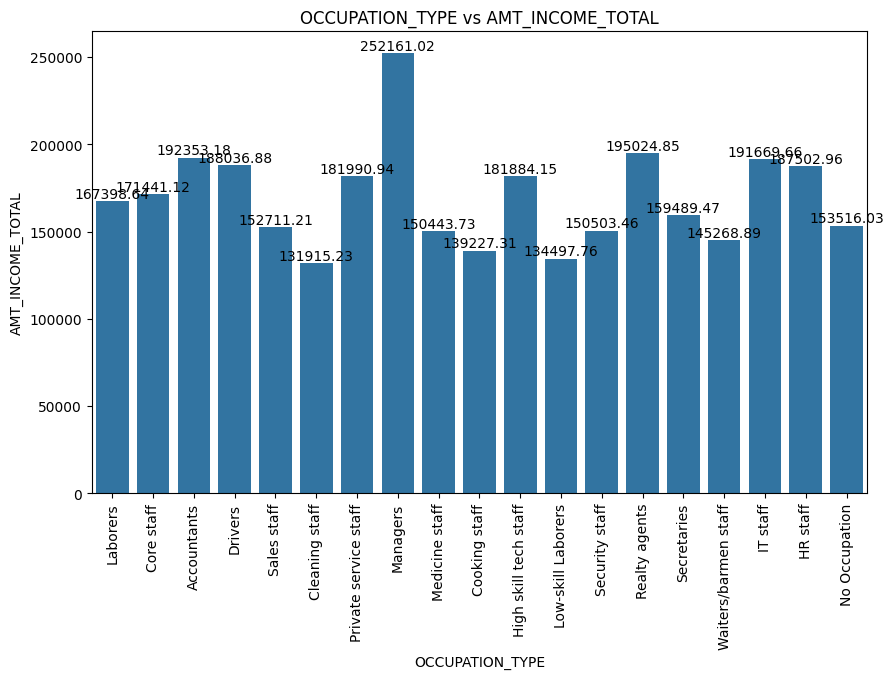

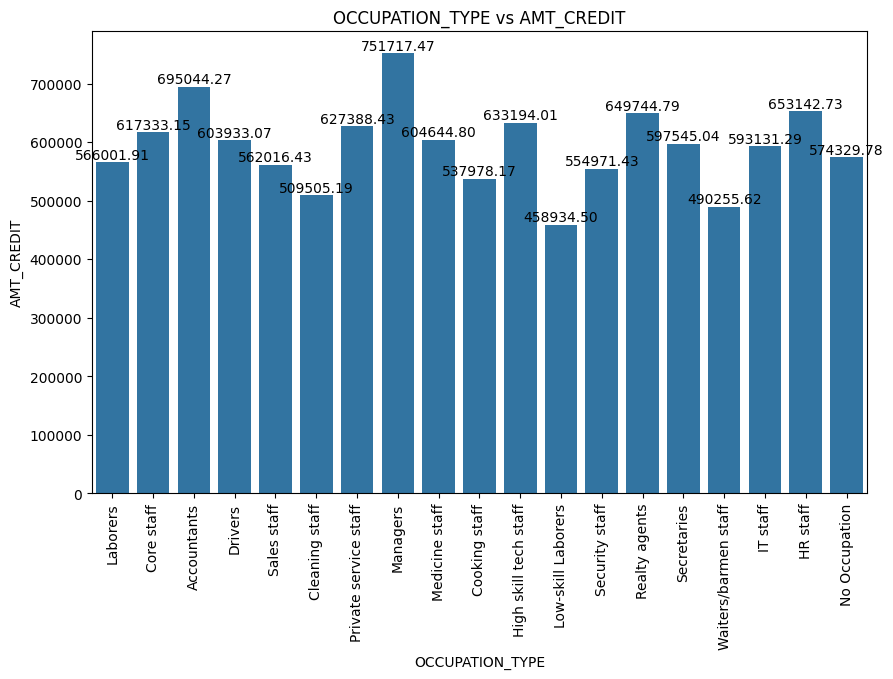

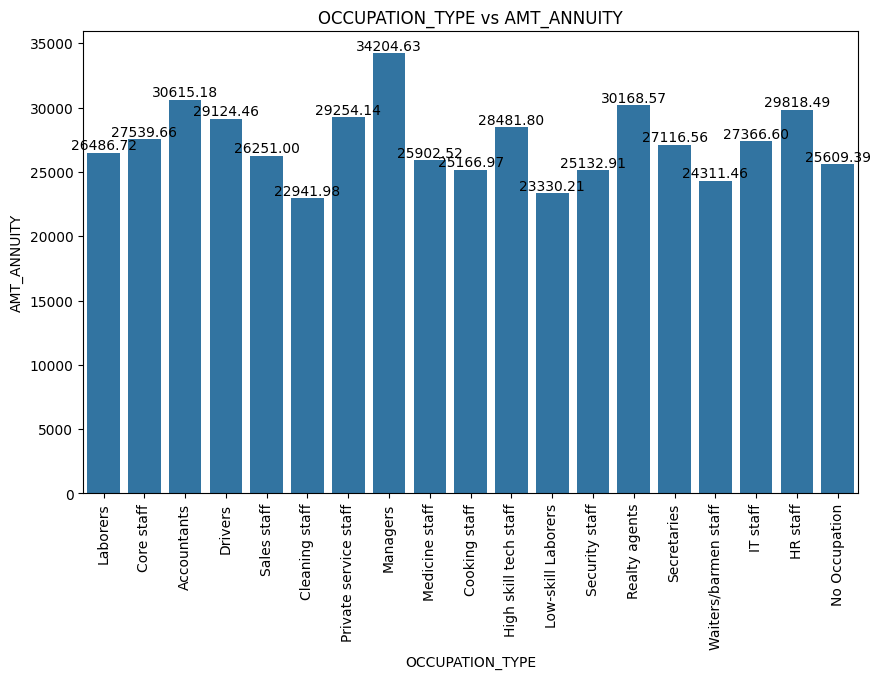

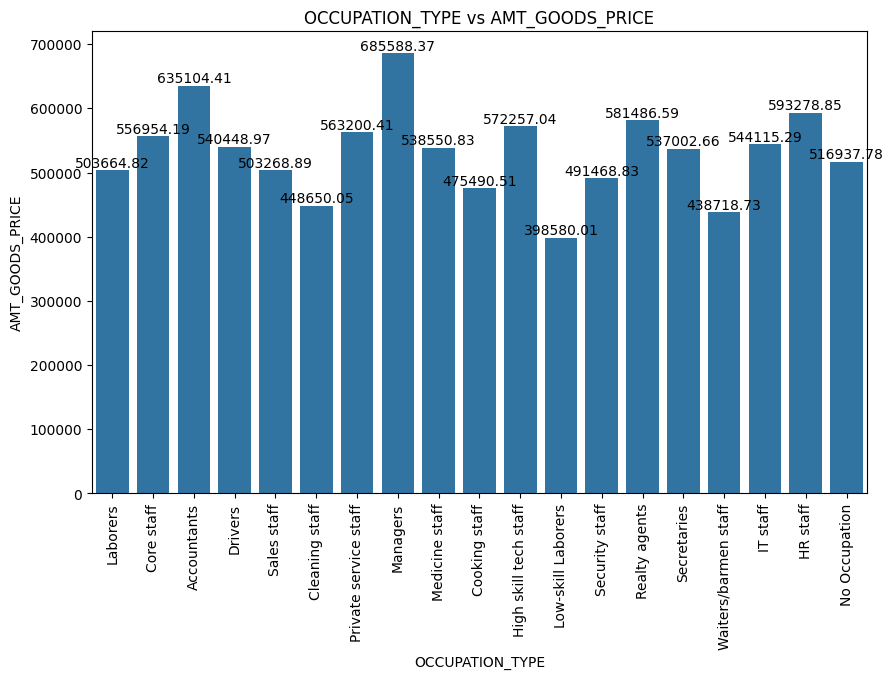

In [ ]:
for cat in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=cat, y=cont, errorbar=None)
        plt.title(f'{cat} vs {cont}')

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

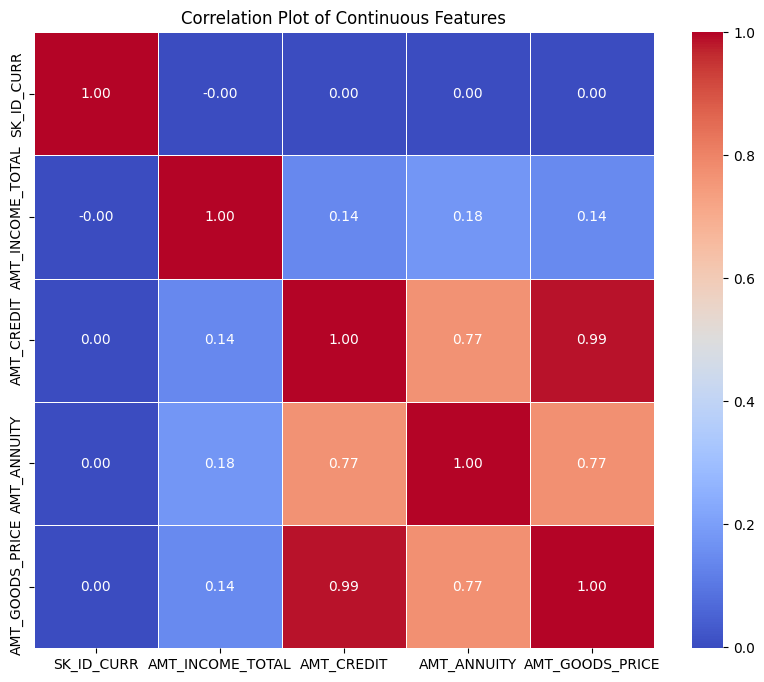

In [ ]:
corr_matrix = df[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

## Highly correlated features
## 1. AMT_CREDIT and AMT_GOODS_PRICE
## 2. AMT_CREDIT and AMT_ANNUITY

In [ ]:
df = df.drop("lokl",axis = 1)

In [ ]:
# Identify continuous (numerical) columns, excluding the target column
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop('TARGET')

# Calculate the correlation of the target variable with these continuous features
correlation_with_target = df[continuous_columns].corrwith(df['TARGET'])

# Display the result
correlation_with_target


SK_ID_CURR         -0.001278
AMT_INCOME_TOTAL   -0.001162
AMT_CREDIT         -0.026628
AMT_ANNUITY        -0.009130
AMT_GOODS_PRICE    -0.035960
dtype: float64

<ipython-input-31-ae4862e40a0b>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




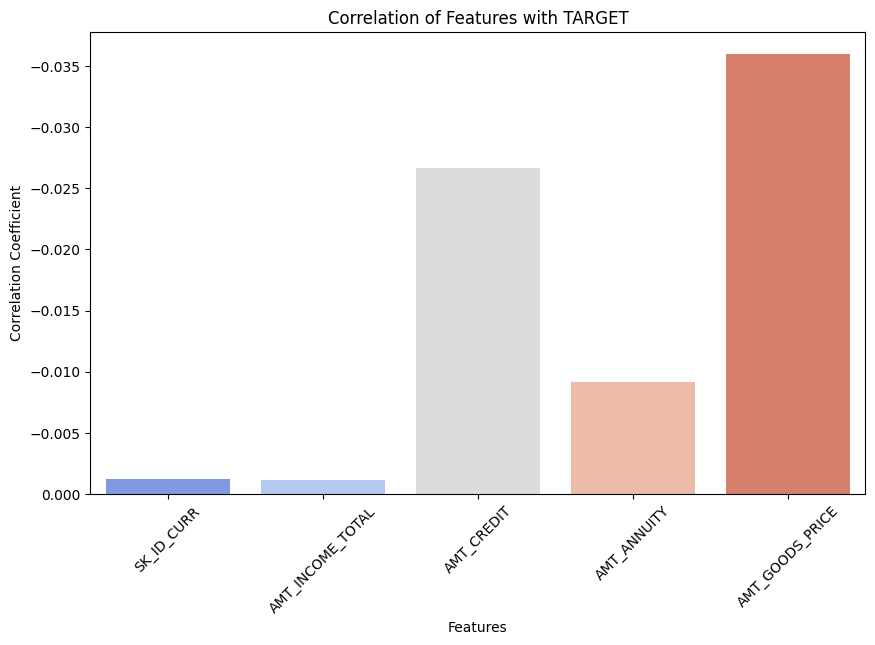

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title('Correlation of Features with TARGET')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Invert the y-axis to flip the plot
plt.show()


Interpreting the Results:

    p-value < 0.05: There is a significant association between the feature and the TARGET. The categorical feature likely impacts the target variable.
    p-value >= 0.05: There is no significant association between the feature and the TARGET.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical features
categorical_features = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'
]

# Dictionary to store p-values
p_values = {}

# Perform Chi-Square test for each feature
for feature in categorical_features:
    # Create contingency table
    contingency_table = pd.crosstab(df[feature], df['TARGET'])

    # Perform Chi-Square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Store p-value
    p_values[feature] = p_value

# Display p-values
p_values


{'NAME_CONTRACT_TYPE': 5.427642974273229e-62,
 'CODE_GENDER': 9.11922997240287e-198,
 'NAME_INCOME_TYPE': 2.576568166290581e-251,
 'NAME_EDUCATION_TYPE': 8.348517558544195e-176,
 'NAME_FAMILY_STATUS': 7.861340300805884e-98,
 'NAME_HOUSING_TYPE': 7.045511394501524e-84,
 'OCCUPATION_TYPE': 0.0}

# so from above p_values we can interpret that there is no correlation with respect to target except "OCCUPATION_TYPE" which is highly correlated with respect to TARGET.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Define target and features
X = df.drop(columns=['TARGET', 'SK_ID_CURR'])  # Drop irrelevant or ID columns
y = df['TARGET']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify continuous and categorical columns
continuous_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline: scale continuous features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),         # Standard scale continuous features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical features
    ])

# 1. Random Forest Model Pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest classifier
])

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# 2. XGBoost Model Pipeline
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))  # XGBoost classifier
])

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("\nXGBoost Model Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))




Random Forest Model Accuracy: 0.9118019386574074
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     50837
           1       0.14      0.02      0.03      4459

    accuracy                           0.91     55296
   macro avg       0.53      0.50      0.49     55296
weighted avg       0.86      0.91      0.88     55296



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[13:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





XGBoost Model Accuracy: 0.9192527488425926
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     50837
           1       0.00      0.00      0.00      4459

    accuracy                           0.92     55296
   macro avg       0.46      0.50      0.48     55296
weighted avg       0.85      0.92      0.88     55296



In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/previous_application_new.csv')
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans         1730            17145   
1     2802425      108129         Cash loans        25189           607500   
2     2523466      122040         Cash loans        15061           112500   
3     2819243      176158         Cash loans        47041           450000   
4     1784265      202054         Cash loans        31924           337500   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS  
0       17145                 0            17145             Approved  
1      679671                 0           607500             Approved  
2      136445                 0           112500             Approved  
3      470790                 0           450000             Approved  
4      404055                 0           337500              Refused

In [ ]:
df1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'NAME_CONTRACT_STATUS'],
      dtype='object')

In [ ]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'],
      dtype='object')

In [ ]:
df1.isnull().sum()

SK_ID_PREV              0
SK_ID_CURR              0
NAME_CONTRACT_TYPE      0
AMT_ANNUITY             0
AMT_APPLICATION         0
AMT_CREDIT              0
AMT_DOWN_PAYMENT        0
AMT_GOODS_PRICE         0
NAME_CONTRACT_STATUS    0
dtype: int64

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  AMT_INCOME_TOTAL  \
0      100002       1         Cash loans           M            202500   
1      100003       0         Cash loans           F            270000   
2      100004       0    Revolving loans           M             67500   
3      100006       0         Cash loans           F            135000   
4      100007       0         Cash loans           M            121500   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_INCOME_TYPE  \
0      406598      24701.0         351000.0          Working   
1     1293503      35699.0        1129500.0    State servant   
2      135000       6750.0         135000.0          Working   
3      312683      29687.0         297000.0          Working   
4      513000      21866.0         513000.0          Working   

              NAME_EDUCATION_TYPE NAME_FAMILY_STATUS   NAME_HOUSING_TYPE  \
0  Secondary or secondary special             Single  House or apartment   
1                Higher education            Married  House or apartment   
2  Secondary or secondary special             Single  House or apartment   
3  Secondary or secondary special     Civil marriage  House or apartment   
4  Secondary or secondary special             Single  House or apartment   

  OCCUPATION_TYPE  
0        Laborers  
1      Core staff  
2        Laborers  
3        Laborers  
4      Core staff

In [ ]:
# Merge datasets to include new features
merged_data = pd.merge(df, df1[['SK_ID_CURR', 'AMT_DOWN_PAYMENT', 'AMT_APPLICATION','NAME_CONTRACT_STATUS']], on='SK_ID_CURR', how='left')

In [ ]:
merged_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  AMT_INCOME_TOTAL  \
0      100002       1         Cash loans           M            202500   
1      100003       0         Cash loans           F            270000   
2      100003       0         Cash loans           F            270000   
3      100004       0    Revolving loans           M             67500   
4      100006       0         Cash loans           F            135000   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_INCOME_TYPE  \
0      406598      24701.0         351000.0          Working   
1     1293503      35699.0        1129500.0    State servant   
2     1293503      35699.0        1129500.0    State servant   
3      135000       6750.0         135000.0          Working   
4      312683      29687.0         297000.0          Working   

              NAME_EDUCATION_TYPE NAME_FAMILY_STATUS   NAME_HOUSING_TYPE  \
0  Secondary or secondary special             Single  House or apartment   
1                Higher education            Married  House or apartment   
2                Higher education            Married  House or apartment   
3  Secondary or secondary special             Single  House or apartment   
4  Secondary or secondary special     Civil marriage  House or apartment   

  OCCUPATION_TYPE  AMT_DOWN_PAYMENT  AMT_APPLICATION NAME_CONTRACT_STATUS  
0        Laborers               0.0         179055.0             Approved  
1      Core staff               0.0         900000.0             Approved  
2      Core staff               0.0         337500.0             Approved  
3        Laborers            4860.0          24282.0             Approved  
4        Laborers               0.0         675000.0             Approved

In [ ]:
merged_data.shape

(687078, 16)

In [ ]:
merged_data.isnull().sum()

SK_ID_CURR                  0
TARGET                      0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 0
AMT_INCOME_TOTAL            0
AMT_CREDIT                  0
AMT_ANNUITY                 0
AMT_GOODS_PRICE             0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
OCCUPATION_TYPE             0
AMT_DOWN_PAYMENT        23012
AMT_APPLICATION         23012
NAME_CONTRACT_STATUS    23012
dtype: int64

In [ ]:
merged_data['AMT_DOWN_PAYMENT'].fillna(merged_data['AMT_DOWN_PAYMENT'].median(), inplace=True)
merged_data['AMT_APPLICATION'].fillna(merged_data['AMT_APPLICATION'].median(), inplace=True)
merged_data['NAME_CONTRACT_STATUS'].fillna(merged_data['NAME_CONTRACT_STATUS'].mode()[0],inplace=True)

In [ ]:
merged_data.isnull().sum()

SK_ID_CURR              0
TARGET                  0
NAME_CONTRACT_TYPE      0
CODE_GENDER             0
AMT_INCOME_TOTAL        0
AMT_CREDIT              0
AMT_ANNUITY             0
AMT_GOODS_PRICE         0
NAME_INCOME_TYPE        0
NAME_EDUCATION_TYPE     0
NAME_FAMILY_STATUS      0
NAME_HOUSING_TYPE       0
OCCUPATION_TYPE         0
AMT_DOWN_PAYMENT        0
AMT_APPLICATION         0
NAME_CONTRACT_STATUS    0
dtype: int64

In [ ]:
# Define target and features
X = merged_data.drop(columns=['TARGET', 'SK_ID_CURR'])  # Drop irrelevant or ID columns
y = merged_data['TARGET']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify continuous and categorical columns
continuous_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline: scale continuous features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),         # Standard scale continuous features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical features
    ])

# 1. Random Forest Model Pipeline
rf  = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest classifier
])

# Train the Random Forest model
rf.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred  = rf.predict(X_test)

# Evaluate the Random Forest model12222222222222
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))


Random Forest Model Accuracy: 0.9403708447342376
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    125992
           1       0.94      0.30      0.46     11424

    accuracy                           0.94    137416
   macro avg       0.94      0.65      0.71    137416
weighted avg       0.94      0.94      0.93    137416

